# Loading the data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the CSV files into DataFrames
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# Display the first few rows of the DataFrames
print(train_features.head())
print(train_labels.head())

    uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Never   
1      1.v

The dataset consists of two main files that we will be working with:

1. `train_features.csv`: Contains the predictors based on social determinants of health (SDOH) from the Mexican Health and Aging Study (MHAS). This file has 184 columns, including:

- `uid`: Unique identifier for each individual.
- Variables across years 2003 and 2012, with prefixes like age_03, urban_03, edu_gru_03, etc., representing different characteristics (age, urban status, marital status, education level, etc.).
- Several columns appear to contain categorical data encoded with descriptors (e.g., "1. 50–59" for age, "3. Widowed" for marital status).
- Many entries are marked as NaN, suggesting missing data for some individuals and variables.

2. `train_labels.csv`: Contains the target variable for prediction.

- `uid`: Unique identifier matching those in train_features.
- `year`: Year when the cognitive composite score was recorded (either 2016 or 2021).
- `composite_score`: Cognitive composite score, representing the outcome we aim to predict.

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Columns: 184 entries, uid to j11_12
dtypes: float64(140), object(44)
memory usage: 4.6+ MB


`train_features` contains 3276 entries with 184 columns.

- Total Records: 3,276 individuals
- Columns: 184 features, including demographic, health, lifestyle, and socioeconomic attributes.
- Data Types:
    - Object (string): 44 columns, representing categorical data or binned values (e.g., age group, education level).
    - Float64: 140 columns, indicating numerical or binary (0 or 1) data for attributes like health status, activity limitations, or diagnosed conditions.
Key Columns:
The dataset includes information collected in 2003 and 2012, with columns labeled accordingly (e.g., age_03 for 2003 and age_12 for 2012).

In [ ]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   uid              4343 non-null   object
 1   year             4343 non-null   int64 
 2   composite_score  4343 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 101.9+ KB


`train_labels` contains 4334 entries with 3 columns.
- Total Records: 4,343 entries, where each entry represents an individual’s cognitive score in either 2016 or 2021 (or both for some individuals).
- Columns:
    - uid (str): Unique identifier for each individual.
    - year (int): The year (2016 or 2021) in which the cognitive score was assessed.
    - composite_score (int): Cognitive function score across seven domains (e.g., memory, language).


Now that we have more entries in our labels dataset, let's check whether all unique user ids (uid) present in the train_labels dataset are present in the train_features dataset.

We can also check whether we have duplicate uid-year pairs in the train_labels dataset, which should be unique.

In [ ]:
# Checking if all uids in train_labels are present in train_features
missing_uids_in_features = set(train_labels['uid']) - set(train_features['uid'])

# Checking if there are duplicate uid-year pairs in train_labels which should be unique
duplicate_uid_year_pairs = train_labels.duplicated(subset=['uid', 'year']).sum()

# Results summary
missing_uids_in_features, duplicate_uid_year_pairs


(set(), 0)

Data Integrity Check Results
1. UID Consistency:

    -All uid values in train_labels are present in train_features, confirming there are no missing individuals between the two datasets.
2. Unique UID-Year Pairs:

    - No duplicate uid-year pairs in train_labels, ensuring that each UID-year combination corresponds to a unique cognitive score.

In [ ]:
# Display column names in train_features to check for consistency in naming conventions
train_features.columns.tolist()


['uid',
 'age_03',
 'urban_03',
 'married_03',
 'n_mar_03',
 'edu_gru_03',
 'n_living_child_03',
 'migration_03',
 'glob_hlth_03',
 'adl_dress_03',
 'adl_walk_03',
 'adl_bath_03',
 'adl_eat_03',
 'adl_bed_03',
 'adl_toilet_03',
 'n_adl_03',
 'iadl_money_03',
 'iadl_meds_03',
 'iadl_shop_03',
 'iadl_meals_03',
 'n_iadl_03',
 'depressed_03',
 'hard_03',
 'restless_03',
 'happy_03',
 'lonely_03',
 'enjoy_03',
 'sad_03',
 'tired_03',
 'energetic_03',
 'n_depr_03',
 'cesd_depressed_03',
 'hypertension_03',
 'diabetes_03',
 'resp_ill_03',
 'arthritis_03',
 'hrt_attack_03',
 'stroke_03',
 'cancer_03',
 'n_illnesses_03',
 'bmi_03',
 'exer_3xwk_03',
 'alcohol_03',
 'tobacco_03',
 'test_chol_03',
 'test_tuber_03',
 'test_diab_03',
 'test_pres_03',
 'hosp_03',
 'visit_med_03',
 'out_proc_03',
 'visit_dental_03',
 'imss_03',
 'issste_03',
 'pem_def_mar_03',
 'insur_private_03',
 'insur_other_03',
 'insured_03',
 'decis_famil_03',
 'decis_personal_03',
 'employment_03',
 'age_12',
 'urban_12',
 'ma

Column Naming Convention Observations
1. Year-Specific Suffixes:

    - Most columns follow a convention where suffixes _03 and _12 indicate data collected in 2003 and 2012, respectively.
    - Exceptions are columns like ragender, rameduc_m, and rafeduc_m (gender and parental education), which do not have year-specific suffixes, likely indicating they are static variables.
2. Underscore Separations:

    - Column names generally use underscores (_) for separating words, making them consistent and readable. However, some columns use combined letters without separation (e.g., iadl_money_03 and adl_dress_03), which is still consistent across similar variables.
3. Mixed Naming for Health and Social Determinants:

    - Variables related to health coverage (e.g., imss_03, issste_03) and household income sources (e.g., hincome_03, hinc_business_03) are consistently named with abbreviations followed by underscores and year suffixes.
    - Social activities and lifestyle variables, such as vax_flu_12, attends_club_12, and rrfcntx_m_12, follow similar conventions, maintaining readability and consistency.

## Merging the DataFrames
Since train_labels contains multiple entries per uid for different years (2016 and/or 2021), while train_features contains one entry per uid, we'll need to merge train_features with train_labels on uid, ensuring that the features are correctly aligned with the target years.

If an individual has scores for both 2016 and 2021, they will appear twice in the dataset—once for each year.

In [ ]:
# Merge train_features with train_labels on 'uid'
data = train_labels.merge(train_features, on='uid', how='left')
data.head()

uid  year  composite_score    age_03     urban_03  married_03  n_mar_03  \
0  aace  2021              175       NaN          NaN         NaN       NaN   
1  aanz  2021              206       NaN          NaN         NaN       NaN   
2  aape  2016              161       NaN          NaN         NaN       NaN   
3  aape  2021              144       NaN          NaN         NaN       NaN   
4  aard  2021              104  1. 50–59  1. 100,000+  3. Widowed       1.0   

     edu_gru_03 n_living_child_03  migration_03  ...           rrelgimp_12  \
0           NaN               NaN           NaN  ...  2.somewhat important   
1           NaN               NaN           NaN  ...      1.very important   
2           NaN               NaN           NaN  ...  2.somewhat important   
3           NaN               NaN           NaN  ...  2.somewhat important   
4  3. 7–9 years         1. 1 or 2           0.0  ...      1.very important   

             rrfcntx_m_12              rsocact_m_12  rrelgwk_12  a16a_12  \
0                 9.Never                   9.Never        0.No      NaN   
1                 9.Never        1.Almost every day        0.No      NaN   
2  6.2 or 3 times a month  2.4 or more times a week        0.No      NaN   
3  6.2 or 3 times a month  2.4 or more times a week        0.No      NaN   
4           4.Once a week                   9.Never       1.Yes      NaN   

   a21_12  a22_12  a33b_12  a34_12                             j11_12  
0     NaN     NaN      NaN     NaN                         Concrete 2  
1     NaN     NaN      NaN     NaN                         Concrete 2  
2     NaN     NaN      NaN     NaN  Wood, mosaic, or other covering 1  
3     NaN     NaN      NaN     NaN  Wood, mosaic, or other covering 1  
4     NaN     NaN      NaN    No 2                         Concrete 2  

[5 rows x 186 columns]

Merging the dataframes creates separate rows for each uid-year pair, with the target composite_score for that year.

## Understanding the target variable

Let's look at the distribution of the target variable.

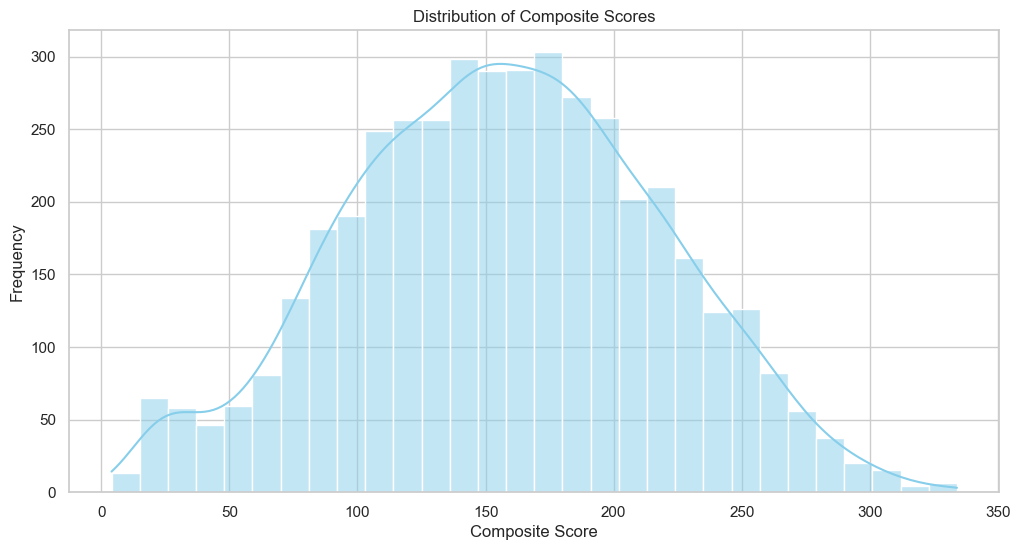

In [ ]:
# Set plot style for better aesthetics
sns.set(style='whitegrid')

# Plot histogram and density plot of composite_score
plt.figure(figsize=(12, 6))
sns.histplot(data['composite_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


Composite score summary statistics:

In [ ]:
# Calculate summary statistics
composite_stats = data['composite_score'].describe()
print("\nSummary Statistics of Composite Score:")
print(composite_stats)



Summary Statistics of Composite Score:
count    4343.000000
mean      157.016809
std        60.909546
min         4.000000
25%       114.000000
50%       157.000000
75%       200.000000
max       334.000000
Name: composite_score, dtype: float64


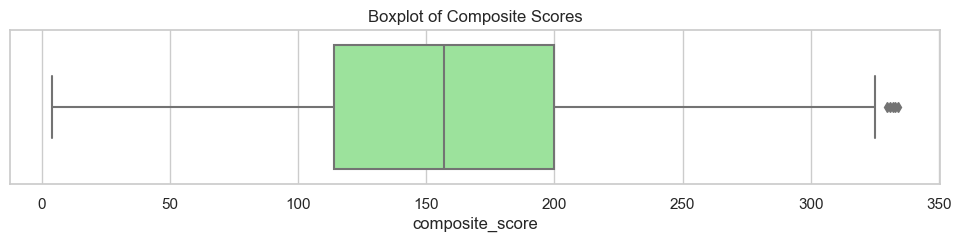

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 2))
sns.boxplot(x='composite_score', data=data, color='lightgreen')
plt.title('Boxplot of Composite Scores')
plt.show()


There are several points outside the whiskers, indicating scores that deviate significantly from the main distribution

In [ ]:
# Calculate skewness and kurtosis
skewness = data['composite_score'].skew()
kurtosis = data['composite_score'].kurtosis()

print(f"\nSkewness of Composite Score: {skewness:.2f}")
print(f"Kurtosis of Composite Score: {kurtosis:.2f}")



Skewness of Composite Score: -0.02
Kurtosis of Composite Score: -0.37


- **Skewness: -0.02**, indicating the distribution is nearly symmetric with a very slight leftward skew.
- **Kurtosis: -0.37**, suggesting a slightly flatter distribution compared to a normal distribution.

These values confirm a fairly normal distribution, which is beneficial for predictive modeling as it reduces the need for complex transformations.

## Univariate analysis of categorical variables

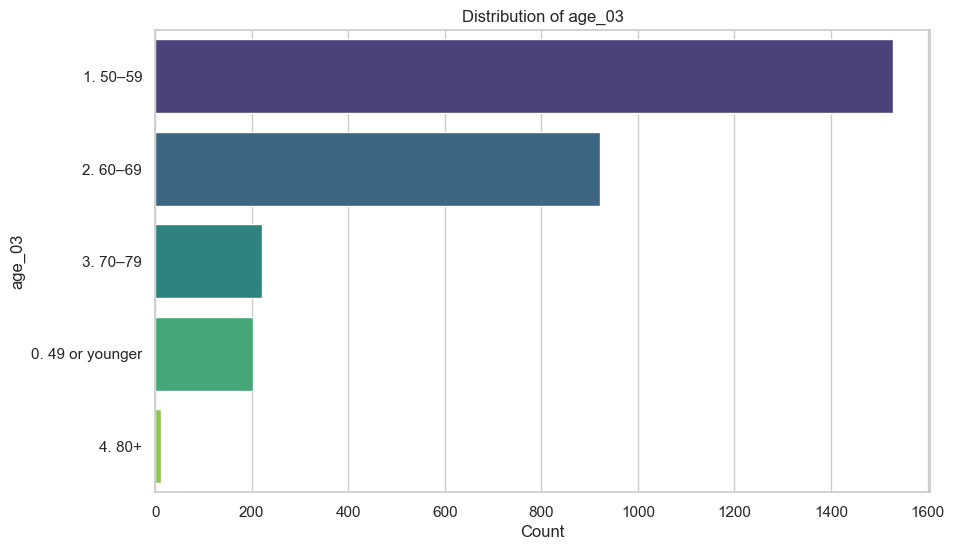


Value Counts for age_03:
age_03
1. 50–59            1529
2. 60–69             922
3. 70–79             221
0. 49 or younger     202
4. 80+                13
Name: count, dtype: int64


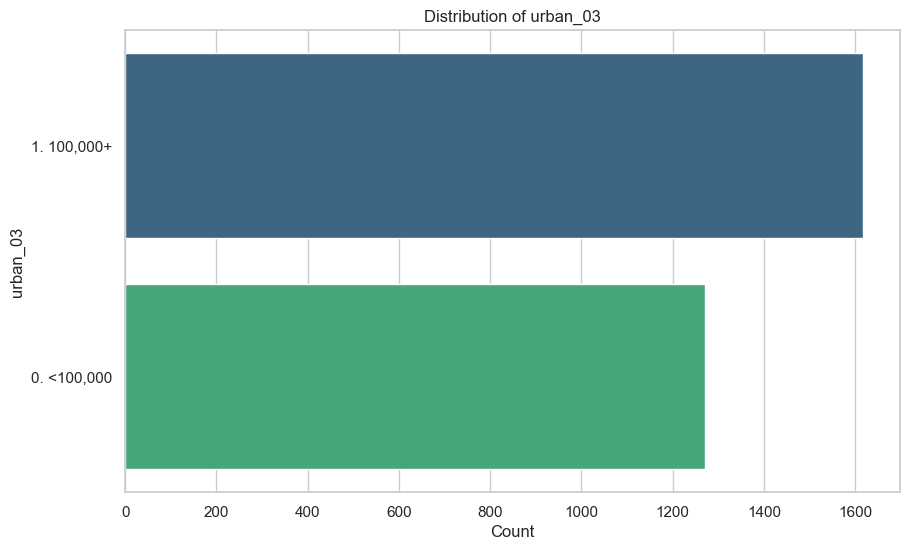


Value Counts for urban_03:
urban_03
1. 100,000+    1618
0. <100,000    1271
Name: count, dtype: int64


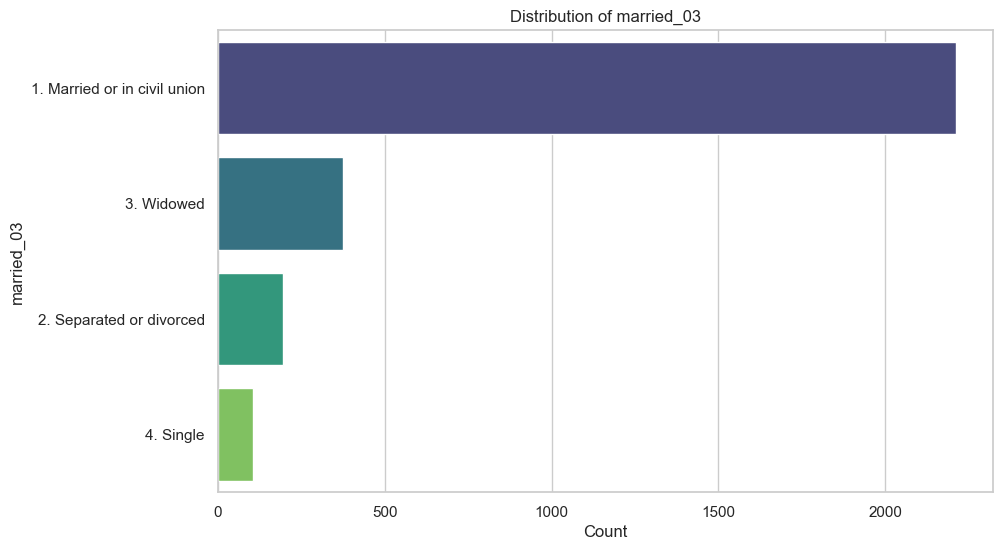


Value Counts for married_03:
married_03
1. Married or in civil union    2213
3. Widowed                       374
2. Separated or divorced         196
4. Single                        106
Name: count, dtype: int64


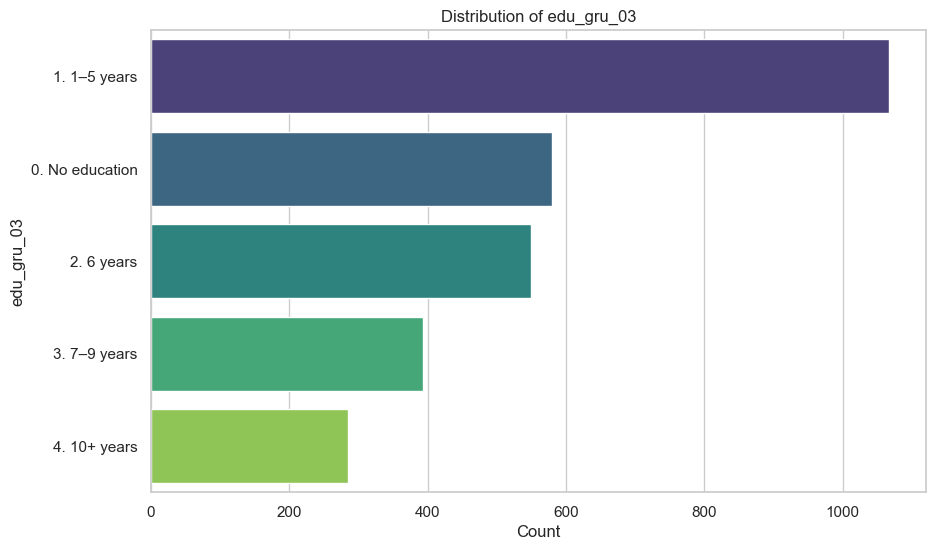


Value Counts for edu_gru_03:
edu_gru_03
1. 1–5 years       1067
0. No education     580
2. 6 years          550
3. 7–9 years        393
4. 10+ years        285
Name: count, dtype: int64


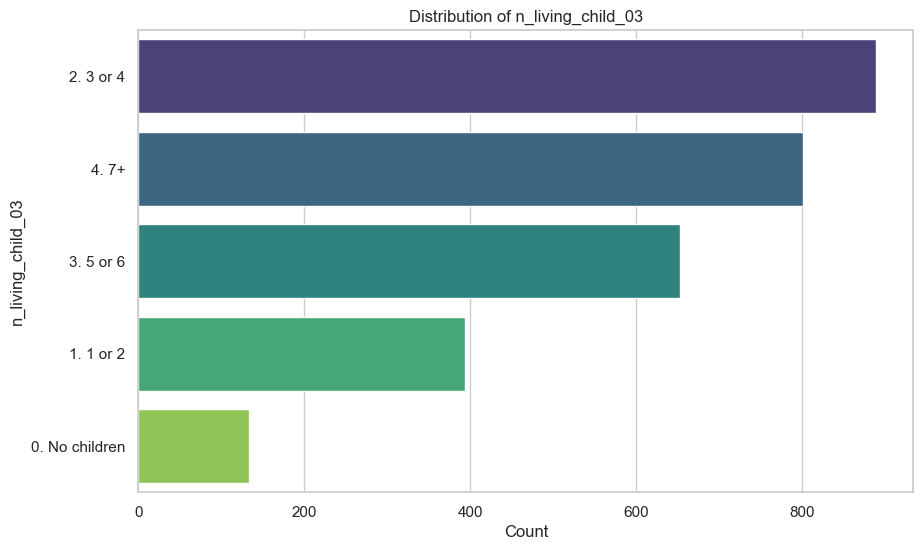


Value Counts for n_living_child_03:
n_living_child_03
2. 3 or 4         890
4. 7+             801
3. 5 or 6         653
1. 1 or 2         394
0. No children    134
Name: count, dtype: int64


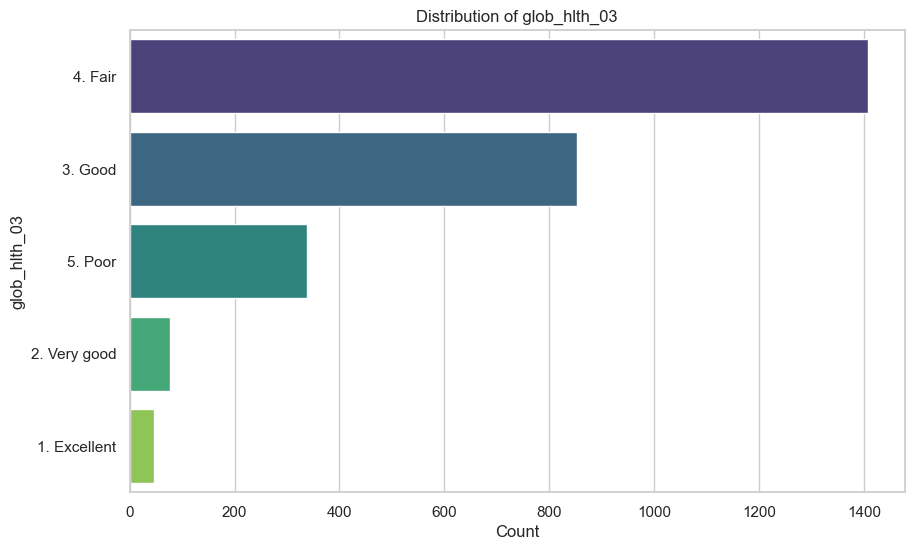


Value Counts for glob_hlth_03:
glob_hlth_03
4. Fair         1407
3. Good          853
5. Poor          338
2. Very good      76
1. Excellent      47
Name: count, dtype: int64


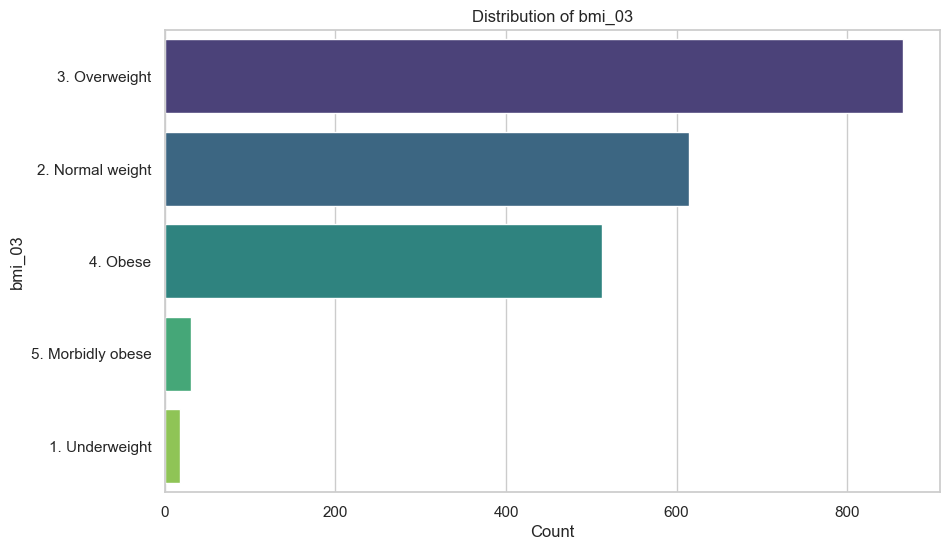


Value Counts for bmi_03:
bmi_03
3. Overweight        865
2. Normal weight     614
4. Obese             513
5. Morbidly obese     31
1. Underweight        18
Name: count, dtype: int64


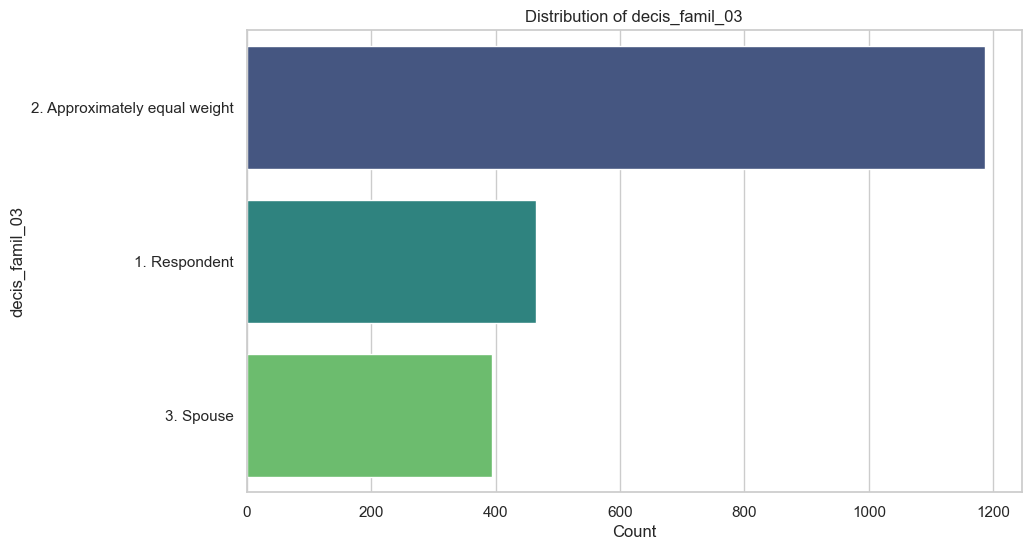


Value Counts for decis_famil_03:
decis_famil_03
2. Approximately equal weight    1186
1. Respondent                     465
3. Spouse                         395
Name: count, dtype: int64


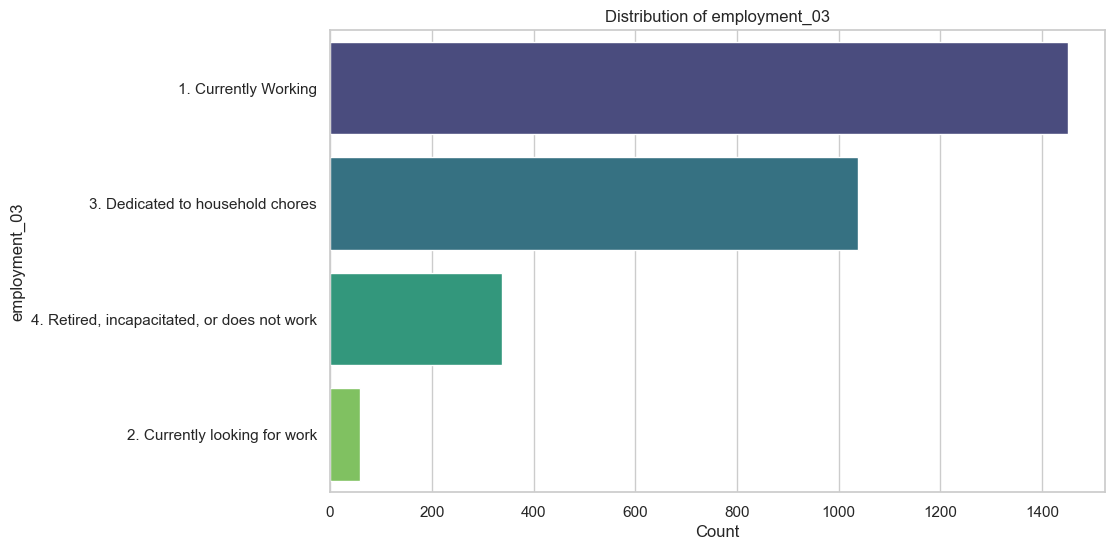


Value Counts for employment_03:
employment_03
1. Currently Working                           1451
3. Dedicated to household chores               1038
4. Retired, incapacitated, or does not work     338
2. Currently looking for work                    59
Name: count, dtype: int64


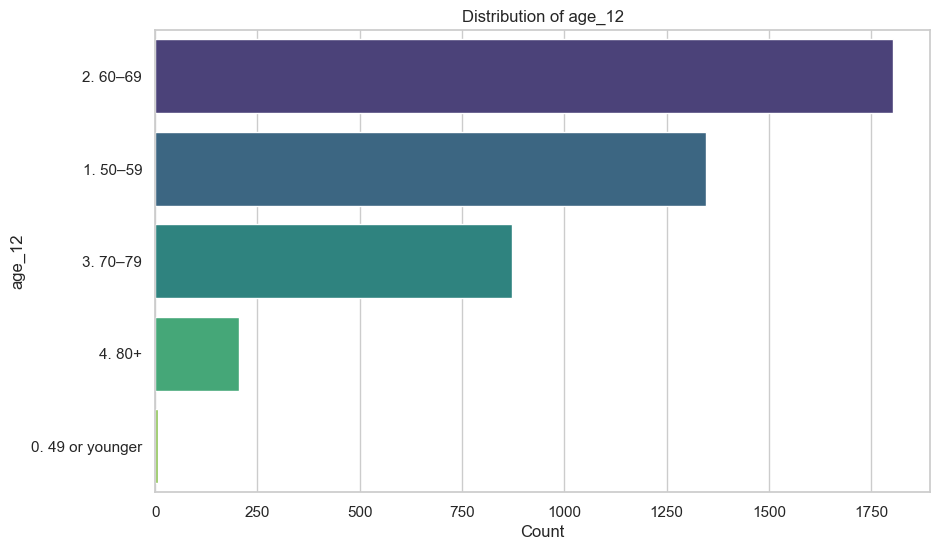


Value Counts for age_12:
age_12
2. 60–69            1804
1. 50–59            1347
3. 70–79             871
4. 80+               204
0. 49 or younger       8
Name: count, dtype: int64


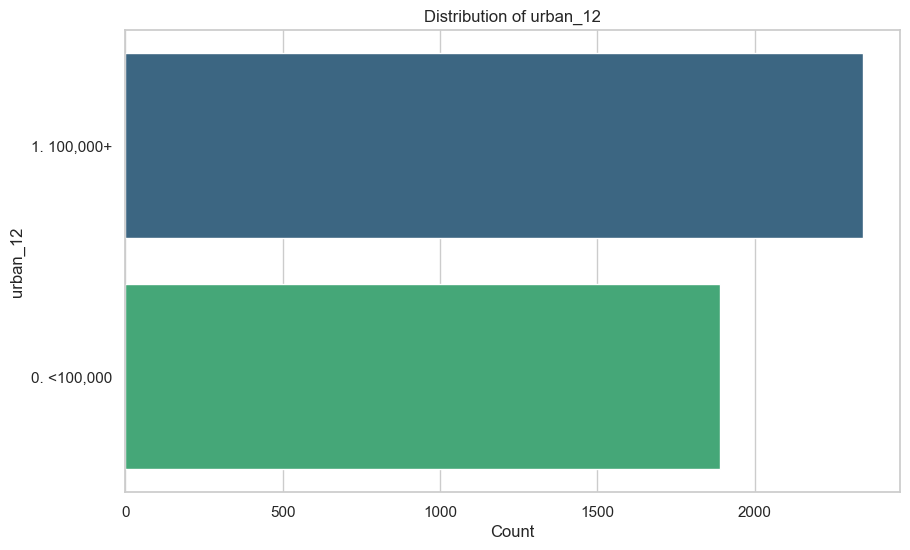


Value Counts for urban_12:
urban_12
1. 100,000+    2345
0. <100,000    1891
Name: count, dtype: int64


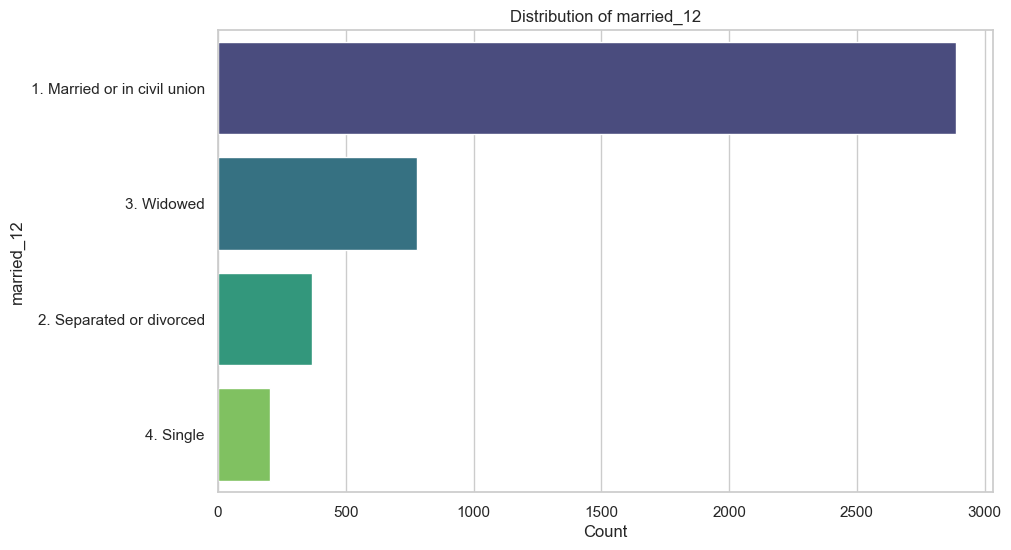


Value Counts for married_12:
married_12
1. Married or in civil union    2889
3. Widowed                       778
2. Separated or divorced         367
4. Single                        202
Name: count, dtype: int64


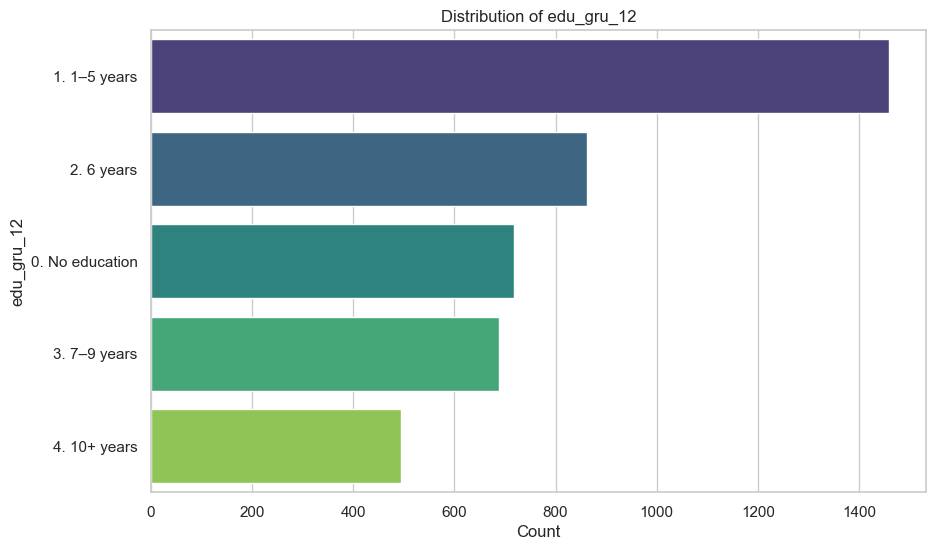


Value Counts for edu_gru_12:
edu_gru_12
1. 1–5 years       1459
2. 6 years          862
0. No education     717
3. 7–9 years        688
4. 10+ years        495
Name: count, dtype: int64


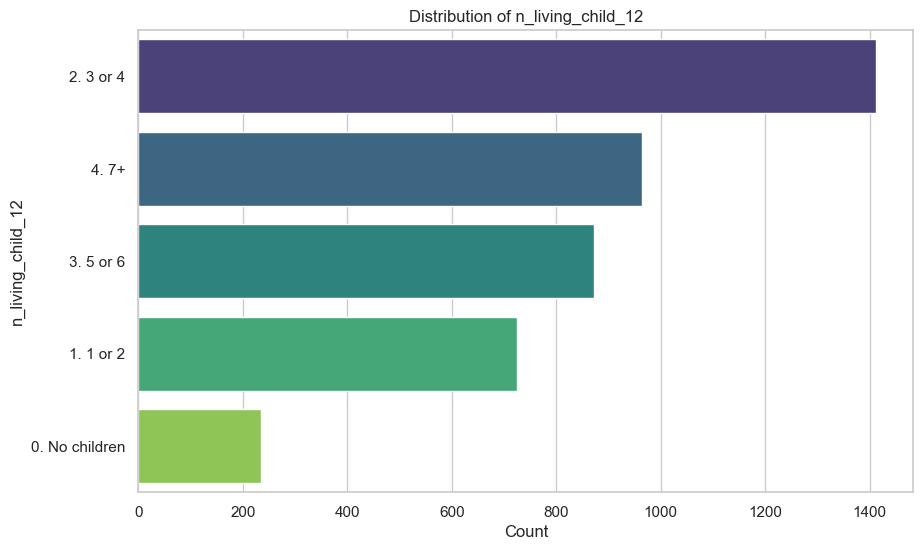


Value Counts for n_living_child_12:
n_living_child_12
2. 3 or 4         1413
4. 7+              964
3. 5 or 6          872
1. 1 or 2          725
0. No children     235
Name: count, dtype: int64


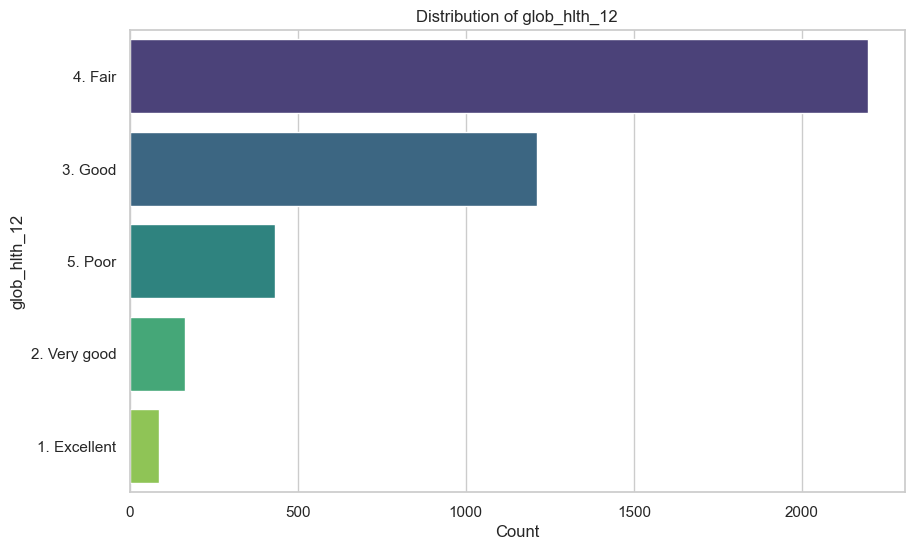


Value Counts for glob_hlth_12:
glob_hlth_12
4. Fair         2196
3. Good         1211
5. Poor          431
2. Very good     164
1. Excellent      86
Name: count, dtype: int64


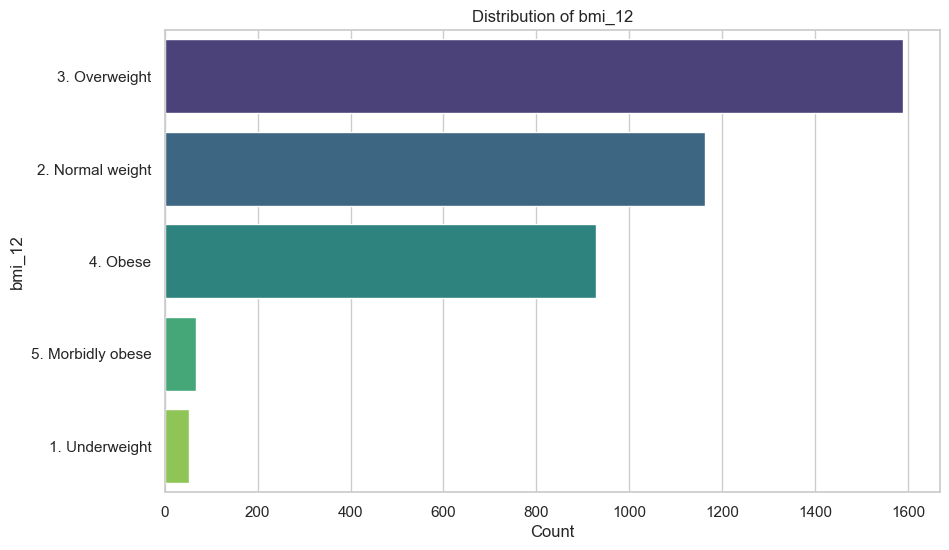


Value Counts for bmi_12:
bmi_12
3. Overweight        1589
2. Normal weight     1163
4. Obese              928
5. Morbidly obese      67
1. Underweight         53
Name: count, dtype: int64


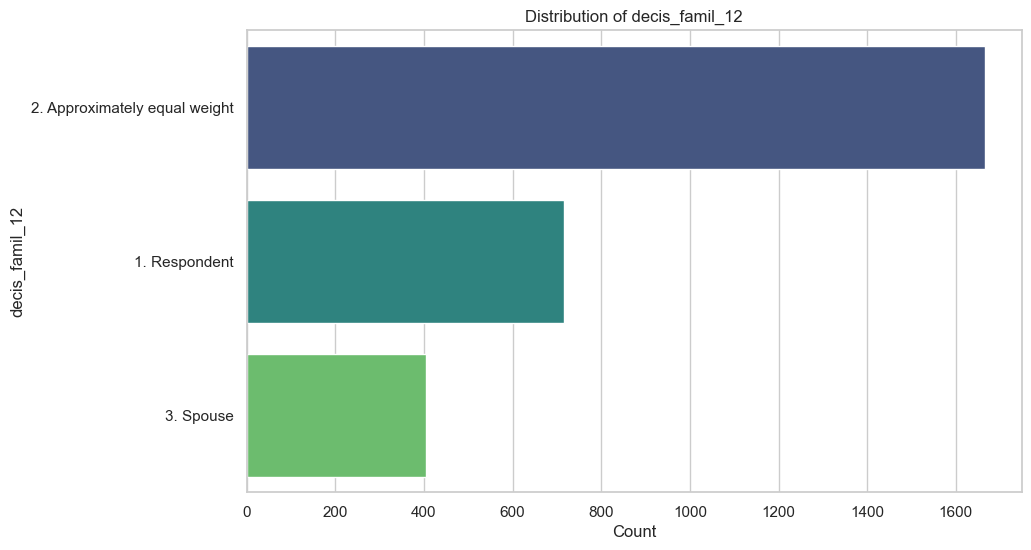


Value Counts for decis_famil_12:
decis_famil_12
2. Approximately equal weight    1665
1. Respondent                     717
3. Spouse                         405
Name: count, dtype: int64


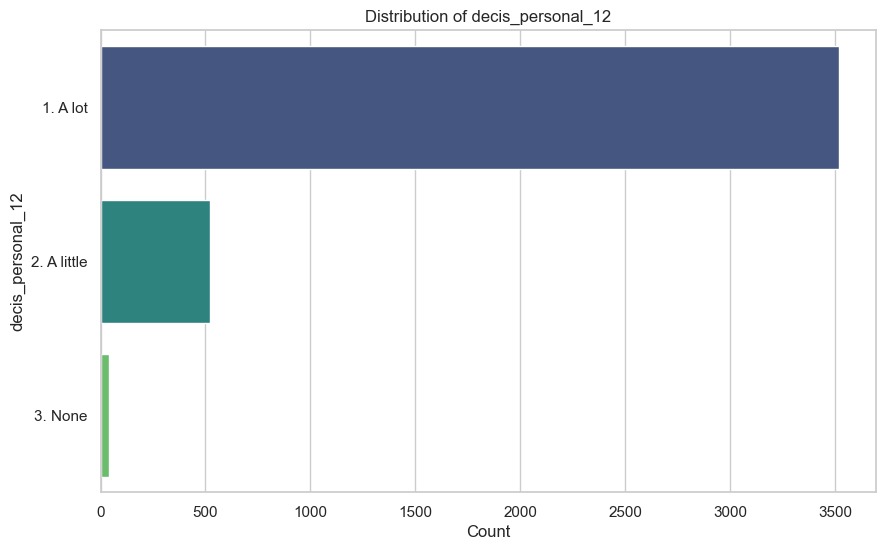


Value Counts for decis_personal_12:
decis_personal_12
1. A lot       3518
2. A little     520
3. None          38
Name: count, dtype: int64


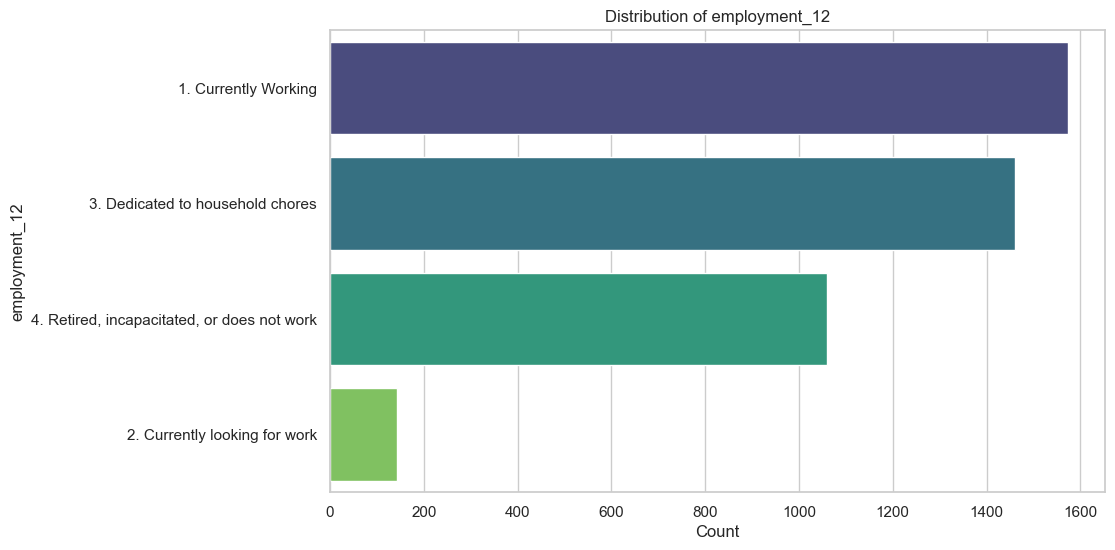


Value Counts for employment_12:
employment_12
1. Currently Working                           1574
3. Dedicated to household chores               1460
4. Retired, incapacitated, or does not work    1059
2. Currently looking for work                   143
Name: count, dtype: int64


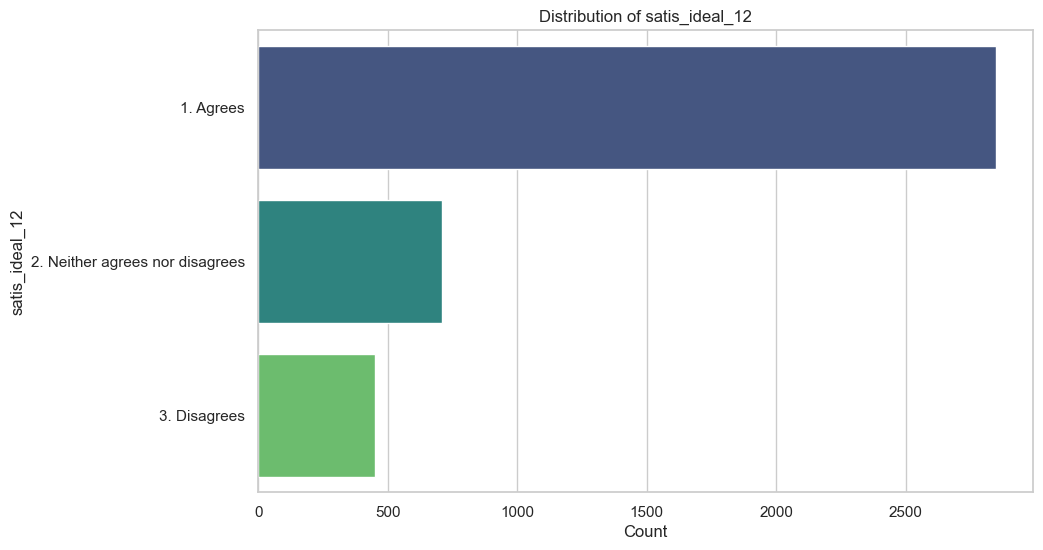


Value Counts for satis_ideal_12:
satis_ideal_12
1. Agrees                          2850
2. Neither agrees nor disagrees     710
3. Disagrees                        452
Name: count, dtype: int64


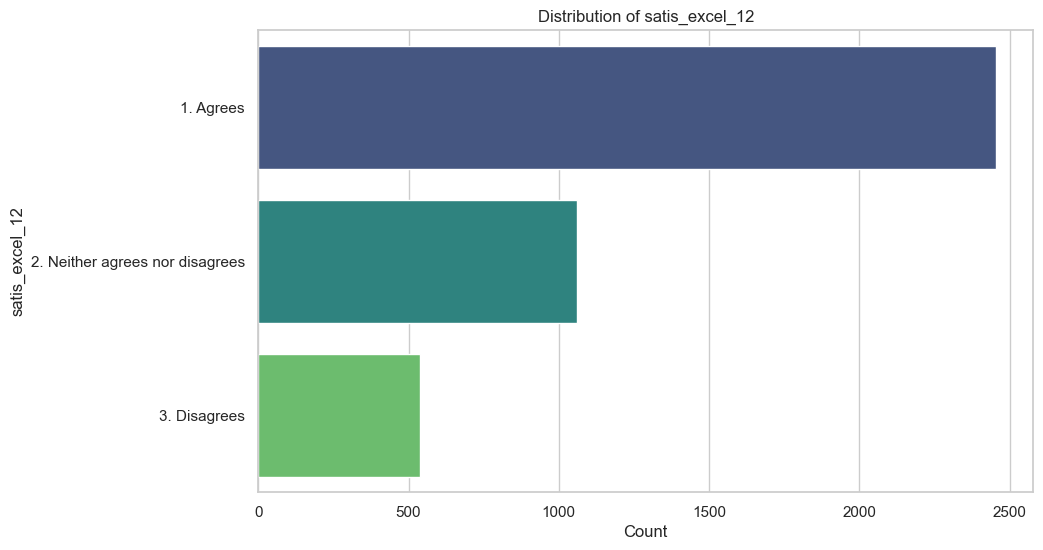


Value Counts for satis_excel_12:
satis_excel_12
1. Agrees                          2456
2. Neither agrees nor disagrees    1059
3. Disagrees                        539
Name: count, dtype: int64


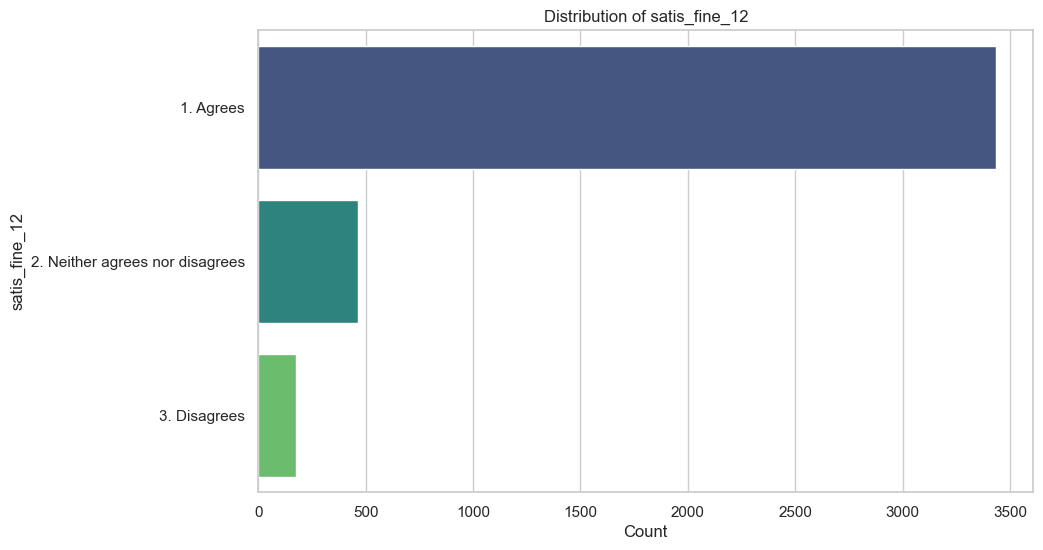


Value Counts for satis_fine_12:
satis_fine_12
1. Agrees                          3437
2. Neither agrees nor disagrees     466
3. Disagrees                        174
Name: count, dtype: int64


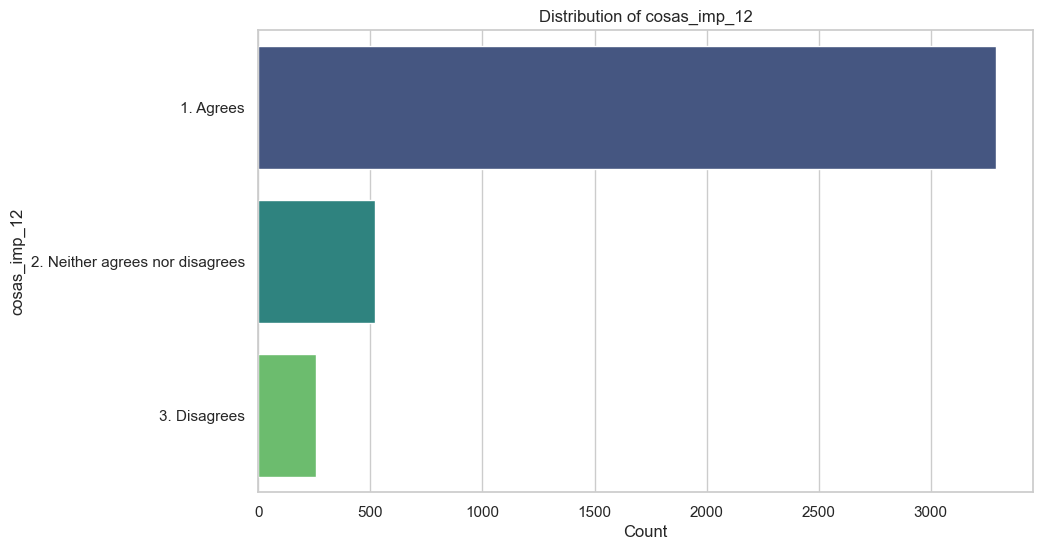


Value Counts for cosas_imp_12:
cosas_imp_12
1. Agrees                          3292
2. Neither agrees nor disagrees     519
3. Disagrees                        260
Name: count, dtype: int64


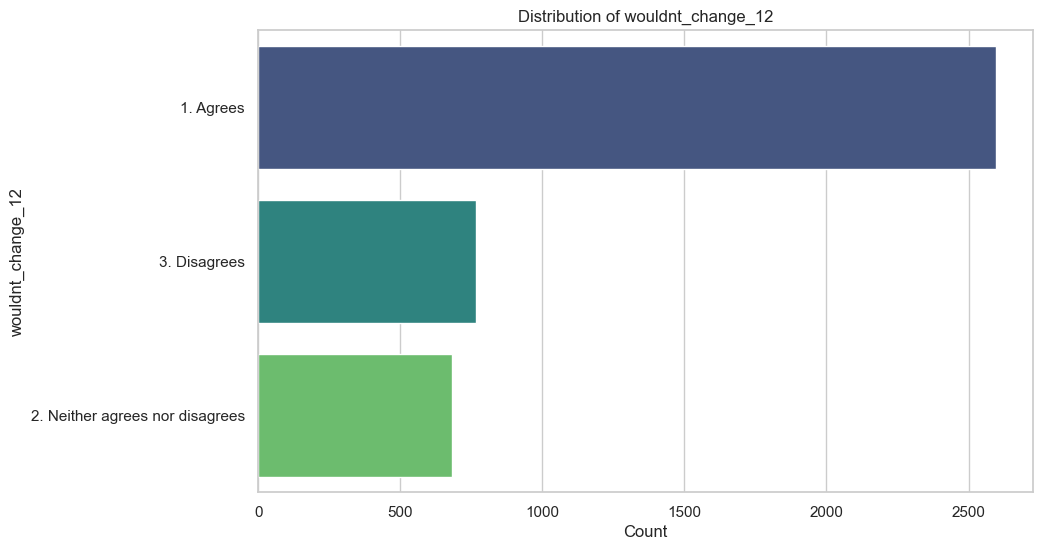


Value Counts for wouldnt_change_12:
wouldnt_change_12
1. Agrees                          2598
3. Disagrees                        767
2. Neither agrees nor disagrees     681
Name: count, dtype: int64


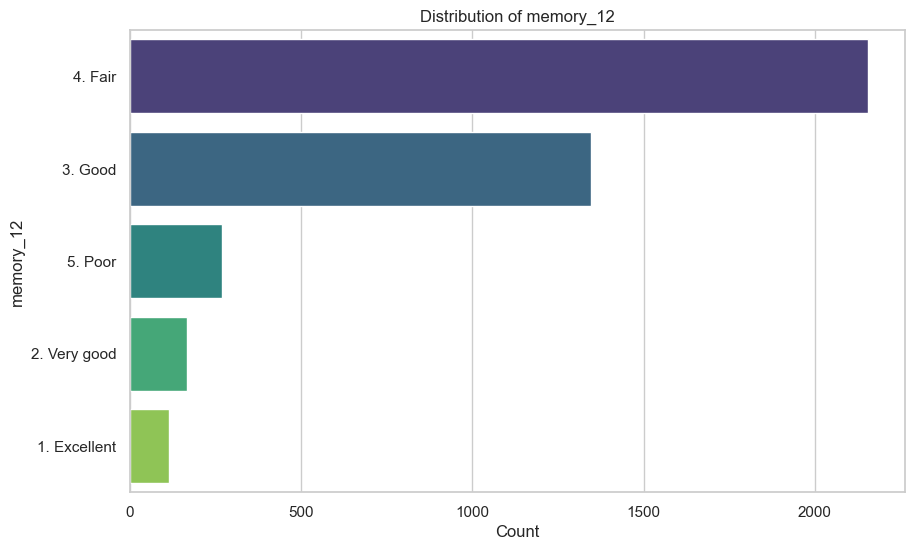


Value Counts for memory_12:
memory_12
4. Fair         2154
3. Good         1346
5. Poor          270
2. Very good     168
1. Excellent     114
Name: count, dtype: int64


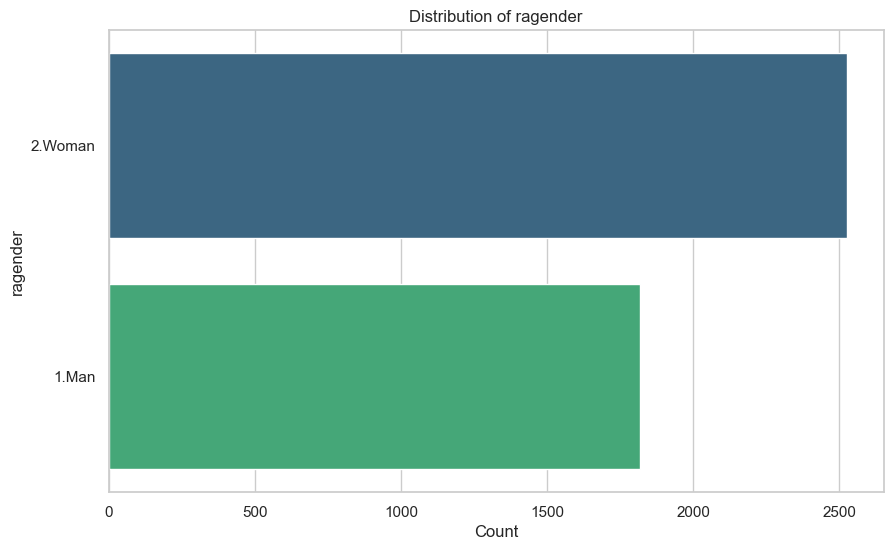


Value Counts for ragender:
ragender
2.Woman    2525
1.Man      1818
Name: count, dtype: int64


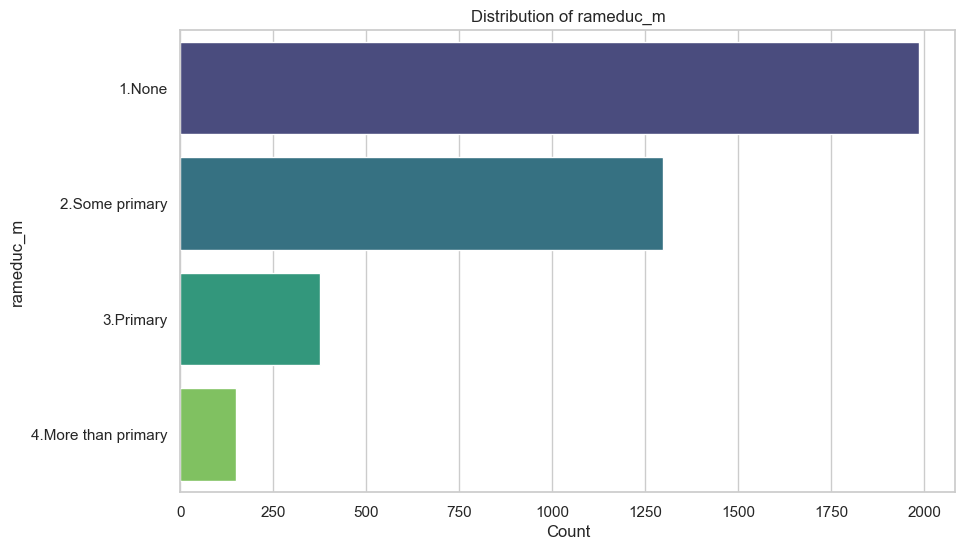


Value Counts for rameduc_m:
rameduc_m
1.None                 1985
2.Some primary         1299
3.Primary               375
4.More than primary     149
Name: count, dtype: int64


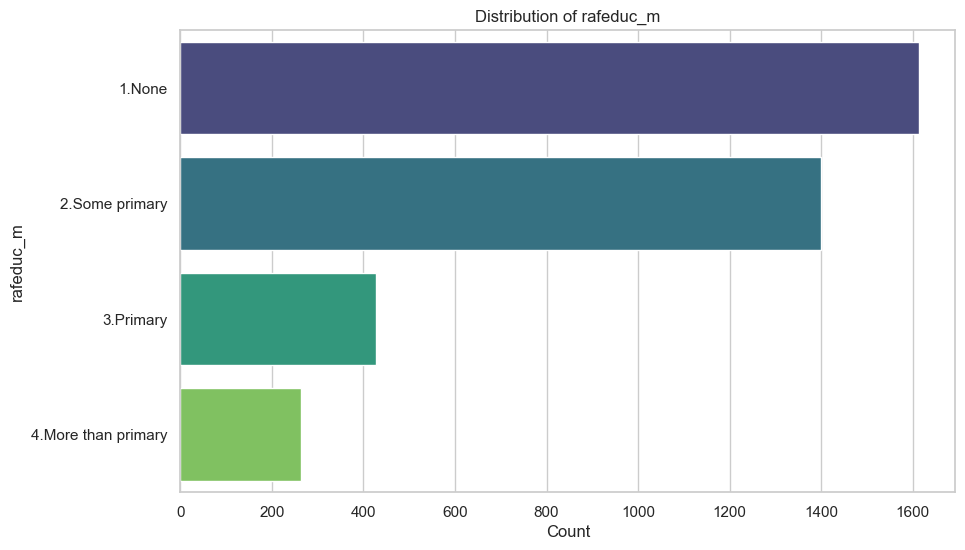


Value Counts for rafeduc_m:
rafeduc_m
1.None                 1613
2.Some primary         1399
3.Primary               428
4.More than primary     263
Name: count, dtype: int64


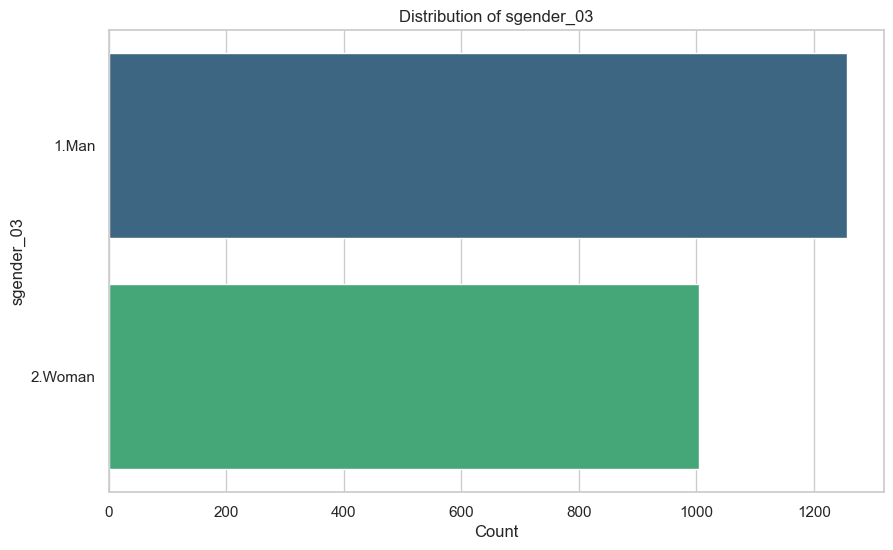


Value Counts for sgender_03:
sgender_03
1.Man      1256
2.Woman    1004
Name: count, dtype: int64


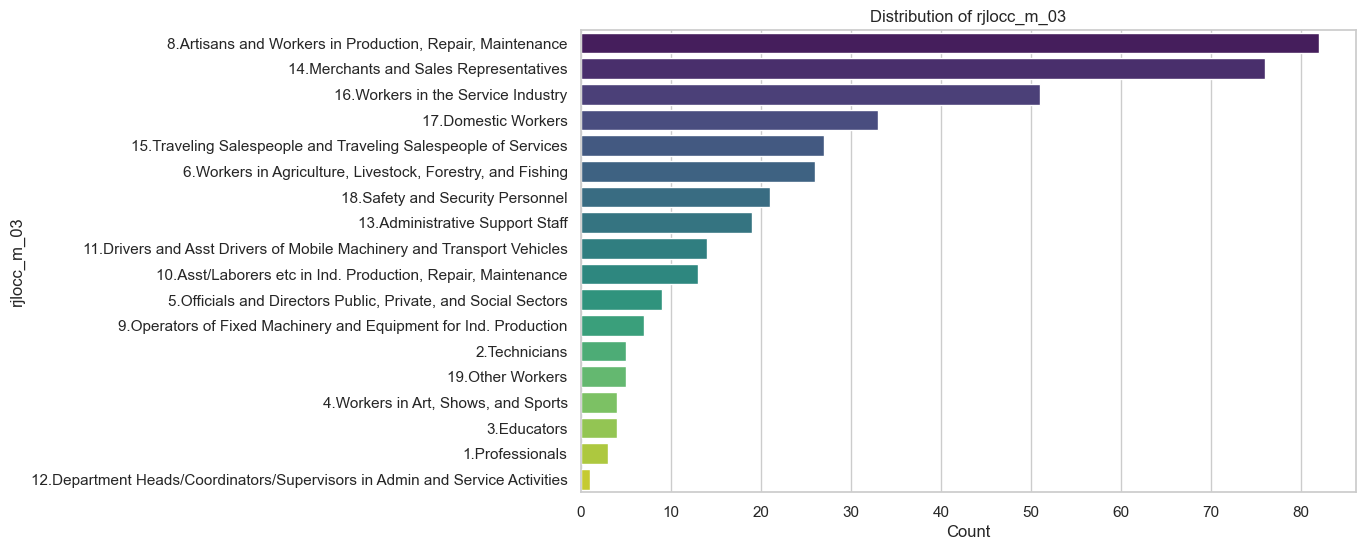


Value Counts for rjlocc_m_03:
rjlocc_m_03
8.Artisans and Workers in Production, Repair, Maintenance                       82
14.Merchants and Sales Representatives                                          76
16.Workers in the Service Industry                                              51
17.Domestic Workers                                                             33
15.Traveling Salespeople and Traveling Salespeople of Services                  27
6.Workers in Agriculture, Livestock, Forestry, and Fishing                      26
18.Safety and Security Personnel                                                21
13.Administrative Support Staff                                                 19
11.Drivers and Asst Drivers of Mobile Machinery and Transport Vehicles          14
10.Asst/Laborers etc in Ind. Production, Repair, Maintenance                    13
5.Officials and Directors Public, Private, and Social Sectors                    9
9.Operators of Fixed Machinery and Equipment

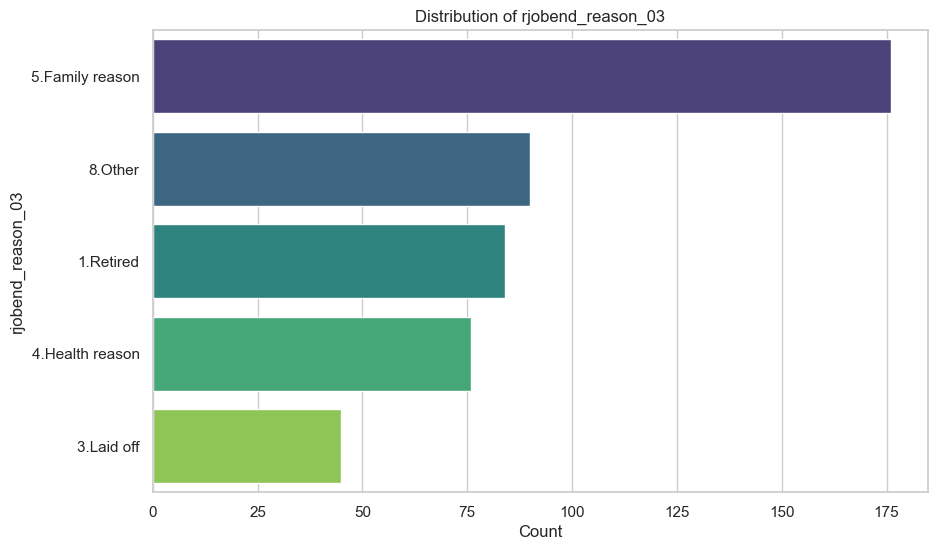


Value Counts for rjobend_reason_03:
rjobend_reason_03
5.Family reason    176
8.Other             90
1.Retired           84
4.Health reason     76
3.Laid off          45
Name: count, dtype: int64


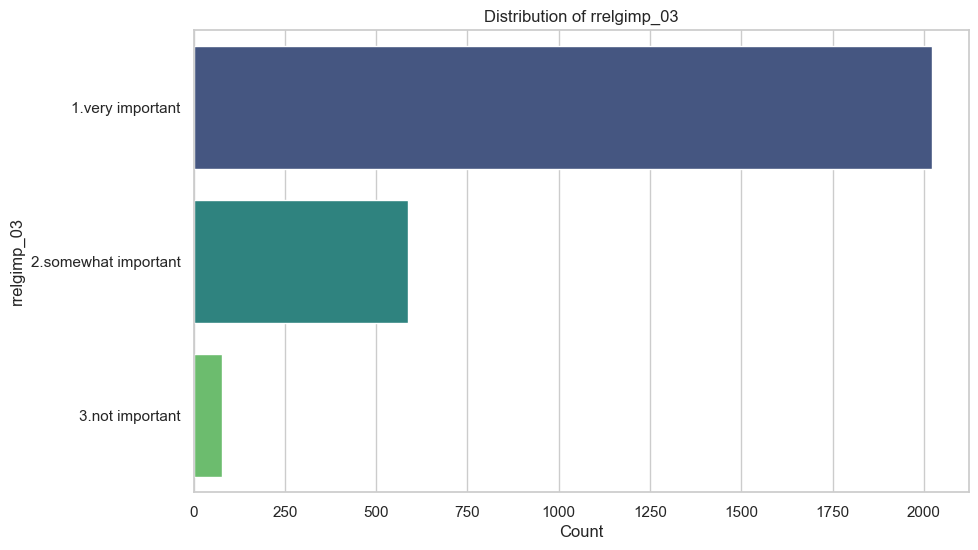


Value Counts for rrelgimp_03:
rrelgimp_03
1.very important        2022
2.somewhat important     588
3.not important           77
Name: count, dtype: int64


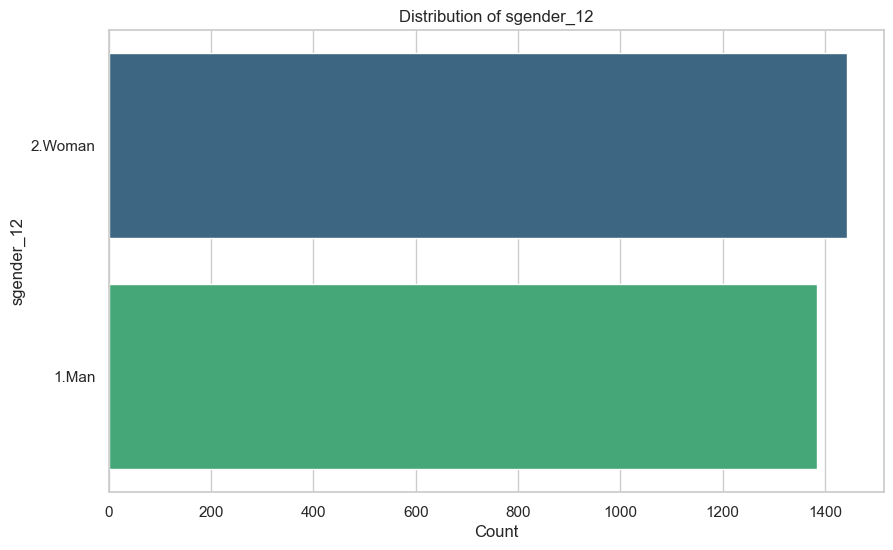


Value Counts for sgender_12:
sgender_12
2.Woman    1443
1.Man      1385
Name: count, dtype: int64


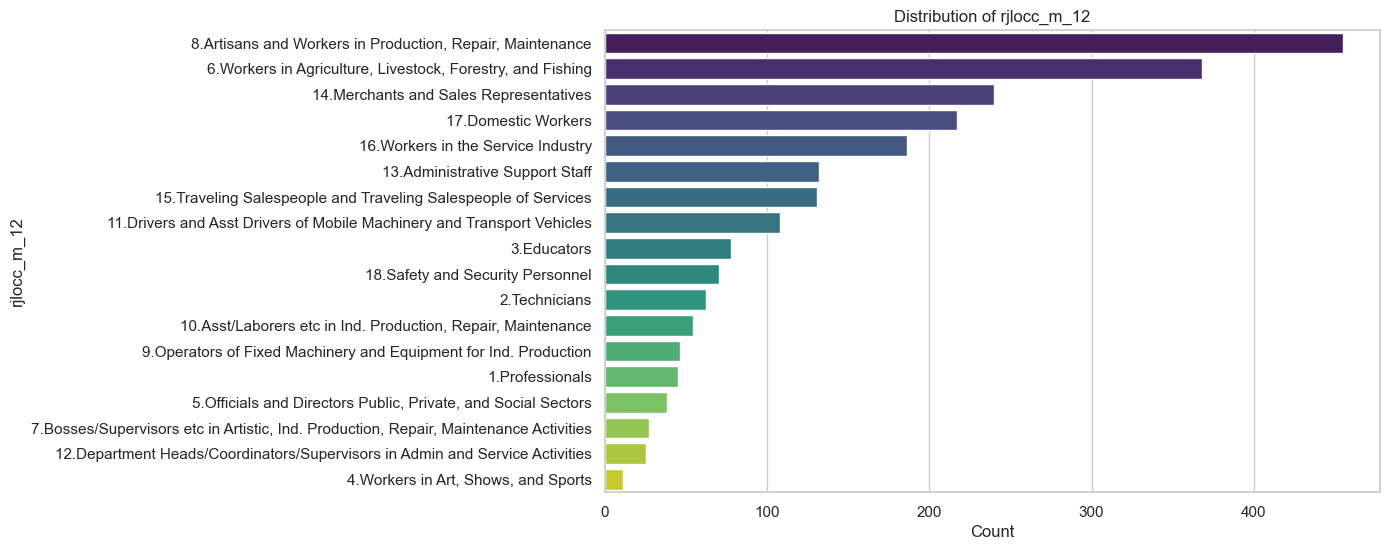


Value Counts for rjlocc_m_12:
rjlocc_m_12
8.Artisans and Workers in Production, Repair, Maintenance                                455
6.Workers in Agriculture, Livestock, Forestry, and Fishing                               368
14.Merchants and Sales Representatives                                                   240
17.Domestic Workers                                                                      217
16.Workers in the Service Industry                                                       186
13.Administrative Support Staff                                                          132
15.Traveling Salespeople and Traveling Salespeople of Services                           131
11.Drivers and Asst Drivers of Mobile Machinery and Transport Vehicles                   108
3.Educators                                                                               78
18.Safety and Security Personnel                                                          70
2.Technicians              

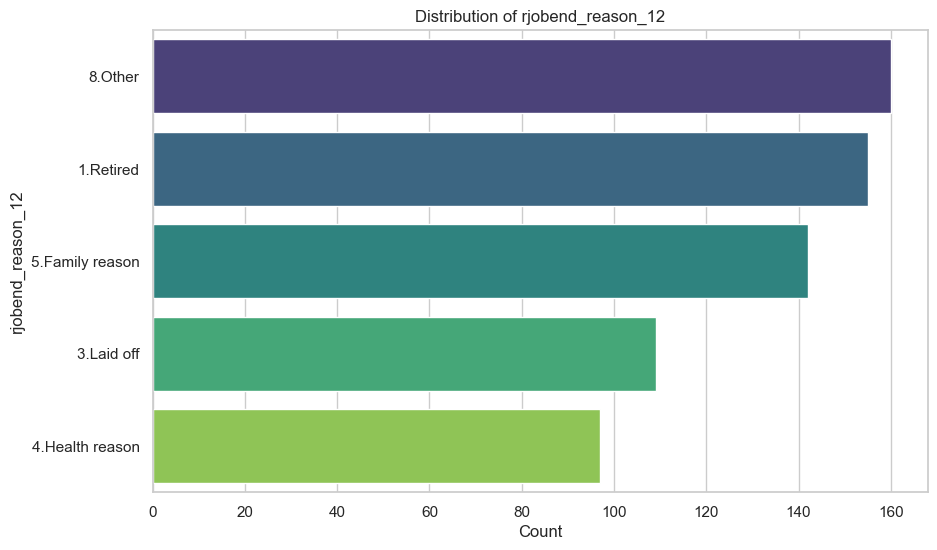


Value Counts for rjobend_reason_12:
rjobend_reason_12
8.Other            160
1.Retired          155
5.Family reason    142
3.Laid off         109
4.Health reason     97
Name: count, dtype: int64


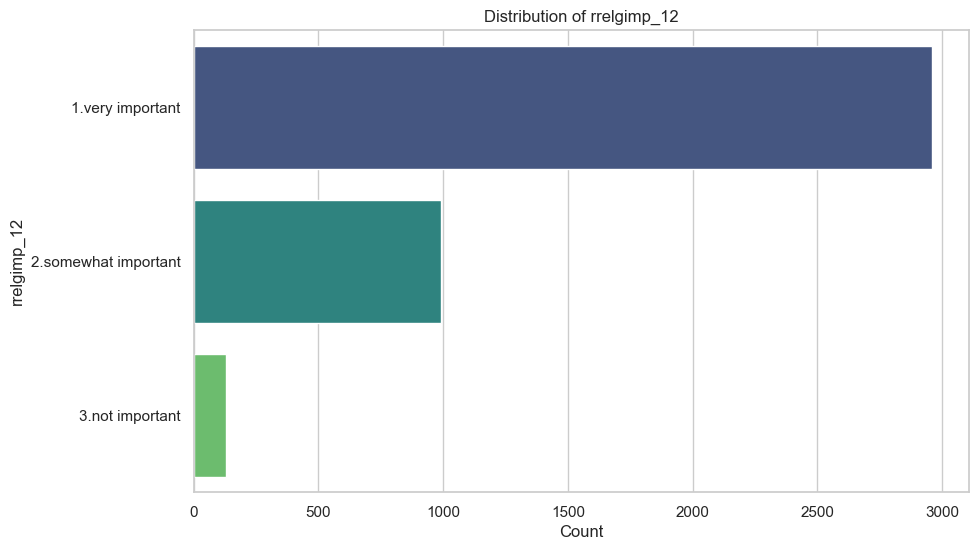


Value Counts for rrelgimp_12:
rrelgimp_12
1.very important        2959
2.somewhat important     992
3.not important          130
Name: count, dtype: int64


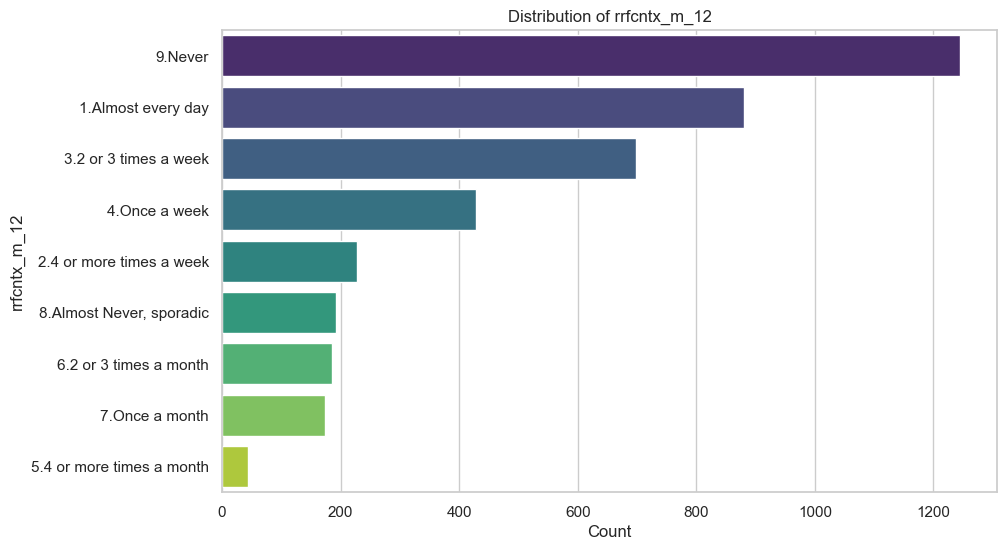


Value Counts for rrfcntx_m_12:
rrfcntx_m_12
9.Never                      1245
1.Almost every day            880
3.2 or 3 times a week         699
4.Once a week                 428
2.4 or more times a week      228
8.Almost Never, sporadic      193
6.2 or 3 times a month        185
7.Once a month                173
5.4 or more times a month      44
Name: count, dtype: int64


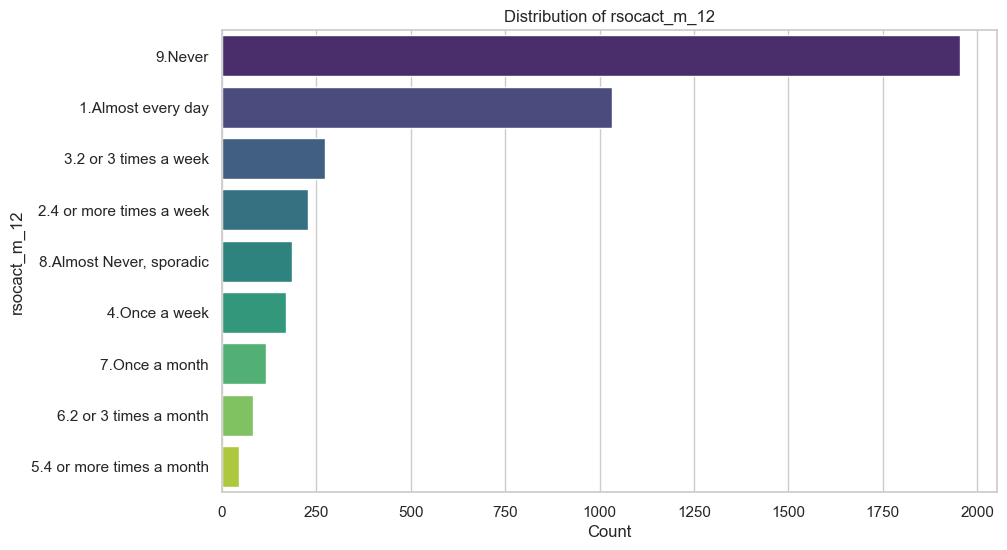


Value Counts for rsocact_m_12:
rsocact_m_12
9.Never                      1955
1.Almost every day           1033
3.2 or 3 times a week         272
2.4 or more times a week      228
8.Almost Never, sporadic      186
4.Once a week                 170
7.Once a month                116
6.2 or 3 times a month         83
5.4 or more times a month      45
Name: count, dtype: int64


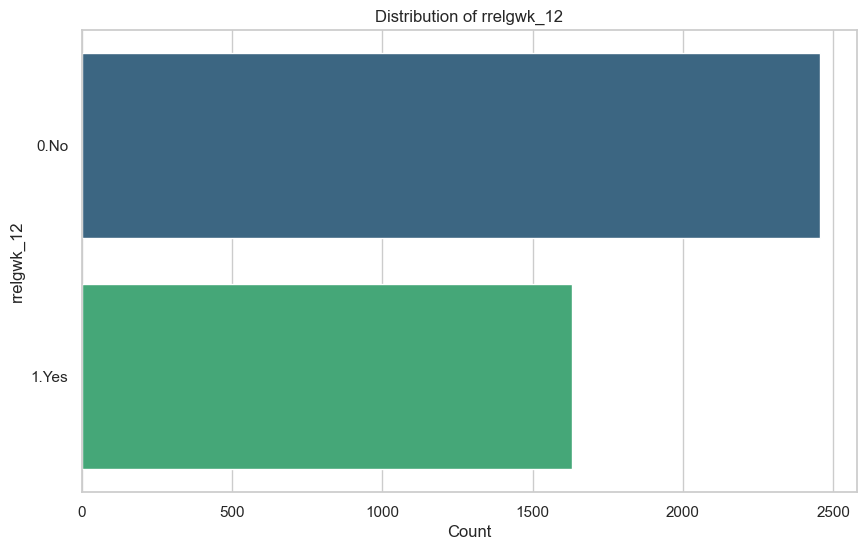


Value Counts for rrelgwk_12:
rrelgwk_12
0.No     2455
1.Yes    1631
Name: count, dtype: int64


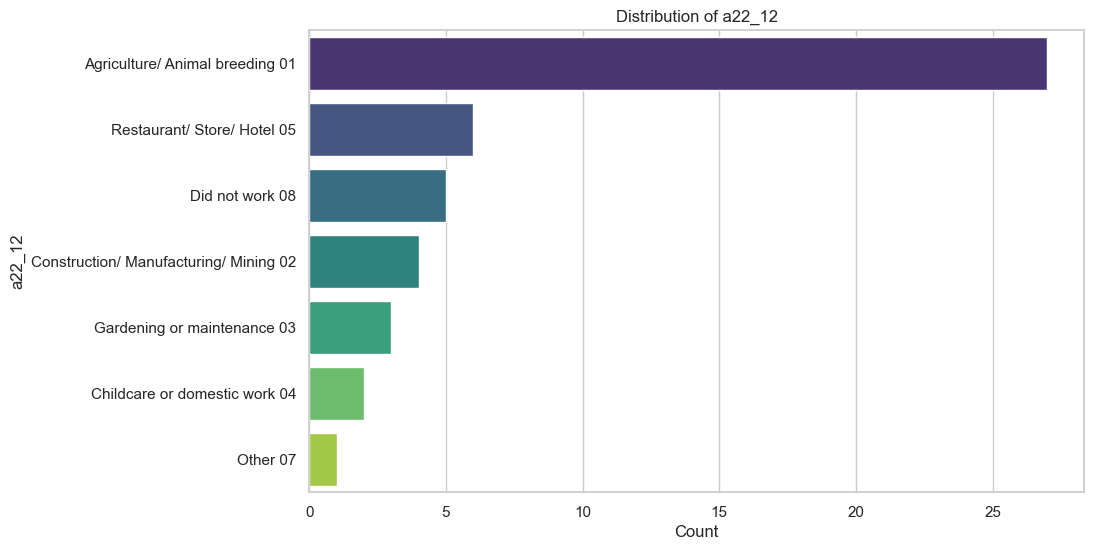


Value Counts for a22_12:
a22_12
Agriculture/ Animal breeding 01           27
Restaurant/ Store/ Hotel 05                6
Did not work 08                            5
Construction/ Manufacturing/ Mining 02     4
Gardening or maintenance 03                3
Childcare or domestic work 04              2
Other 07                                   1
Name: count, dtype: int64


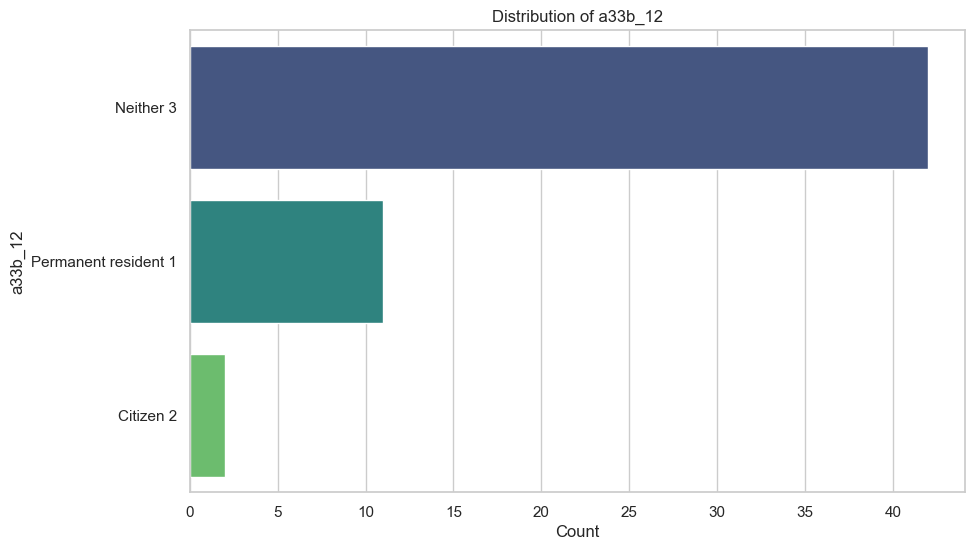


Value Counts for a33b_12:
a33b_12
Neither 3               42
Permanent resident 1    11
Citizen 2                2
Name: count, dtype: int64


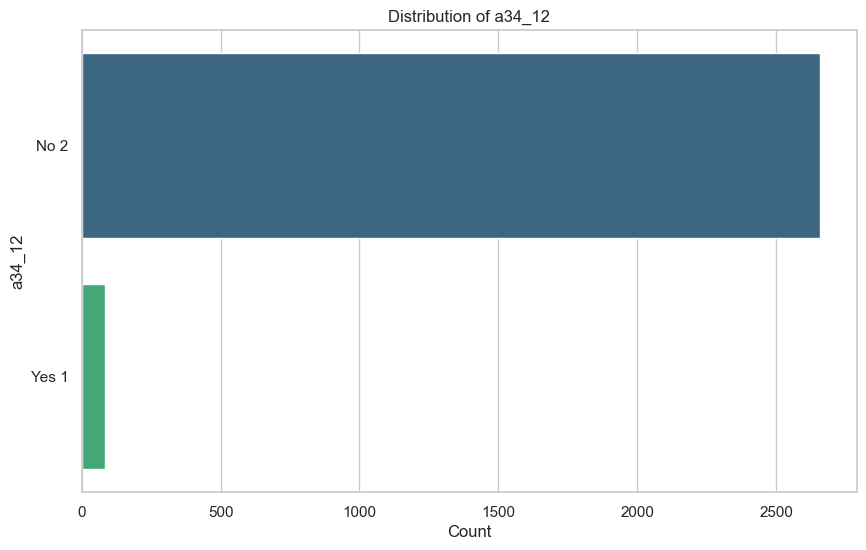


Value Counts for a34_12:
a34_12
No 2     2657
Yes 1      85
Name: count, dtype: int64


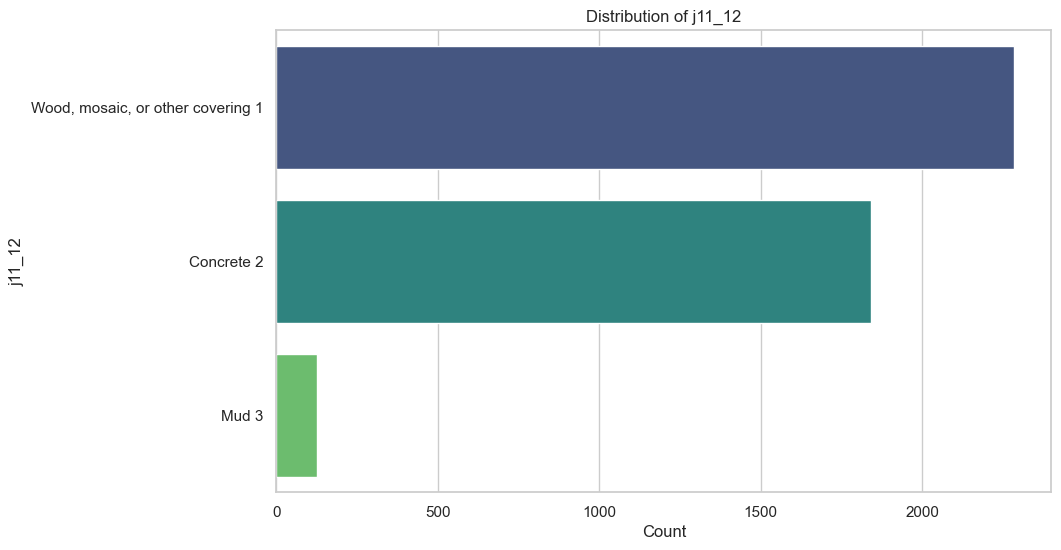


Value Counts for j11_12:
j11_12
Wood, mosaic, or other covering 1    2286
Concrete 2                           1841
Mud 3                                 127
Name: count, dtype: int64


In [ ]:
# Identify categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.drop(['uid'])

# Univariate analysis for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()

    # Print value counts
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


## Bivariate analysis
### Categorical variables vs target

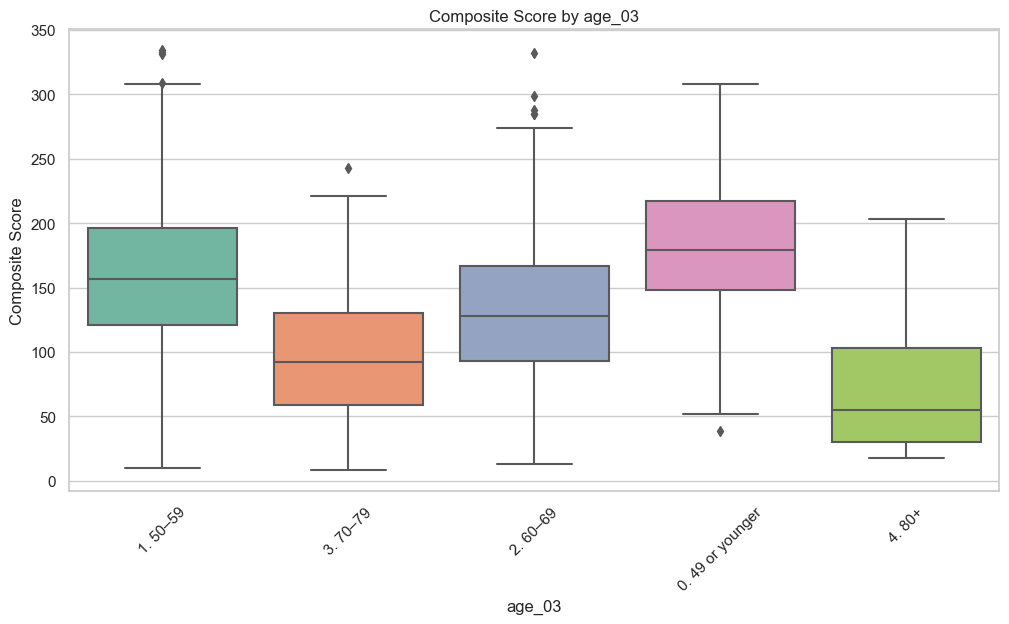


ANOVA results for age_03: F-statistic = 115.59, p-value = 0.0000


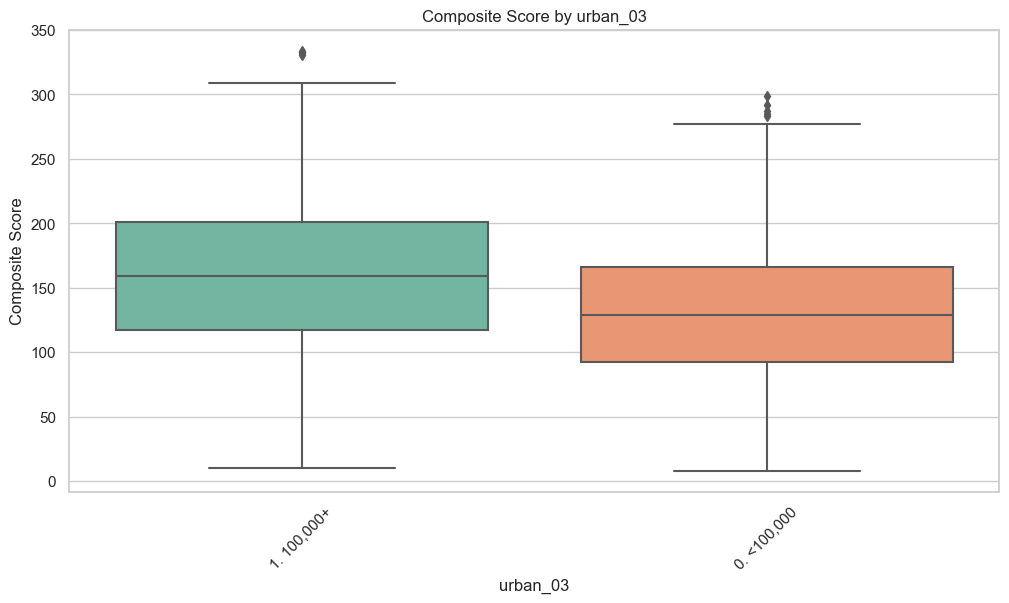


ANOVA results for urban_03: F-statistic = 202.22, p-value = 0.0000


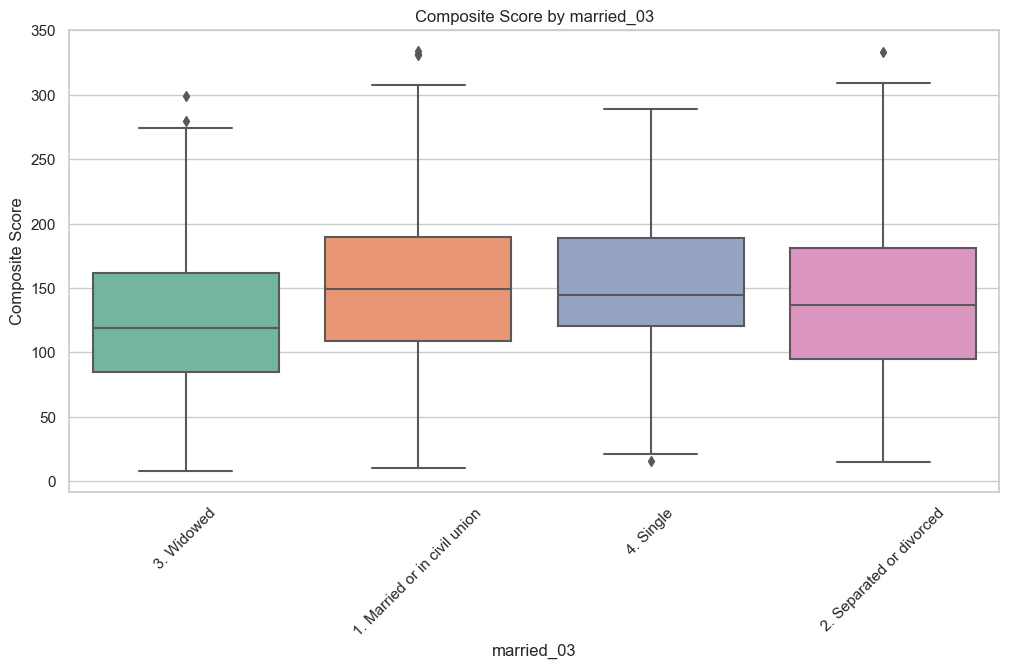


ANOVA results for married_03: F-statistic = 23.21, p-value = 0.0000


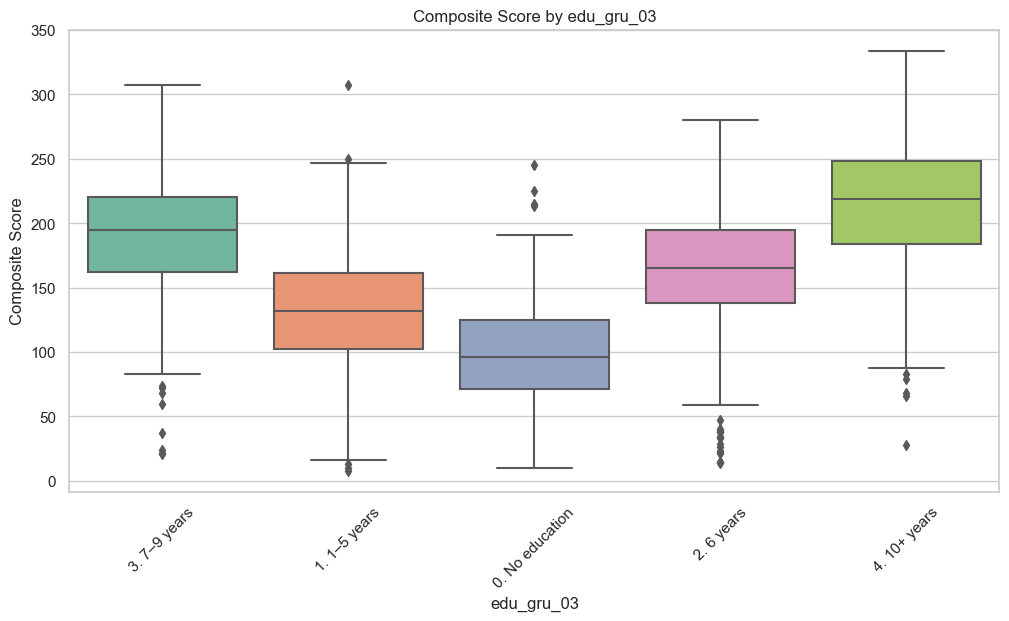


ANOVA results for edu_gru_03: F-statistic = 453.15, p-value = 0.0000


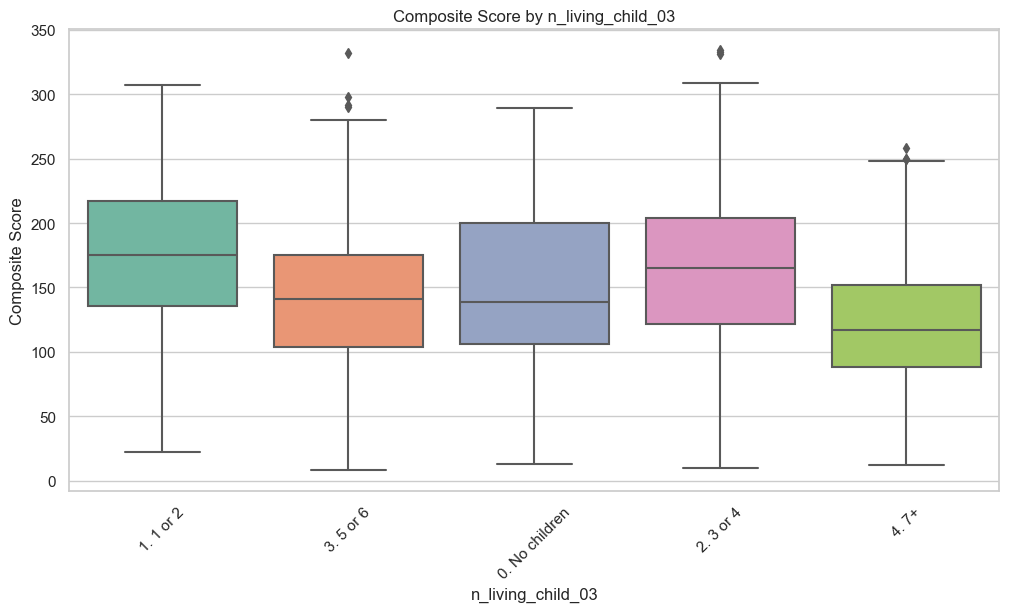


ANOVA results for n_living_child_03: F-statistic = 91.35, p-value = 0.0000


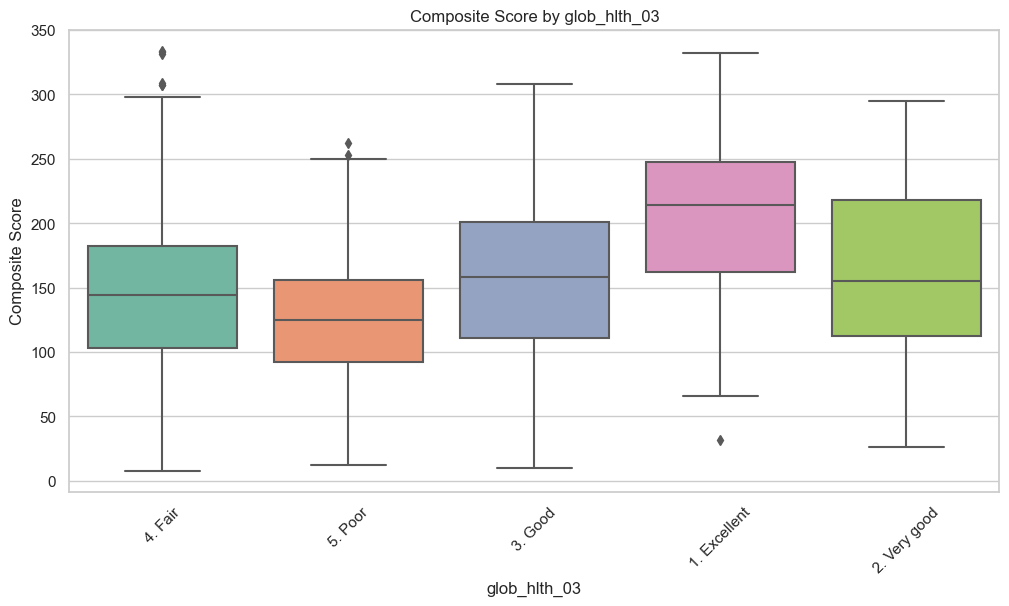


ANOVA results for glob_hlth_03: F-statistic = 31.40, p-value = 0.0000


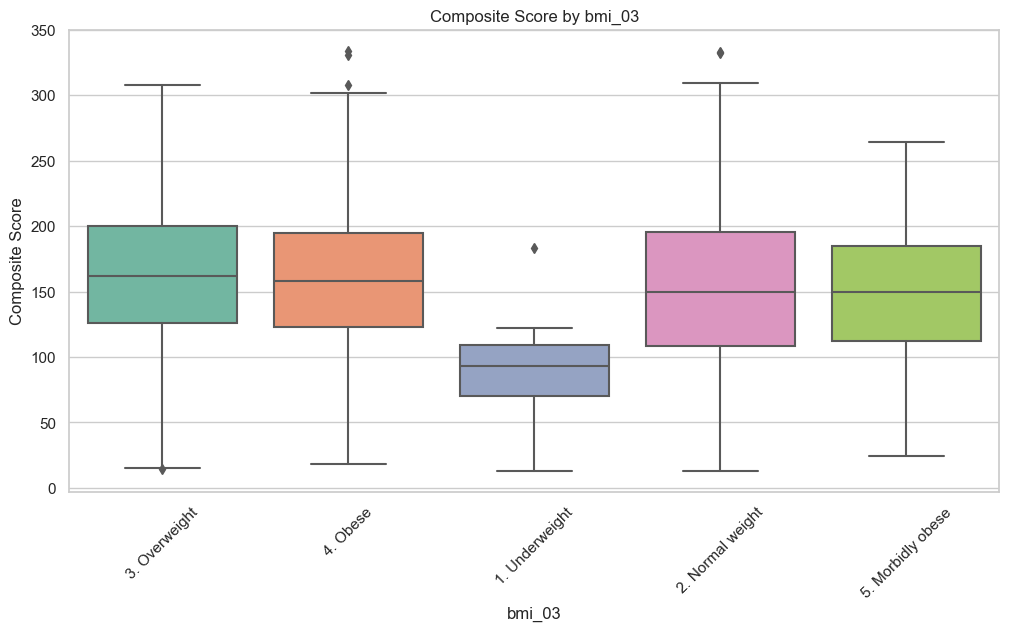


ANOVA results for bmi_03: F-statistic = 9.89, p-value = 0.0000


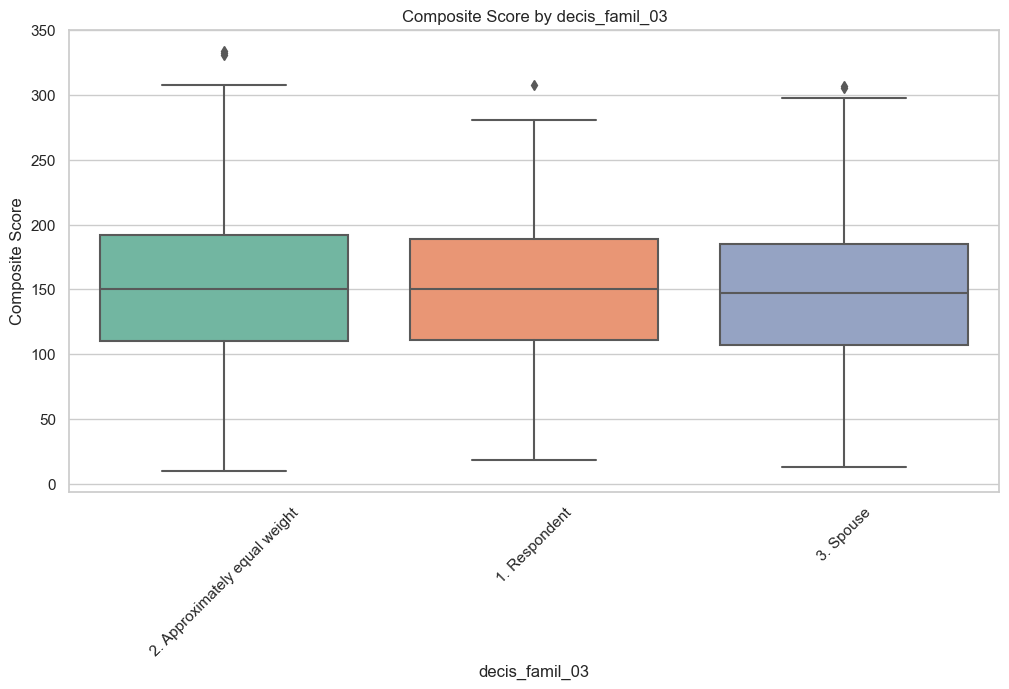


ANOVA results for decis_famil_03: F-statistic = 0.88, p-value = 0.4136


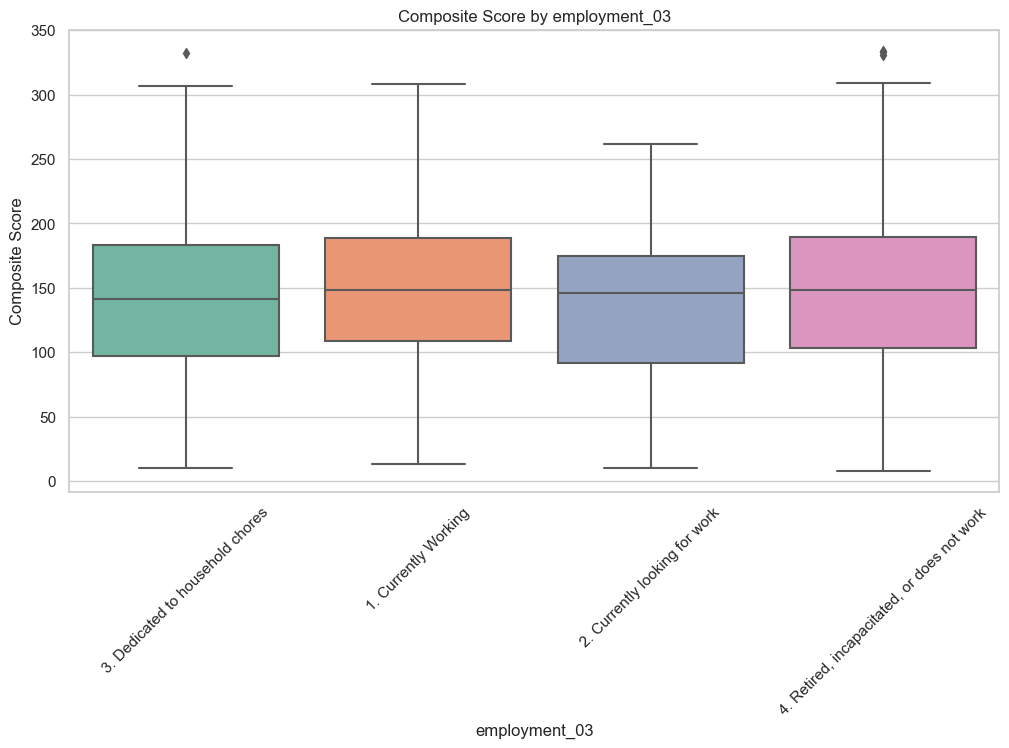


ANOVA results for employment_03: F-statistic = 6.27, p-value = 0.0003


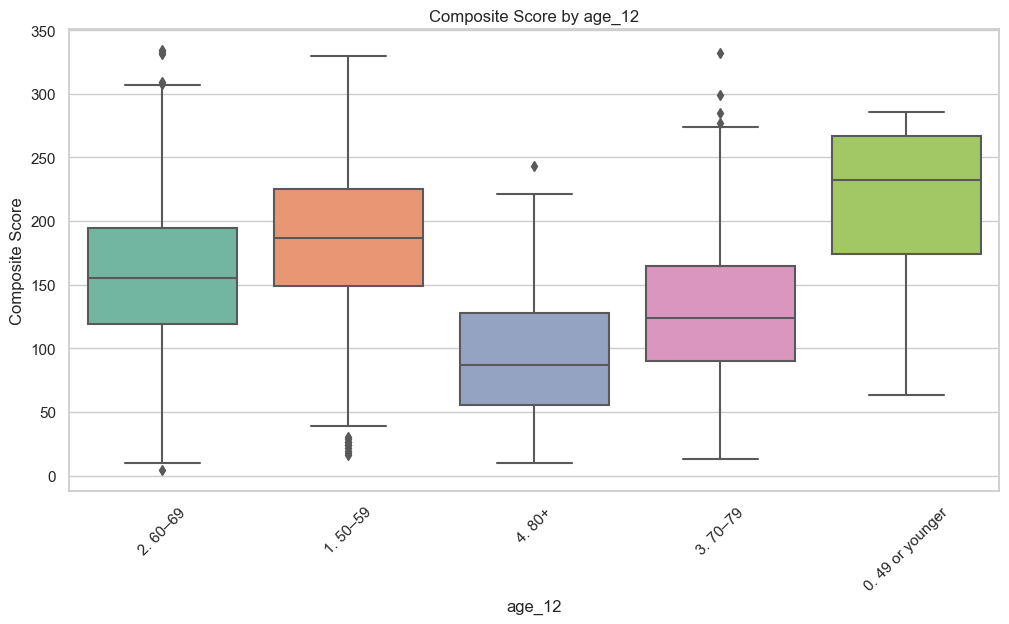


ANOVA results for age_12: F-statistic = 223.99, p-value = 0.0000


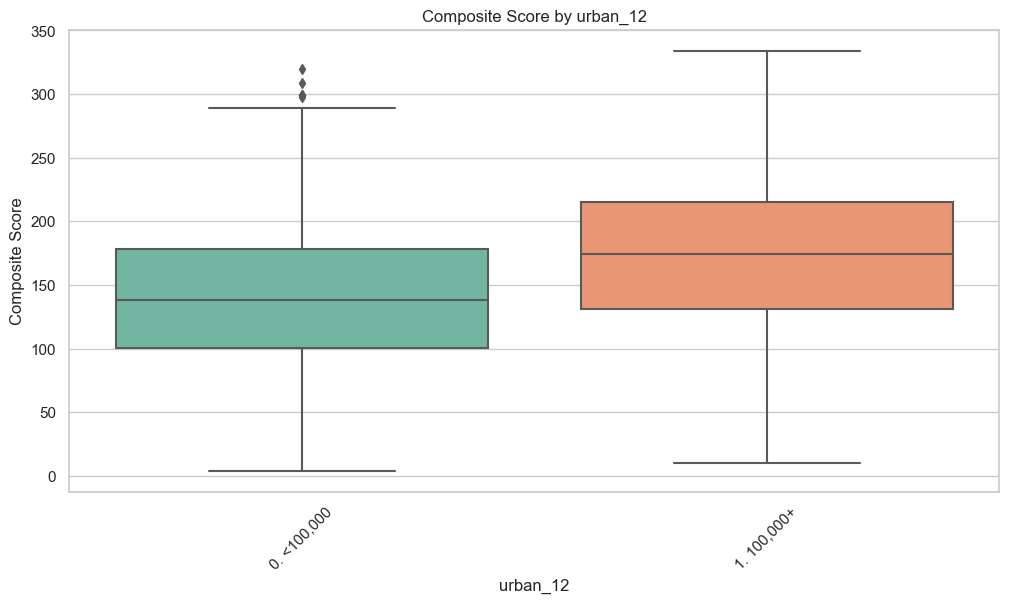


ANOVA results for urban_12: F-statistic = 327.67, p-value = 0.0000


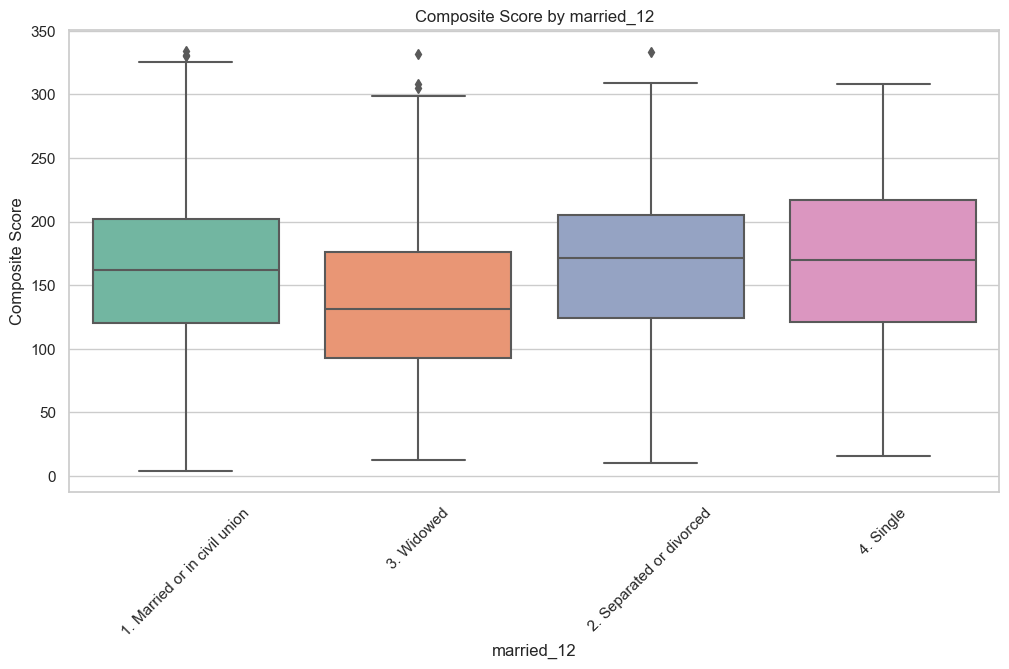


ANOVA results for married_12: F-statistic = 43.74, p-value = 0.0000


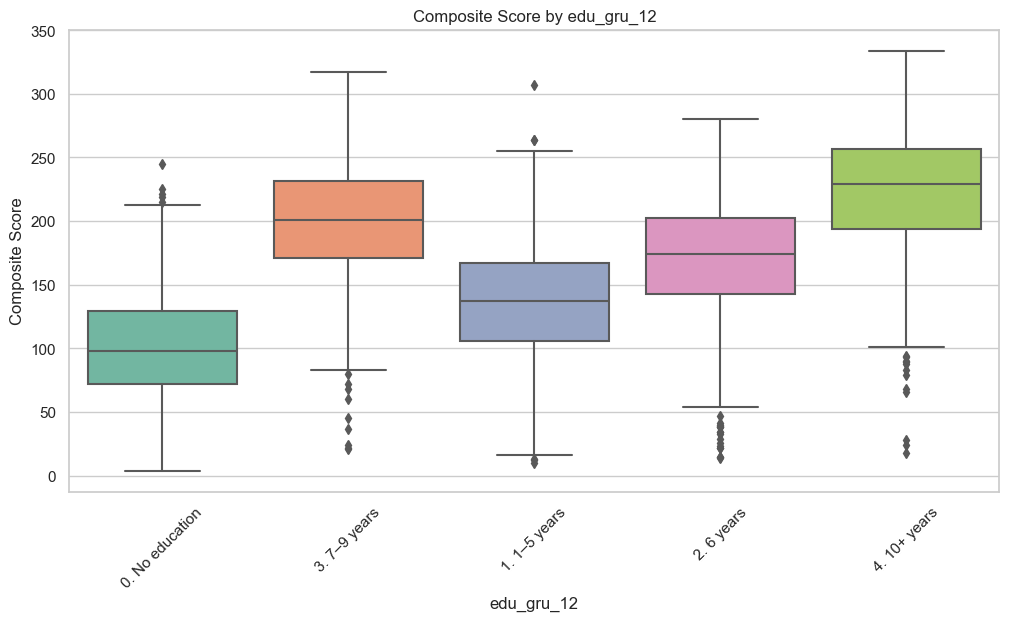


ANOVA results for edu_gru_12: F-statistic = 758.65, p-value = 0.0000


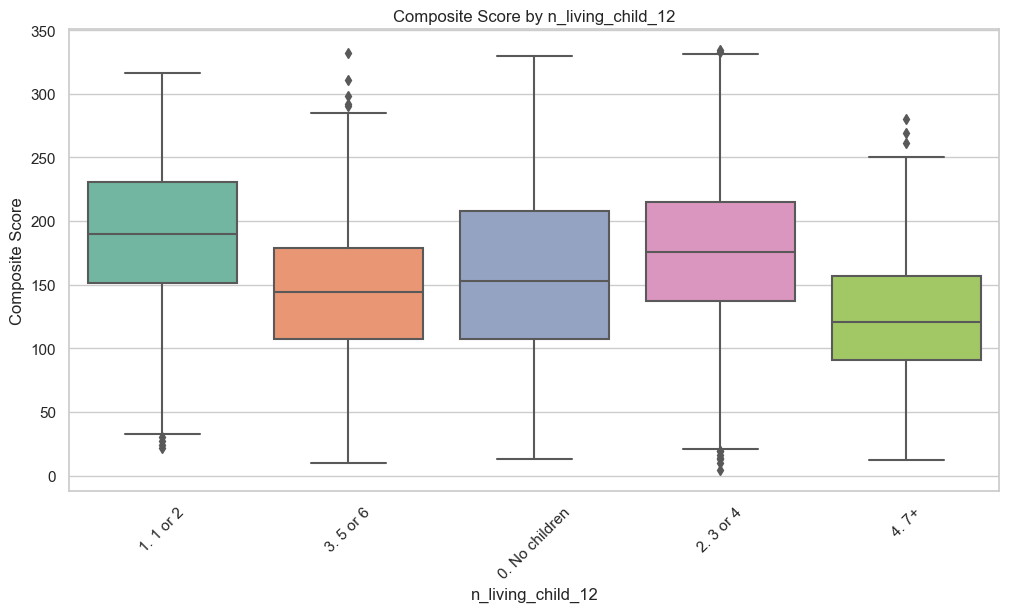


ANOVA results for n_living_child_12: F-statistic = 176.83, p-value = 0.0000


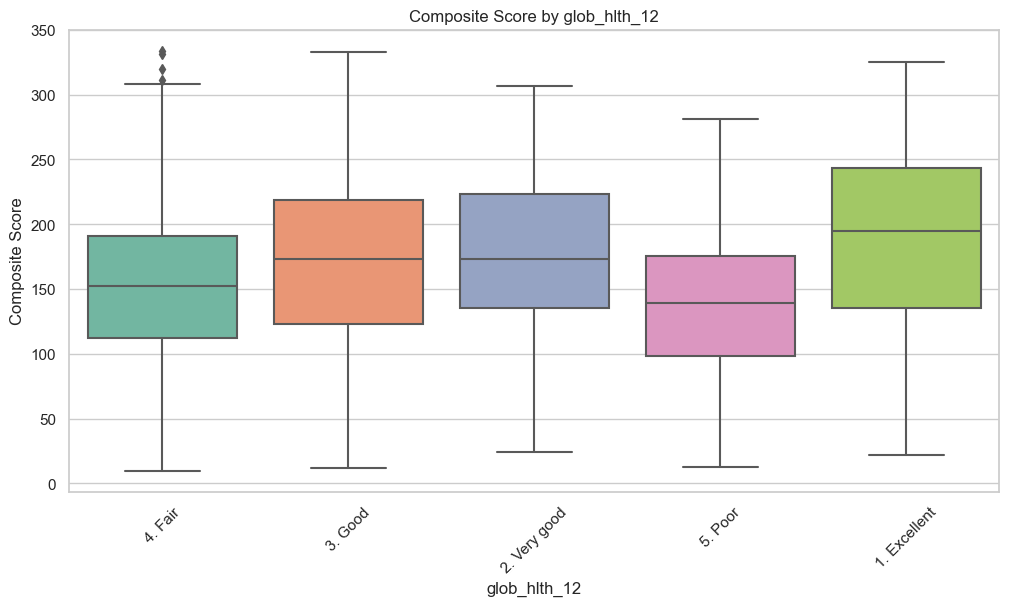


ANOVA results for glob_hlth_12: F-statistic = 39.02, p-value = 0.0000


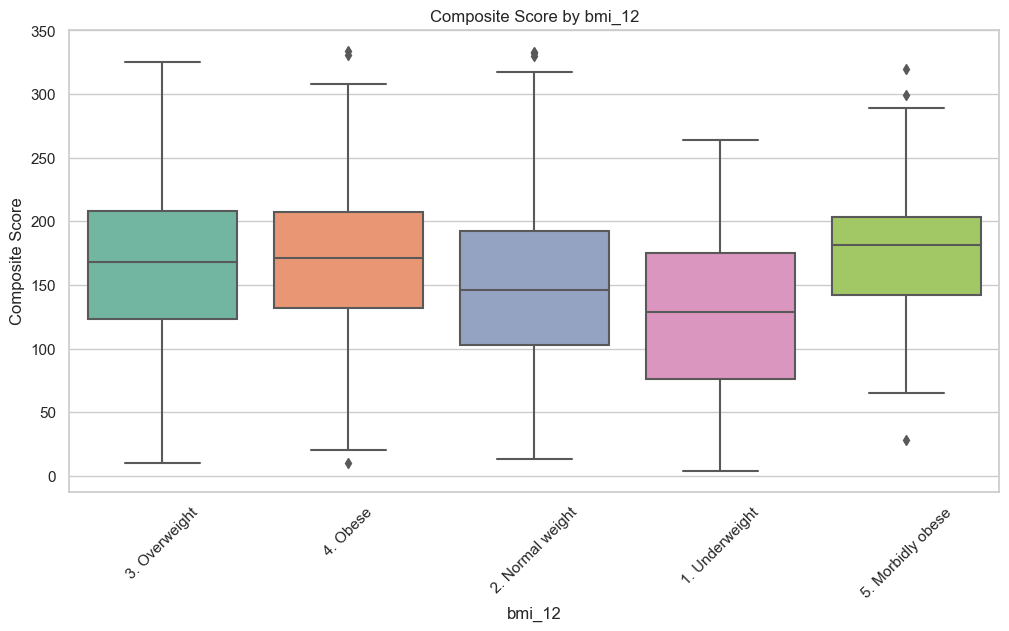


ANOVA results for bmi_12: F-statistic = 26.07, p-value = 0.0000


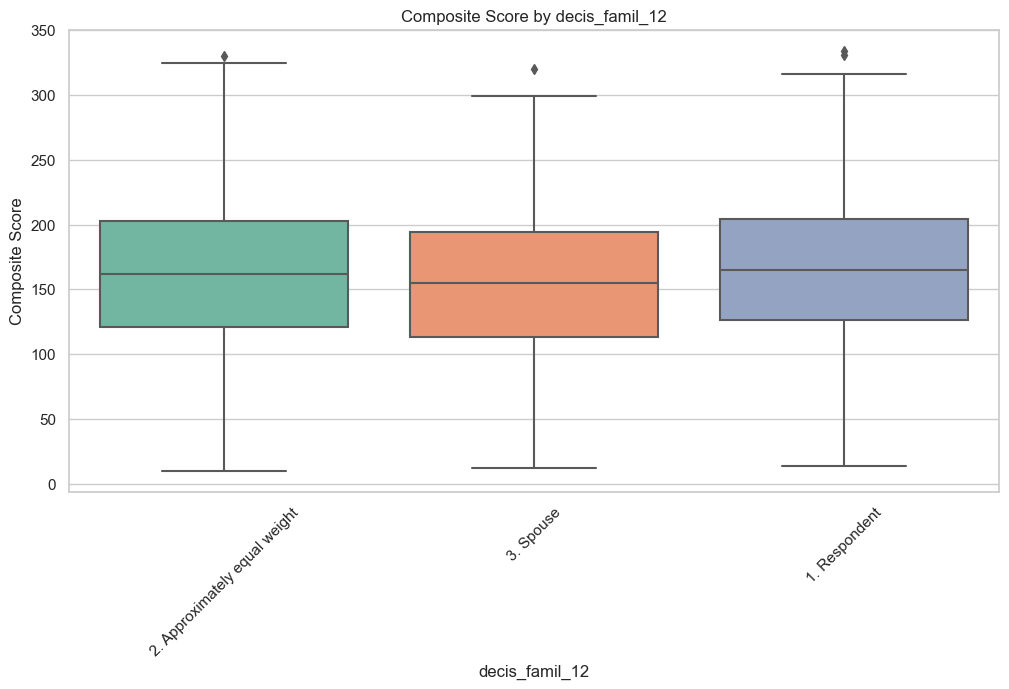


ANOVA results for decis_famil_12: F-statistic = 5.84, p-value = 0.0029


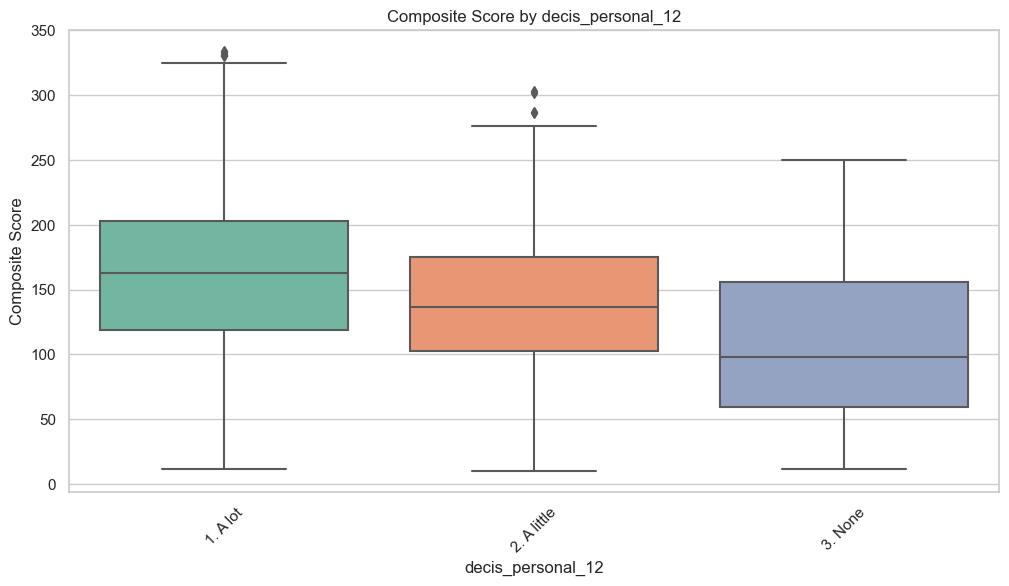


ANOVA results for decis_personal_12: F-statistic = 46.37, p-value = 0.0000


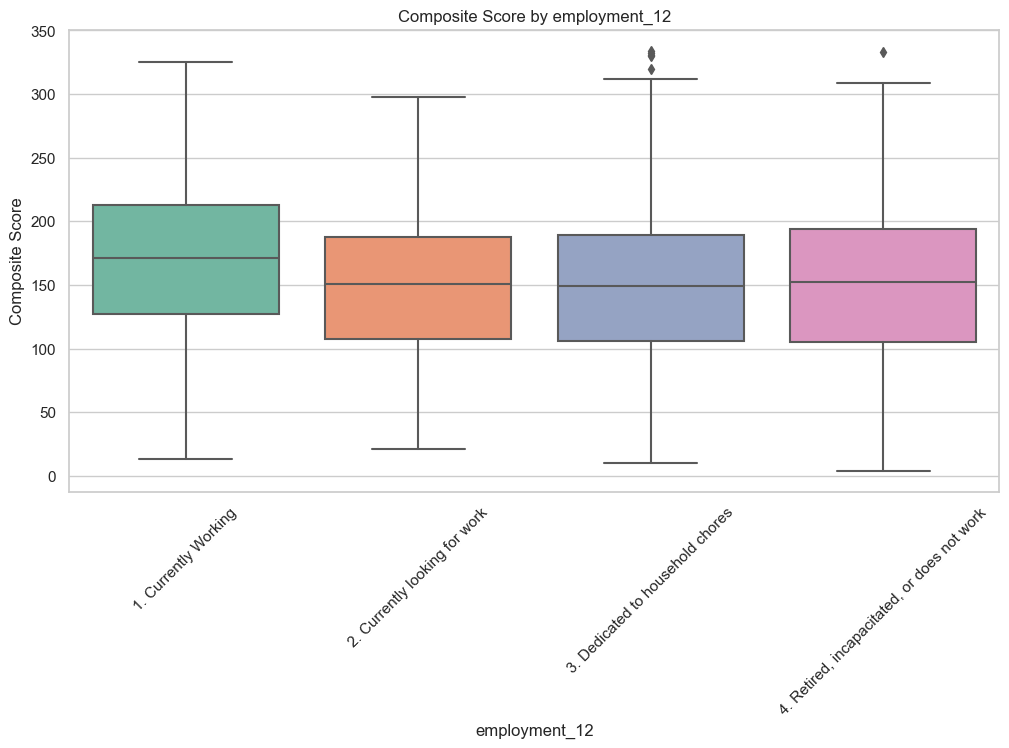


ANOVA results for employment_12: F-statistic = 39.52, p-value = 0.0000


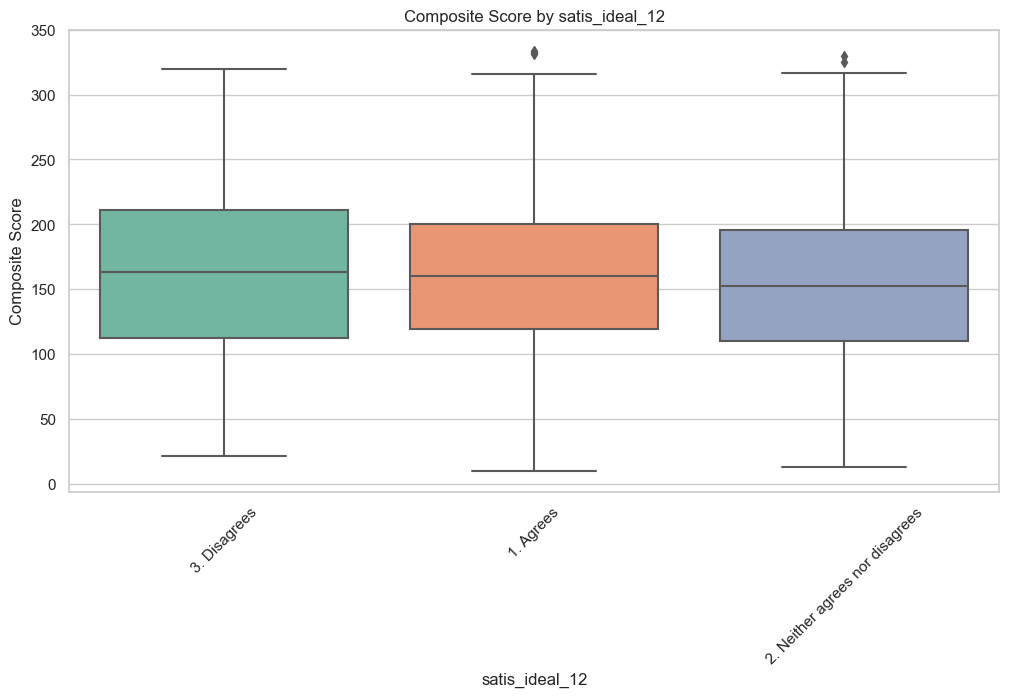


ANOVA results for satis_ideal_12: F-statistic = 3.80, p-value = 0.0224


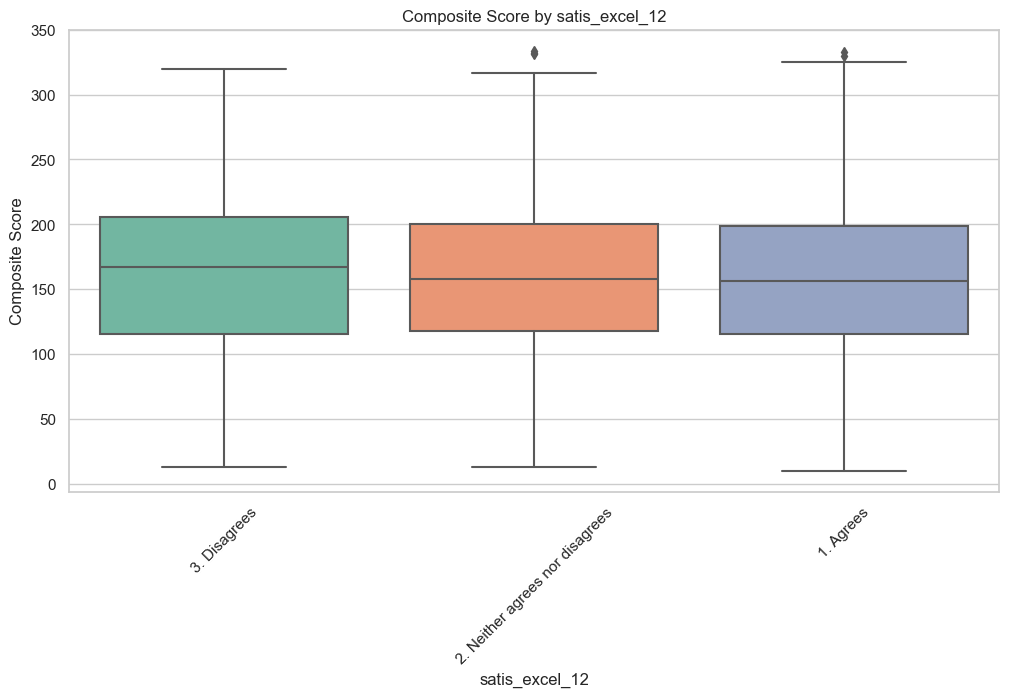


ANOVA results for satis_excel_12: F-statistic = 1.24, p-value = 0.2898


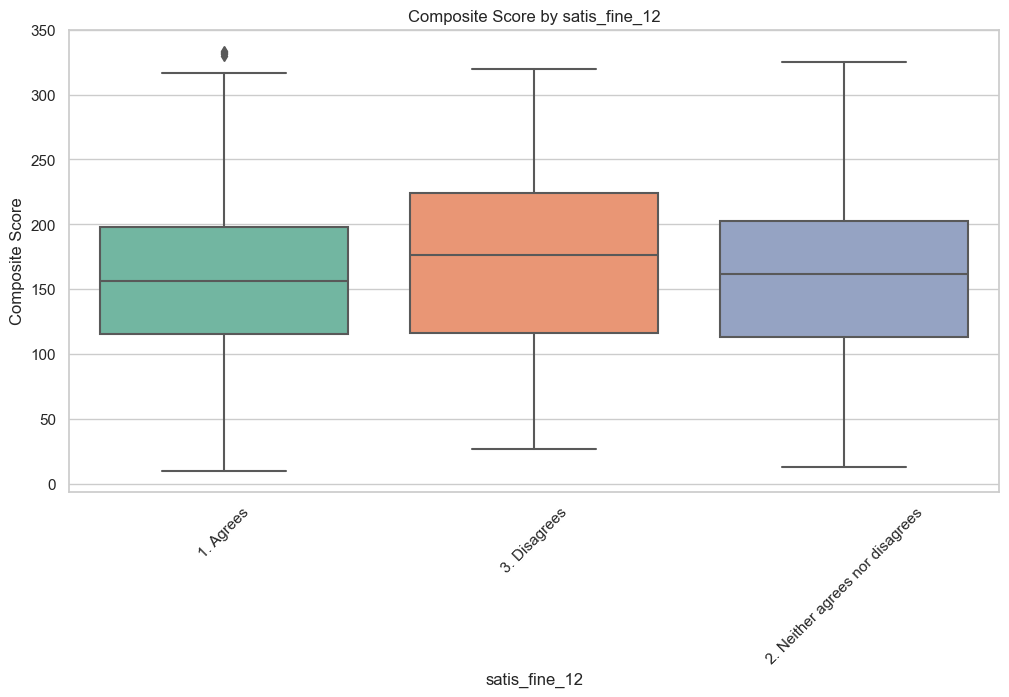


ANOVA results for satis_fine_12: F-statistic = 4.21, p-value = 0.0149


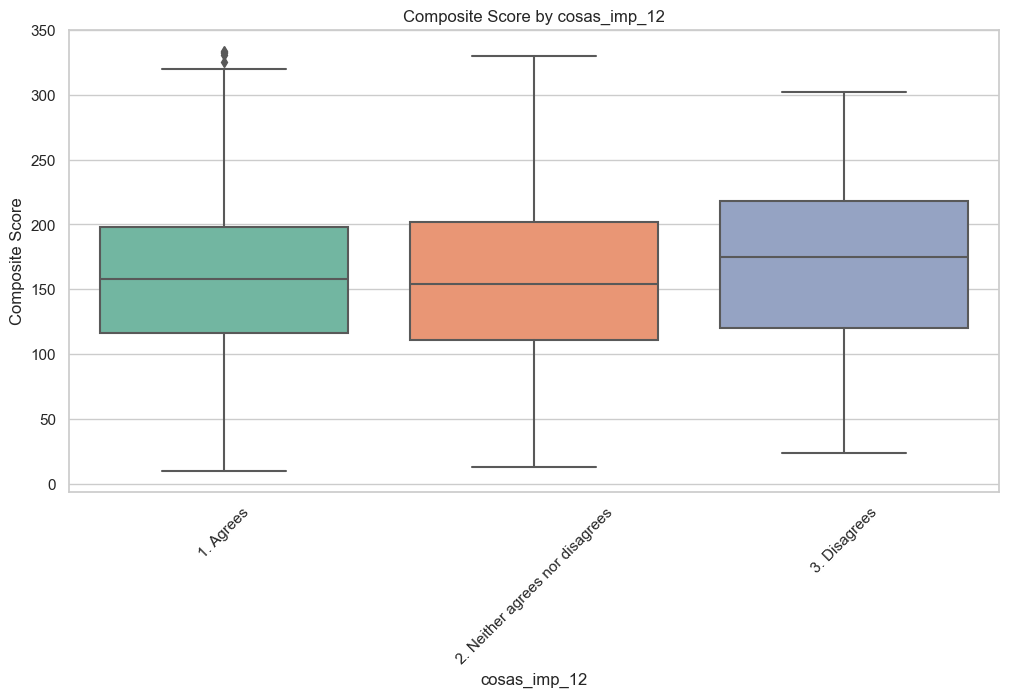


ANOVA results for cosas_imp_12: F-statistic = 5.39, p-value = 0.0046


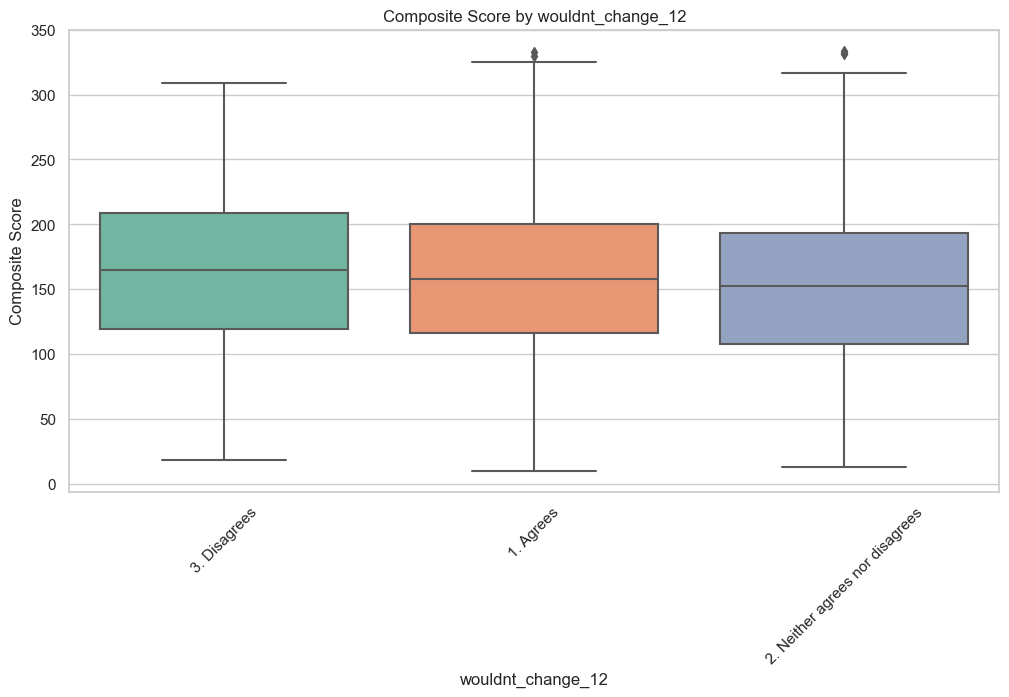


ANOVA results for wouldnt_change_12: F-statistic = 7.03, p-value = 0.0009


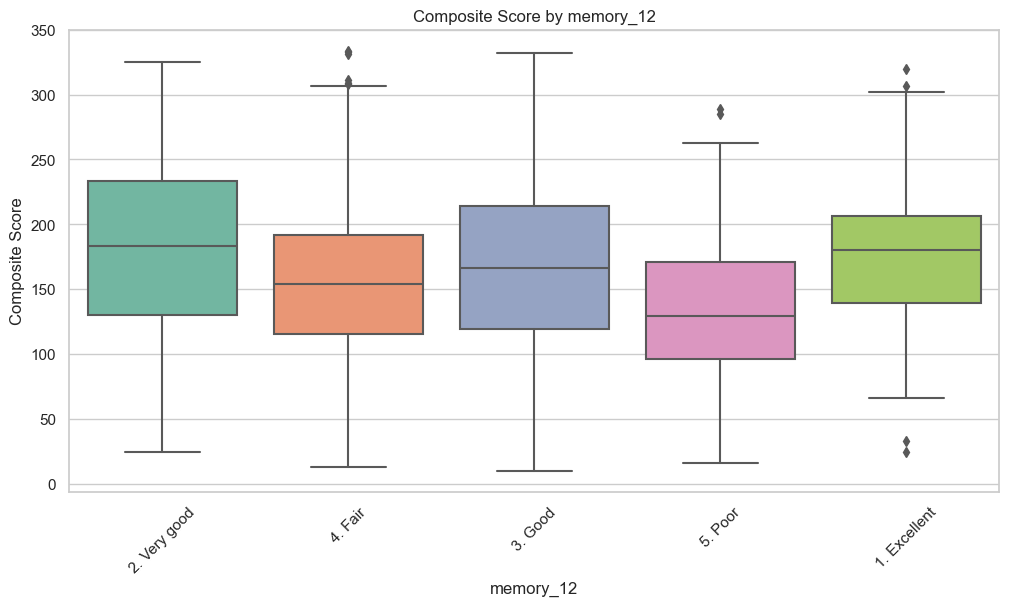


ANOVA results for memory_12: F-statistic = 30.96, p-value = 0.0000


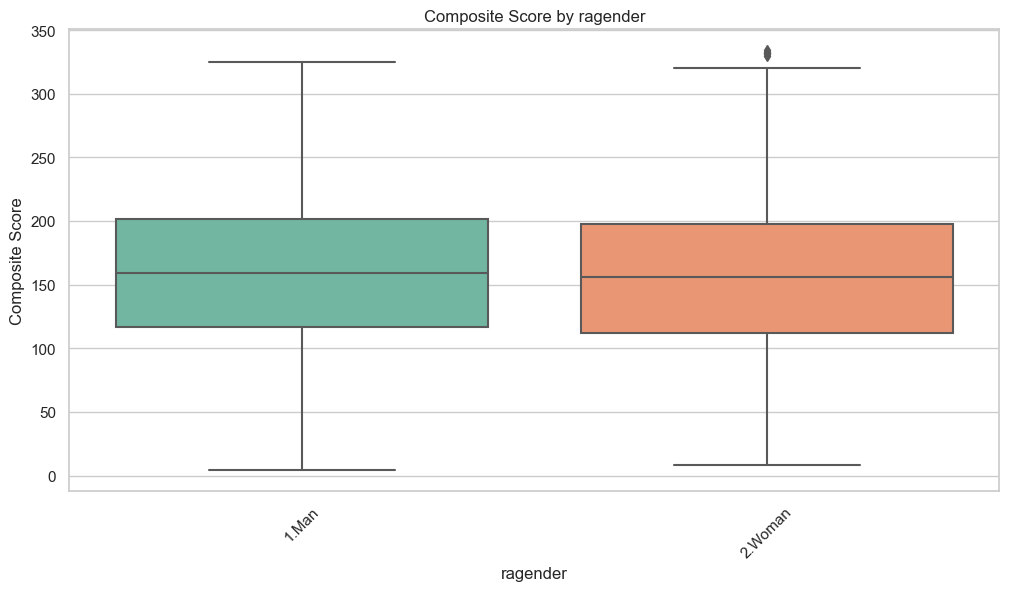


ANOVA results for ragender: F-statistic = 5.26, p-value = 0.0219


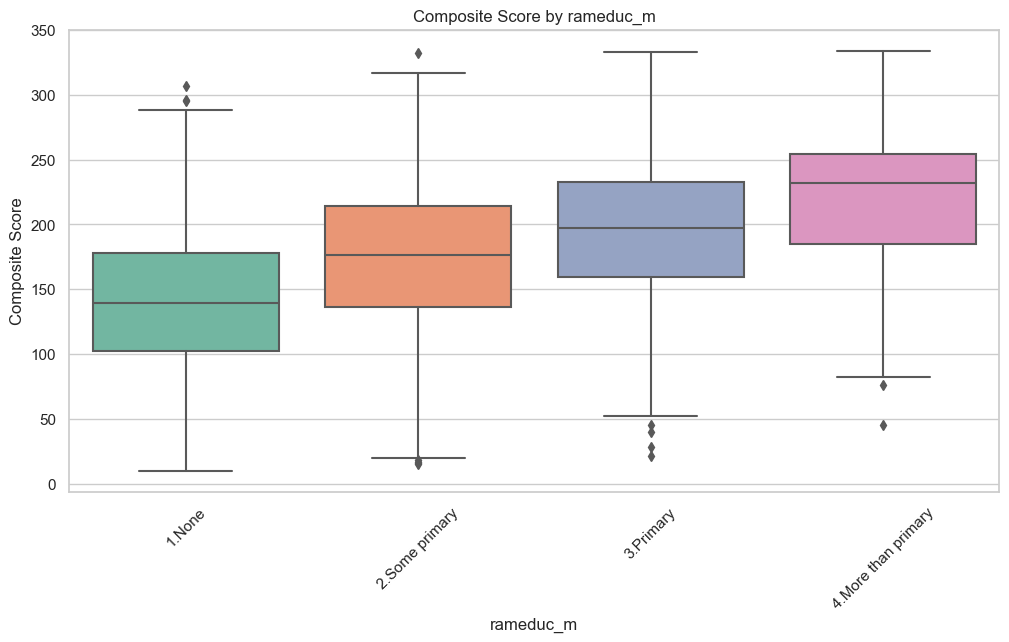


ANOVA results for rameduc_m: F-statistic = 201.72, p-value = 0.0000


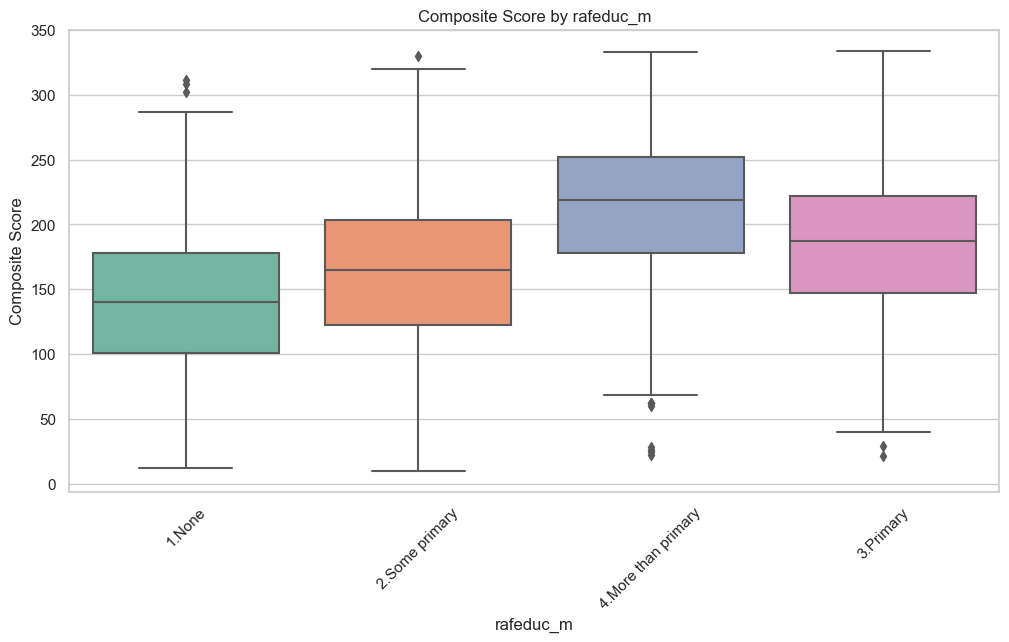


ANOVA results for rafeduc_m: F-statistic = 166.30, p-value = 0.0000


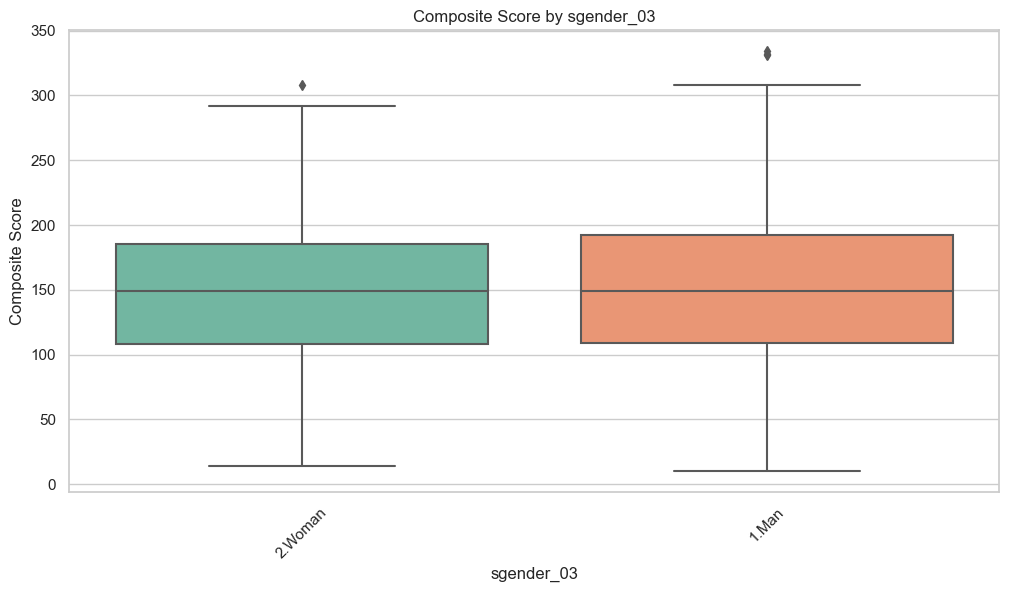


ANOVA results for sgender_03: F-statistic = 0.79, p-value = 0.3731


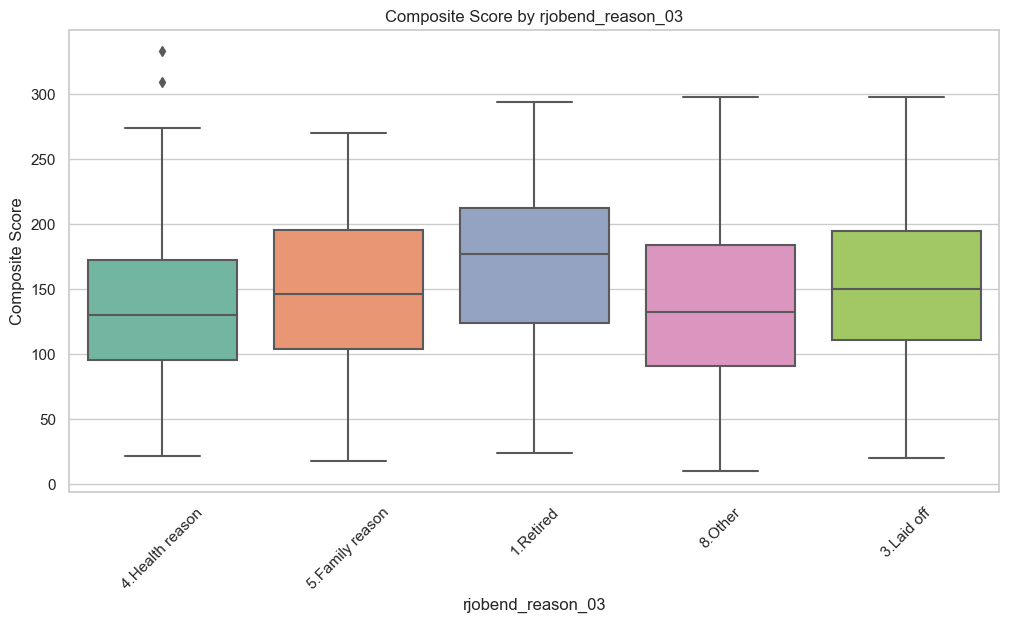


ANOVA results for rjobend_reason_03: F-statistic = 3.84, p-value = 0.0044


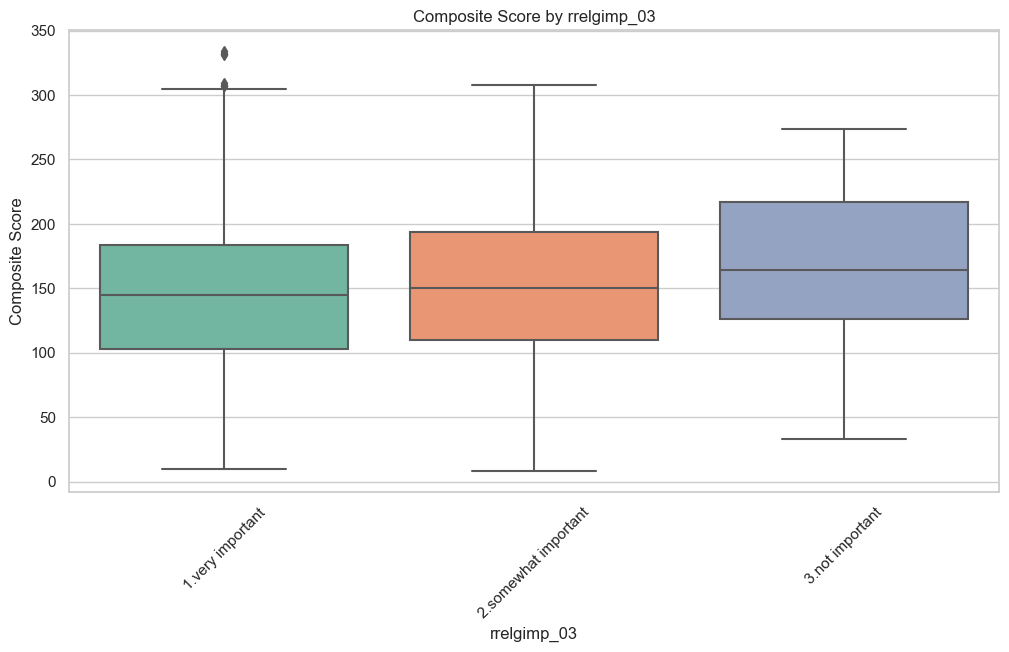


ANOVA results for rrelgimp_03: F-statistic = 9.24, p-value = 0.0001


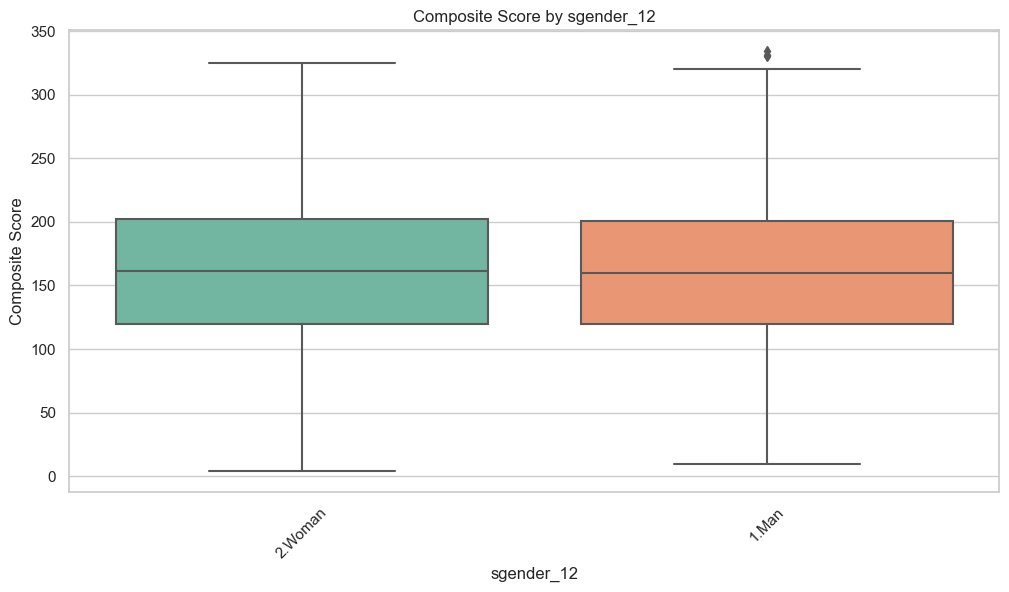


ANOVA results for sgender_12: F-statistic = 0.18, p-value = 0.6704


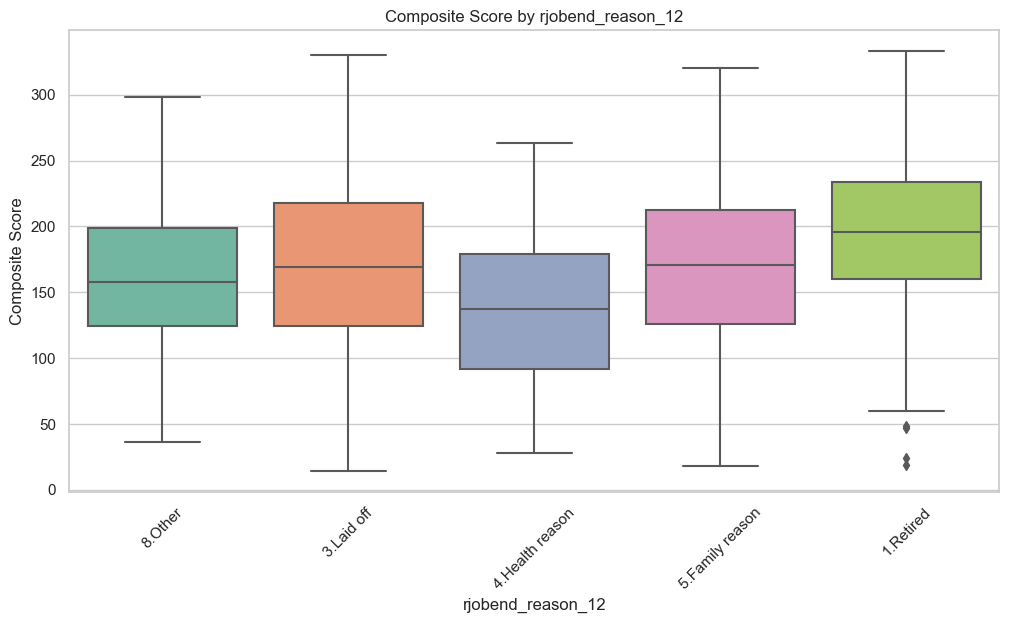


ANOVA results for rjobend_reason_12: F-statistic = 12.12, p-value = 0.0000


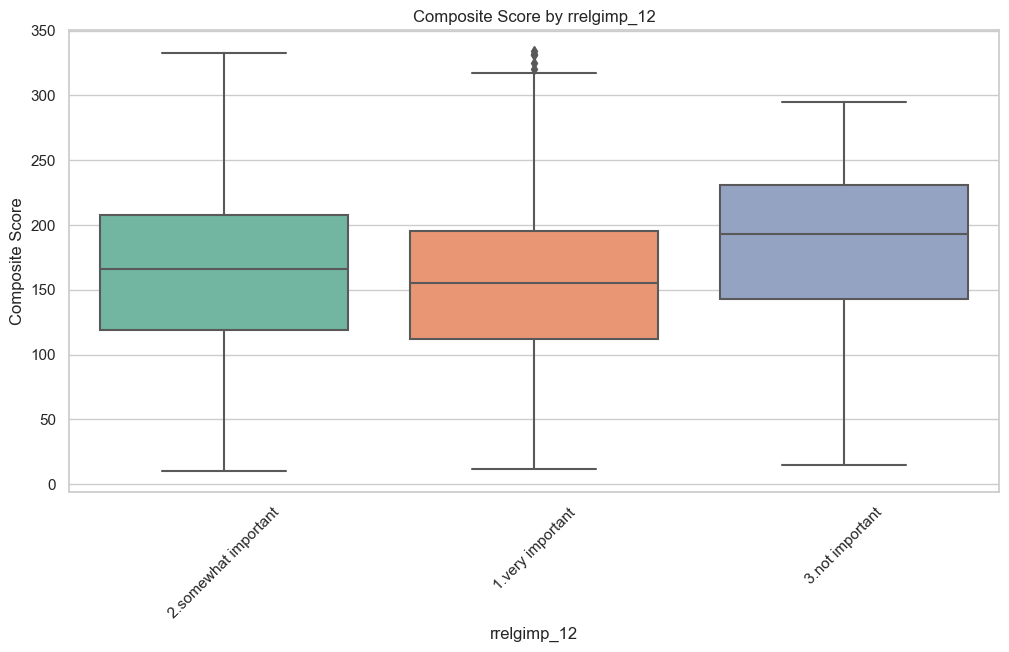


ANOVA results for rrelgimp_12: F-statistic = 25.47, p-value = 0.0000


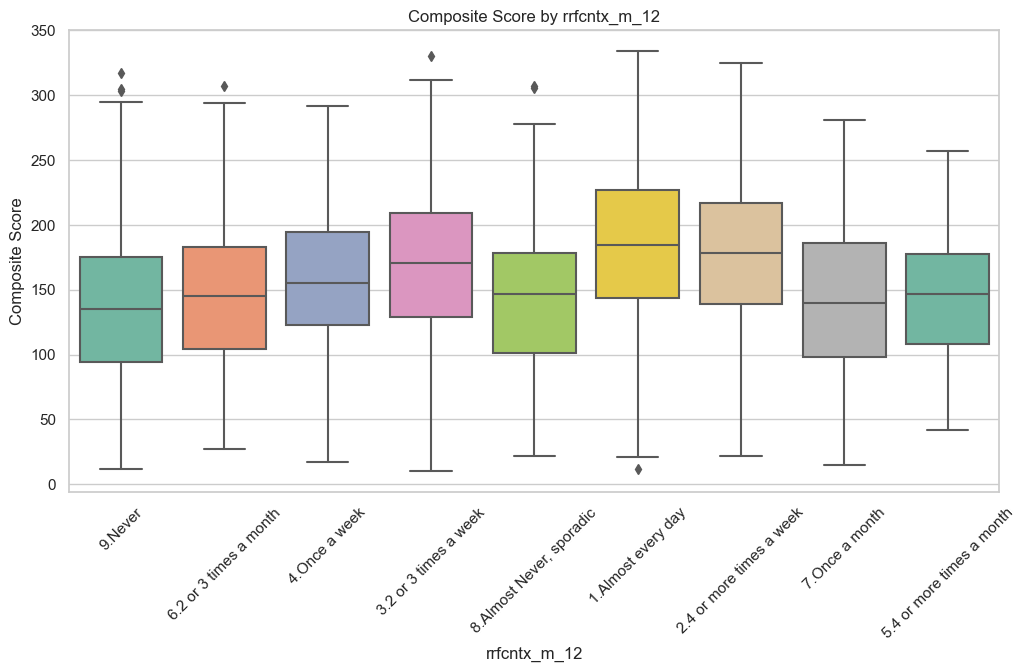


ANOVA results for rrfcntx_m_12: F-statistic = 55.55, p-value = 0.0000


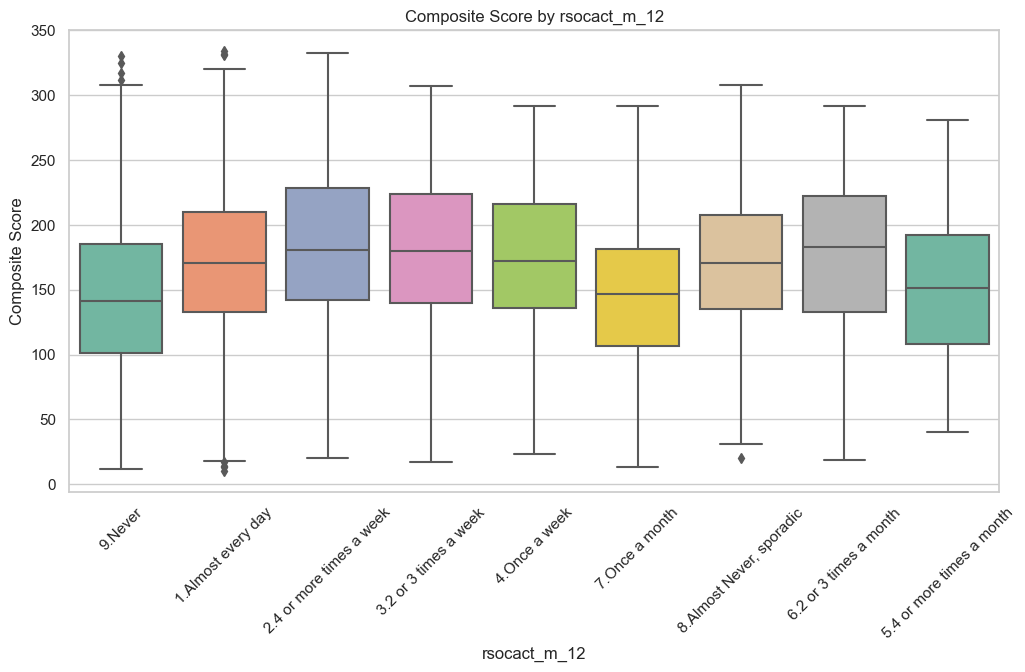


ANOVA results for rsocact_m_12: F-statistic = 34.32, p-value = 0.0000


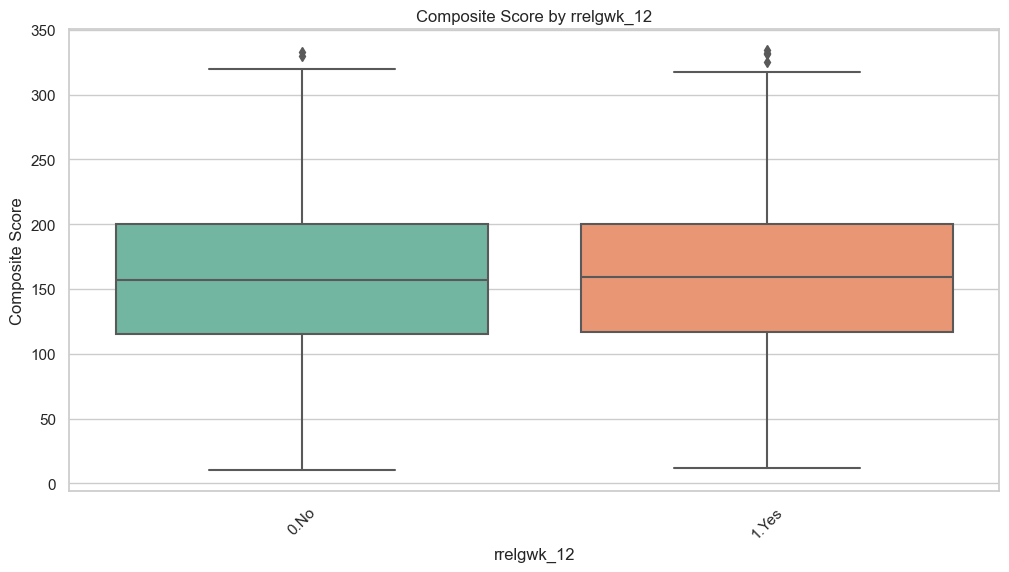


ANOVA results for rrelgwk_12: F-statistic = 0.51, p-value = 0.4747


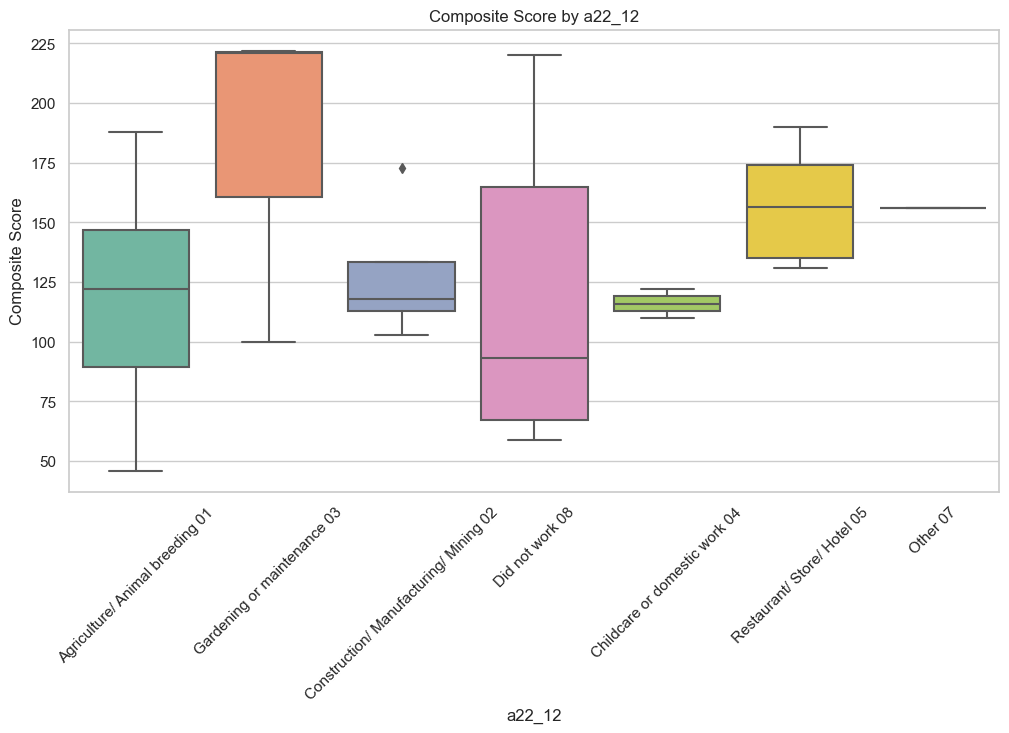


ANOVA results for a22_12: F-statistic = 1.38, p-value = 0.2466


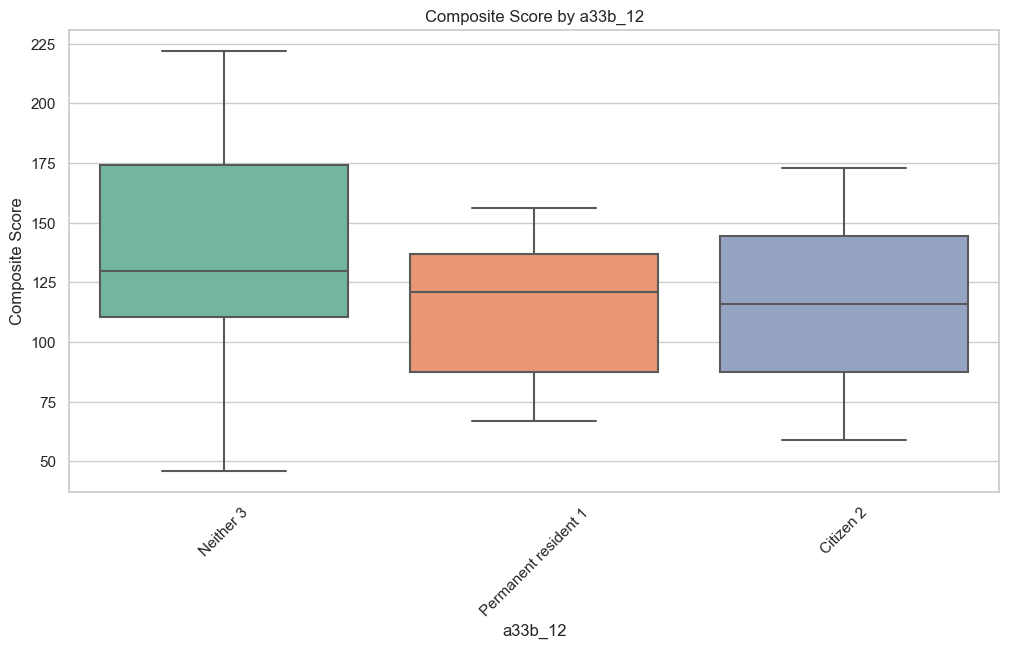


ANOVA results for a33b_12: F-statistic = 1.77, p-value = 0.1807


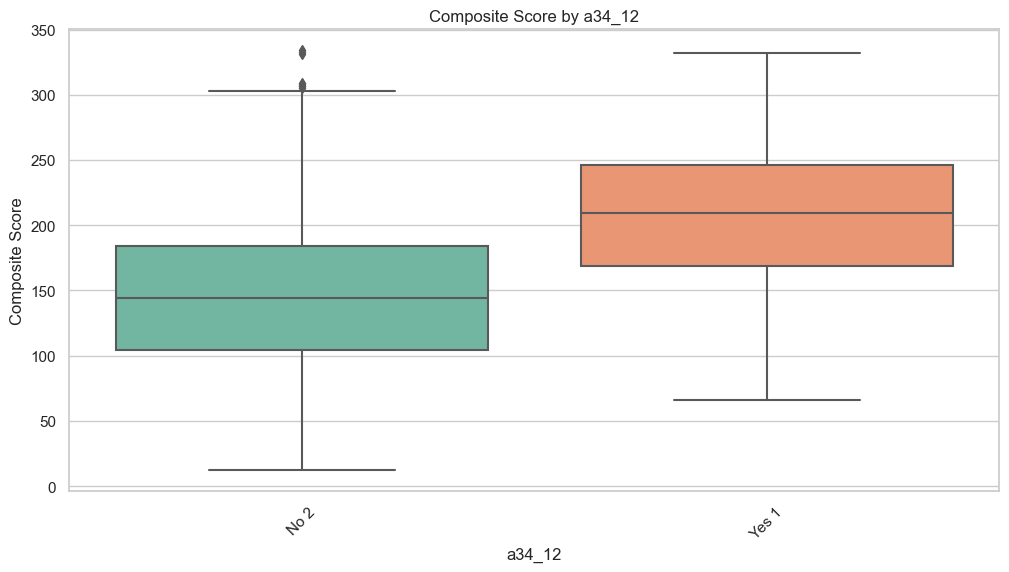


ANOVA results for a34_12: F-statistic = 84.70, p-value = 0.0000


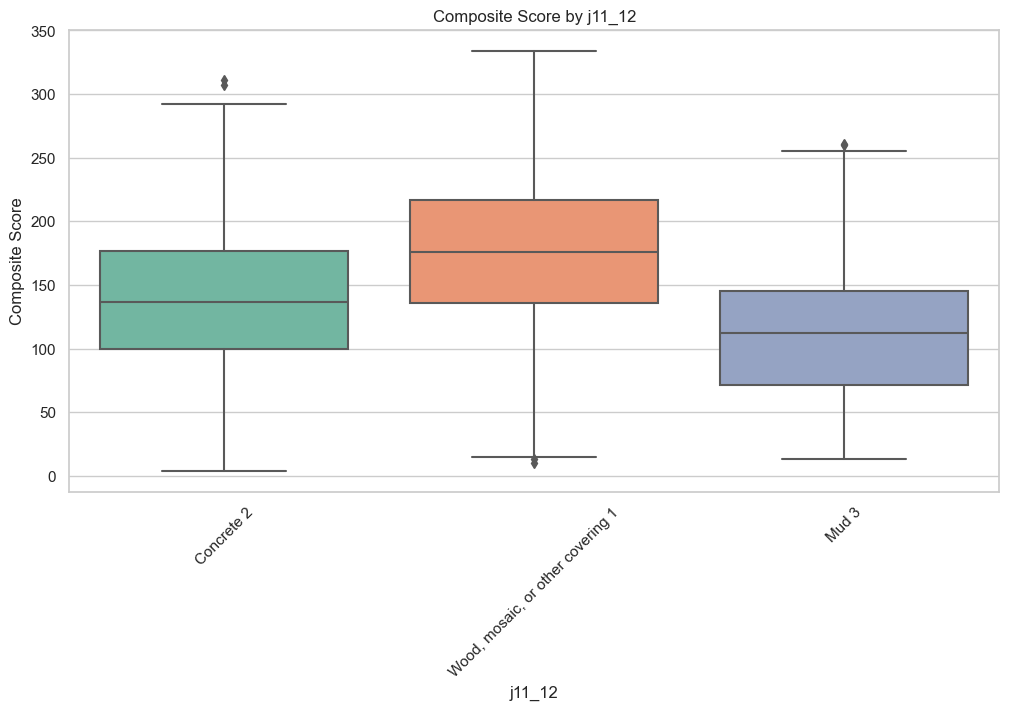


ANOVA results for j11_12: F-statistic = 255.43, p-value = 0.0000


In [ ]:
# Bivariate analysis for categorical variables
for col in categorical_cols:
    if data[col].nunique() <= 10:  # Limit to variables with fewer categories for readability
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y='composite_score', data=data, palette='Set2')
        plt.title(f'Composite Score by {col}')
        plt.xlabel(col)
        plt.ylabel('Composite Score')
        plt.xticks(rotation=45)
        plt.show()

        # Perform ANOVA test
        from scipy.stats import f_oneway

        groups = [group['composite_score'].dropna() for name, group in data.groupby(col)]
        if len(groups) > 1:
            f_stat, p_value = f_oneway(*groups)
            print(f"\nANOVA results for {col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


### Correlation matrix Heatmap


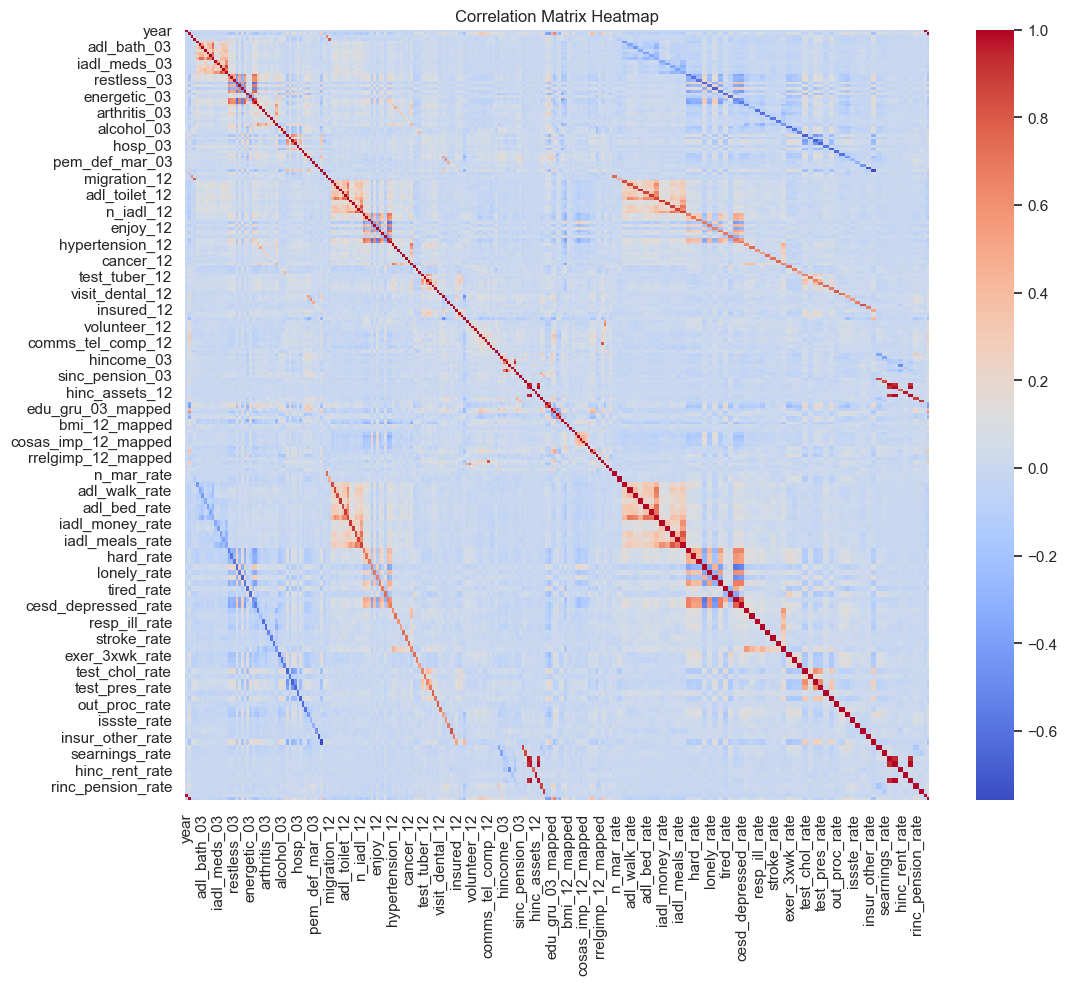

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation matrix
corr_matrix = data[numerical_cols + ['composite_score']].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Data Preprocessing


We will use 2012 features as primary features.

When 2003 features are available, we will compute a rate of change between 2003 and 2012 features.

Features without year suffixes (static features) will be used as they are.

We will also add a time_gap variable representing the difference between the feature collection year and the target year.


## Data Cleaning
We start by checking for missing values

In [ ]:
# Checking the proportion of missing values per column
missing_values_percentage = data.isnull().mean() * 100 

print(missing_values_percentage)

uid                 0.000000
year                0.000000
composite_score     0.000000
age_03             33.525213
urban_03           33.479162
                     ...    
a21_12             98.733594
a22_12             98.894773
a33b_12            98.733594
a34_12             36.863919
j11_12              2.049275
Length: 186, dtype: float64


Missing values are prevalent with some variables (like a21_12 and a22_12) having over 98% missing values.


In [ ]:
# Identify columns with missing values in train_features and calculate the percentage of missing values for each
missing_values_features = train_features.isnull().mean() * 100
columns_with_missing_values = missing_values_features[missing_values_features > 0]

# Extract the columns with missing values for inspection
missing_values_data = train_features[columns_with_missing_values.index]

# Display the percentage of missing values in each column and the unique values for each
missing_values_info = {col: {"missing_percentage": columns_with_missing_values[col],
                             "unique_values": missing_values_data[col].unique()}
                       for col in columns_with_missing_values.index}

missing_values_info


{'age_03': {'missing_percentage': 31.62393162393162,
  'unique_values': array([nan, '1. 50–59', '3. 70–79', '2. 60–69', '0. 49 or younger',
         '4. 80+'], dtype=object)},
 'urban_03': {'missing_percentage': 31.56288156288156,
  'unique_values': array([nan, '1. 100,000+', '0. <100,000'], dtype=object)},
 'married_03': {'missing_percentage': 31.56288156288156,
  'unique_values': array([nan, '3. Widowed', '1. Married or in civil union', '4. Single',
         '2. Separated or divorced'], dtype=object)},
 'n_mar_03': {'missing_percentage': 32.17338217338217,
  'unique_values': array([nan,  1.,  2.,  3.,  0.,  4.,  5.])},
 'edu_gru_03': {'missing_percentage': 31.868131868131865,
  'unique_values': array([nan, '3. 7–9 years', '1. 1–5 years', '0. No education',
         '2. 6 years', '4. 10+ years'], dtype=object)},
 'n_living_child_03': {'missing_percentage': 31.929181929181926,
  'unique_values': array([nan, '1. 1 or 2', '3. 5 or 6', '0. No children', '2. 3 or 4',
         '4. 7+'], dty

- Total Columns with Missing Values: 197 out of all the columns in train_features.csv.
- Range of Missing Percentages: From as low as ~2.29% to as high as ~99.27%.
- Categories of Missingness:
    - Low Missingness (<10%): Generally recent data from 2012 (_12 variables).
    - Moderate Missingness (10%-50%): Mix of 2003 (_03) and 2012 (_12) variables.
    - High Missingness (>50%): Mostly variables from 2003 (_03), especially occupation-related data.


We can drop columns with excessive missing data (more than 50%)

In [ ]:
# Define a threshold for missing data percentage
missing_threshold = 0.5  # 50%

# Calculate missing data percentages
missing_percentages = train_features.isnull().mean()

# Identify columns to drop
cols_to_drop = missing_percentages[missing_percentages > missing_threshold].index.tolist()

# Remove these columns from both training and test data
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')


For the rest of the columns, we can impute the missing values.

We start with the numerical columns.

In [ ]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude target variable if present
numerical_cols = [col for col in numerical_cols if col != 'composite_score']

# Impute missing values with median
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = median_imputer.fit_transform(data[numerical_cols])


In [ ]:
# Separating categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude 'uid' from categorical columns
if 'uid' in categorical_columns:
    categorical_columns.remove('uid')

# Exclude 'composite_score' and 'year' from numerical columns if present
numerical_columns = [col for col in numerical_columns if col not in ['composite_score', 'year']]

print(categorical_columns)
print(numerical_columns)

print(f"Number of categorical columns: {len(categorical_columns)}")
print(f"Number of numerical columns: {len(numerical_columns)}")

['age_03', 'urban_03', 'married_03', 'edu_gru_03', 'n_living_child_03', 'glob_hlth_03', 'employment_03', 'age_12', 'urban_12', 'married_12', 'edu_gru_12', 'n_living_child_12', 'glob_hlth_12', 'bmi_12', 'decis_famil_12', 'decis_personal_12', 'employment_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12']
['n_mar_03', 'migration_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03', 'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03', 'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03', 'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03', 'canc

Now let us look at the categorical variables in our dataset, understand them so as to decide how to handle them.

In [ ]:
# Display unique values for each categorical column in train_features to understand the data entries better
unique_values_categorical = {col: train_features[col].unique() for col in categorical_columns}

unique_values_categorical

{'age_03': array([nan, '1. 50–59', '3. 70–79', '2. 60–69', '0. 49 or younger',
        '4. 80+'], dtype=object),
 'urban_03': array([nan, '1. 100,000+', '0. <100,000'], dtype=object),
 'married_03': array([nan, '3. Widowed', '1. Married or in civil union', '4. Single',
        '2. Separated or divorced'], dtype=object),
 'edu_gru_03': array([nan, '3. 7–9 years', '1. 1–5 years', '0. No education',
        '2. 6 years', '4. 10+ years'], dtype=object),
 'n_living_child_03': array([nan, '1. 1 or 2', '3. 5 or 6', '0. No children', '2. 3 or 4',
        '4. 7+'], dtype=object),
 'glob_hlth_03': array([nan, '4. Fair', '5. Poor', '3. Good', '1. Excellent',
        '2. Very good'], dtype=object),
 'employment_03': array([nan, '3. Dedicated to household chores', '1. Currently Working',
        '2. Currently looking for work',
        '4. Retired, incapacitated, or does not work'], dtype=object),
 'age_12': array(['2. 60–69', '1. 50–59', '4. 80+', '3. 70–79', nan,
        '0. 49 or younger'], dtyp

The dataset includes the following categorical variables:

1. Demographic and Background Information:

    - age_03, urban_03, married_03, edu_gru_03, n_living_child_03, glob_hlth_03, bmi_03, decis_famil_03, employment_03 (and their 2012 counterparts).
    - Static demographics: ragender (gender), rameduc_m (mother’s education), and rafeduc_m (father’s education).
2. Health and Well-being:

    - Self-reported variables like satis_ideal_12, satis_excel_12, memory_12, and glob_hlth_12 reflect self-perceived health or life satisfaction.
    - Variables related to body mass (bmi_03, bmi_12), activity, and health coverage.
3. Employment and Socioeconomic Information:

    - Employment specifics such as rjlocc_m_03 (job category), rjobend_reason_03 (reason for job end), rrelgimp_03 (religion importance), and similar 2012 counterparts.
4. Lifestyle and Social Interaction:

    - Variables indicating social interactions (rrfcntx_m_12, rsocact_m_12) and household decision-making (decis_famil_12, decis_personal_12).
5. Migration and Residency:

    - U.S. migration and residency status (a22_12, a33b_12), including whether individuals worked or lived in the U.S. and English proficiency (a34_12).


From this, we can separate the categorical variables into ordinal and nominal variables.

In [ ]:
# Identify ordinal variables based on data descriptions
ordinal_variables = [
    'age_03',              # Binned age group
    'edu_gru_03',          # Binned education level
    'n_living_child_03',   # Binned number of living children
    'glob_hlth_03',        # Self-reported global health
    'age_12',              # Binned age group
    'edu_gru_12',          # Binned education level
    'n_living_child_12',   # Binned number of living children
    'glob_hlth_12',        # Self-reported global health
    'bmi_12',              # Binned body mass index
    'decis_famil_12',      # Weight in family decisions
    'decis_personal_12',   # Weight over personal decisions
    'satis_ideal_12',      # Agreement with life satisfaction statements
    'satis_excel_12',
    'satis_fine_12',
    'cosas_imp_12',
    'wouldnt_change_12',
    'memory_12',           # Self-reported memory
    'rameduc_m',           # Mother's education level
    'rafeduc_m',           # Father's education level
    'rrelgimp_03',         # Importance of religion
    'rrelgimp_12',
    'rrfcntx_m_12',        # Frequency of seeing friends/relatives
    'rsocact_m_12',        # Frequency of social activities
    'rrelgwk_12',          # Participation in weekly religious services
    'a34_12'               # English proficiency
]

# Nominal variables are the rest of the categorical variables
nominal_variables = [col for col in categorical_columns if col not in ordinal_variables]

# Exclude 'uid' from nominal variables
if 'uid' in nominal_variables:
    nominal_variables.remove('uid')

# Output the lists
print(f"Ordinal variables ({len(ordinal_variables)}): {ordinal_variables}\n")
print(f"Nominal variables ({len(nominal_variables)}): {nominal_variables}\n")

Ordinal variables (25): ['age_03', 'edu_gru_03', 'n_living_child_03', 'glob_hlth_03', 'age_12', 'edu_gru_12', 'n_living_child_12', 'glob_hlth_12', 'bmi_12', 'decis_famil_12', 'decis_personal_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'rameduc_m', 'rafeduc_m', 'rrelgimp_03', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12']

Nominal variables (11): ['urban_03', 'married_03', 'employment_03', 'urban_12', 'married_12', 'employment_12', 'ragender', 'sgender_03', 'sgender_12', 'rjlocc_m_12', 'j11_12']



- **Ordinal Variables (25)**: 
    - These include variables with a clear, ordered ranking (e.g., education level, frequency of social activities, self-reported health status). 
    - Each of these categories has an inherent order that can be preserved when encoding them.
- **Nominal Variables (11)**: 
    - These variables, such as marital status (married_03, married_12), employment status, gender, and residence material (j11_12), have categories without a natural order, fitting nominal classification.



Next, we create a mapping for the ordinal variables.

In [ ]:
# Mappings for ordinal variables
age_mapping = {
    '0. 49 or younger': 0,
    '1. 50–59': 1,
    '2. 60–69': 2,
    '3. 70–79': 3,
    '4. 80+': 4,
}

education_mapping = {
    '0. No education': 0,
    '1. 1–5 years': 1,
    '2. 6 years': 2,
    '3. 7–9 years': 3,
    '4. 10+ years': 4,
}

n_living_child_mapping = {
    '0. No children': 0,
    '1. 1 or 2': 1,
    '2. 3 or 4': 2,
    '3. 5 or 6': 3,
    '4. 7+': 4,
}

glob_health_mapping = {
    '1. Excellent': 5,
    '2. Very good': 4,
    '3. Good': 3,
    '4. Fair': 2,
    '5. Poor': 1,
}

bmi_mapping = {
    '1. Underweight': 1,
    '2. Normal weight': 2,
    '3. Overweight': 3,
    '4. Obese': 4,
    '5. Morbidly obese': 5,
}

decis_famil_mapping = {
    '1. Respondent': 1,
    '2. Approximately equal weight': 2,
    '3. Spouse': 3,
}

decis_personal_mapping = {
    '1. A lot': 3,
    '2. A little': 2,
    '3. None': 1
}

agreement_mapping = {
    '1. Agrees': 3,
    '2. Neither agrees nor disagrees': 2,
    '3. Disagrees': 1,
}

memory_mapping = {
    '1. Excellent': 5,
    '2. Very good': 4,
    '3. Good': 3,
    '4. Fair': 2,
    '5. Poor': 1,
}

parent_education_mapping = {
    '1.None': 1,
    '2.Some primary': 2,
    '3.Primary': 3,
    '4.More than primary': 4,
}

religion_importance_mapping = {
    '1.very important': 3,
    '2.somewhat important': 2,
    '3.not important': 1,
}

frequency_mapping = {
    '1.Almost every day': 9,
    '2.4 or more times a week': 8,
    '3.2 or 3 times a week': 7,
    '4.Once a week': 6,
    '5.4 or more times a month': 5,
    '6.2 or 3 times a month': 4,
    '7.Once a month': 3,
    '8.Almost Never, sporadic': 2,
    '9.Never': 1,
}

religious_services_mapping = {
    '1.Yes': 1,
    '0.No': 0,
}

english_proficiency_mapping = {
    'Yes 1': 1,
    'No 2': 0,
}

# Compile all mappings into a dictionary for easy access
ordinal_mappings = {
    'age_03': age_mapping,
    'age_12': age_mapping,
    'edu_gru_03': education_mapping,
    'edu_gru_12': education_mapping,
    'n_living_child_03': n_living_child_mapping,
    'n_living_child_12': n_living_child_mapping,
    'glob_hlth_03': glob_health_mapping,
    'glob_hlth_12': glob_health_mapping,
    'bmi_12': bmi_mapping,
    'decis_famil_12': decis_famil_mapping,
    'decis_personal_12': decis_personal_mapping,
    'satis_ideal_12': agreement_mapping,
    'satis_excel_12': agreement_mapping,
    'satis_fine_12': agreement_mapping,
    'cosas_imp_12': agreement_mapping,
    'wouldnt_change_12': agreement_mapping,
    'memory_12': memory_mapping,
    'rameduc_m': parent_education_mapping,
    'rafeduc_m': parent_education_mapping,
    'rrelgimp_03': religion_importance_mapping,
    'rrelgimp_12': religion_importance_mapping,
    'rrfcntx_m_12': frequency_mapping,
    'rsocact_m_12': frequency_mapping,
    'rrelgwk_12': religious_services_mapping,
    'a34_12': english_proficiency_mapping,
}


Then, we apply the mappings to the ordinal variables, and keep missing values as NaN

In [ ]:
# Function to map ordinal variables
def map_ordinal_variable(column, mapping):
    return column.map(mapping)

# Apply mappings to the ordinal variables
for col, mapping in ordinal_mappings.items():
    if col in data.columns:
        data[col + '_mapped'] = map_ordinal_variable(data[col], mapping)


Then we impute the missing ordinal variables with the median.

In [ ]:
# Use the mapped ordinal variables
ordinal_mapped_cols = [col + '_mapped' for col in ordinal_mappings.keys() if col in data.columns]

# Impute missing values with median
data[ordinal_mapped_cols] = median_imputer.fit_transform(data[ordinal_mapped_cols])


Next we process the nominal variables, filling in the missing values with 'Missing' and then encode them using one-hot encoding.

In [ ]:
# Fill missing values in nominal variables with 'Missing'
for col in nominal_variables:
    if col in data.columns:
        data[col] = data[col].fillna('Missing')

# Apply one-hot encoding to nominal variables with drop_first=True
data = pd.get_dummies(data, columns=nominal_variables, dummy_na=False, drop_first=True)


In [ ]:
# Combine all feature columns
# Include mapped ordinal columns and one-hot encoded columns
one_hot_cols = [col for col in data.columns if any(nom_var in col for nom_var in nominal_variables)]
feature_cols = ordinal_mapped_cols + one_hot_cols + ['uid', 'year', 'composite_score']


In [ ]:
data_preprocessed = data[feature_cols].copy()
data_preprocessed.head()

age_03_mapped  age_12_mapped  edu_gru_03_mapped  edu_gru_12_mapped  \
0            1.0            2.0                1.0                0.0   
1            1.0            1.0                1.0                3.0   
2            1.0            1.0                1.0                1.0   
3            1.0            1.0                1.0                1.0   
4            1.0            2.0                3.0                3.0   

   n_living_child_03_mapped  n_living_child_12_mapped  glob_hlth_03_mapped  \
0                       3.0                       1.0                  2.0   
1                       3.0                       1.0                  2.0   
2                       3.0                       3.0                  2.0   
3                       3.0                       3.0                  2.0   
4                       1.0                       1.0                  2.0   

   glob_hlth_12_mapped  bmi_12_mapped  decis_famil_12_mapped  ...  \
0                  2.0            3.0                    2.0  ...   
1                  2.0            3.0                    2.0  ...   
2                  2.0            4.0                    3.0  ...   
3                  2.0            4.0                    3.0  ...   
4                  2.0            3.0                    2.0  ...   

   rjlocc_m_12_7.Bosses/Supervisors etc in Artistic, Ind. Production, Repair, Maintenance Activities  \
0                                              False                                                   
1                                              False                                                   
2                                              False                                                   
3                                              False                                                   
4                                              False                                                   

   rjlocc_m_12_8.Artisans and Workers in Production, Repair, Maintenance  \
0                                              False                       
1                                              False                       
2                                              False                       
3                                              False                       
4                                              False                       

   rjlocc_m_12_9.Operators of Fixed Machinery and Equipment for Ind. Production  \
0                                              False                              
1                                              False                              
2                                              False                              
3                                              False                              
4                                              False                              

   rjlocc_m_12_Missing  j11_12_Missing  j11_12_Mud 3  \
0                False           False         False   
1                False           False         False   
2                 True           False         False   
3                 True           False         False   
4                 True           False         False   

   j11_12_Wood, mosaic, or other covering 1   uid    year  composite_score  
0                                     False  aace  2021.0              175  
1                                     False  aanz  2021.0              206  
2                                      True  aape  2016.0              161  
3                                      True  aape  2021.0              144  
4                                     False  aard  2021.0              104  

[5 rows x 74 columns]

In [ ]:
# Check for missing values in the reverted dataset
missing_values_summary = data_preprocessed.isnull().sum()

# Filter to display columns with missing values only
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

# Feature Engineering

To enhance machine learning performance, we can aggregate related features, to capture relevant patterns and reduce dimensionality.

### 1. Age and Demographics
- **age_03 and age_12**: Instead of using separate binned age features, a single age progression feature (age difference between 2003 and 2012) can capture changes over time.
    - Calculating age progression (age_progression) provides a direct measure of aging between 2003 and 2012, which is central to cognitive changes.
- **urban_03 and urban_12**: A binary feature capturing whether a person remained in an urban or rural locality between 2003 and 2012, e.g., urban_transition.
    - Tracking whether an individual remained in an urban or rural area can reveal environmental or lifestyle stability, which can impact cognitive health.
    - Create urban_transition, where:
        - 1: Change from rural to urban or vice versa.
        - 0: No change (stayed in urban or rural).
- **married_03 and married_12**: Create a marital stability feature (e.g., marital_transition) to indicate changes in marital status over time.
    - Stability in marital status may be associated with social support and mental well-being, affecting cognitive scores.
    - Create marital_transition, where:
        - 1: Change in marital status.
        - 0: No change (remained married or not married).
- **edu_gru_03 and edu_gru_12**: Map education levels numerically to calculate progression and stability in education (education_transition), capturing changes in education over time.
    - Changes in education level between 2003 and 2012 (education_transition) could correlate with improved cognitive abilities over time.



In [ ]:
# Age Progression
# Calculate age progression based on binned age categories in 2003 and 2012
data_preprocessed['age_progression'] = data_preprocessed['age_12_mapped'] - data_preprocessed['age_03_mapped']

# Urban Transition
# 1 if there was a change between rural and urban, 0 otherwise
data_preprocessed['urban_transition'] = ((data_preprocessed['urban_03_1. 100,000+'] != data_preprocessed['urban_12_1. 100,000+']).astype(int)
                                     if 'urban_03_1. 100,000+' in data_preprocessed.columns and 'urban_12_1. 100,000+' in data_preprocessed.columns
                                     else 0)

# Marital Transition
# 1 if marital status changed, 0 otherwise
married_cols_03 = [col for col in data.columns if 'married_03' in col]
married_cols_12 = [col for col in data_preprocessed.columns if 'married_12' in col]
data_preprocessed['marital_transition'] = ((data_preprocessed[married_cols_03].sum(axis=1) != data_preprocessed[married_cols_12].sum(axis=1)).astype(int)
                                       if married_cols_03 and married_cols_12 else 0)

# Education Progression
# Difference in mapped education levels
data_preprocessed['education_transition'] = data_preprocessed['edu_gru_12_mapped'] - data_preprocessed['edu_gru_03_mapped']

# Display the first few rows of the new features to verify implementation
data_preprocessed[['age_progression', 'urban_transition', 'marital_transition', 'education_transition']].head()


age_progression  urban_transition  marital_transition  education_transition
0              1.0                 0                   1                  -1.0
1              0.0                 1                   1                   2.0
2              0.0                 0                   1                   0.0
3              0.0                 0                   1                   0.0
4              1.0                 0                   0                   0.0

### 2. Health Indicators
- **ADL and IADL limitations**: 
    - Sum all Activities of Daily Living (ADL) and Instrumental Activities of Daily Living (IADL) indicators for each year to create total_adl_limitations_03, total_adl_limitations_12, total_iadl_limitations_03, and total_iadl_limitations_12.
    - Calculate adl_iadl_progression to reflect any increase or decrease in limitations between 2003 and 2012.
- **Chronic Illnesses**: 
    - Sum the binary diagnoses for chronic illnesses (e.g., hypertension, diabetes) in each year to form chronic_illness_count_03 and chronic_illness_count_12.
    - These counts provide a cumulative view of diagnosed conditions.
- **Self-Reported Global Health**: 
    - Use glob_hlth_03_mapped and glob_hlth_12_mapped to encode global health assessments.
    - Calculate the difference (health_self_assessment_change) to capture perceived health progression or decline.

In [ ]:
# ADL and IADL Limitations
# Summing ADL limitations in 2003 and 2012 to create overall limitation scores
adl_cols_03 = ['adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03', 'adl_toilet_03']
adl_cols_12 = ['adl_dress_12', 'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12']
data_preprocessed['total_adl_limitations_03'] = data[adl_cols_03].sum(axis=1)
data_preprocessed['total_adl_limitations_12'] = data[adl_cols_12].sum(axis=1)

iadl_cols_03 = ['iadl_money_03', 'iadl_meds_03', 'iadl_shop_03', 'iadl_meals_03']
iadl_cols_12 = ['iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12']
data_preprocessed['total_iadl_limitations_03'] = data[iadl_cols_03].sum(axis=1)
data_preprocessed['total_iadl_limitations_12'] = data[iadl_cols_12].sum(axis=1)

# Calculate adl_iadl_progression as the difference between 2012 and 2003 limitations
data_preprocessed['adl_iadl_progression'] = ((data_preprocessed['total_adl_limitations_12'] + data_preprocessed['total_iadl_limitations_12']) -
                                         (data_preprocessed['total_adl_limitations_03'] + data_preprocessed['total_iadl_limitations_03']))

# Chronic Illnesses
# Summing chronic illness diagnoses for 2003 and 2012
chronic_illness_cols_03 = ['hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03', 'cancer_03']
chronic_illness_cols_12 = ['hypertension_12', 'diabetes_12', 'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12']
data_preprocessed['chronic_illness_count_03'] = data[chronic_illness_cols_03].sum(axis=1)
data_preprocessed['chronic_illness_count_12'] = data[chronic_illness_cols_12].sum(axis=1)

# Self-Reported Global Health
# Calculate health_self_assessment_change as the difference between 2012 and 2003 self-reported health
data_preprocessed['health_self_assessment_change'] = data_preprocessed['glob_hlth_12_mapped'] - data_preprocessed['glob_hlth_03_mapped']

# Display the first few rows of these new health features to verify
health_features = ['total_adl_limitations_03', 'total_adl_limitations_12', 'total_iadl_limitations_03',
                   'total_iadl_limitations_12', 'adl_iadl_progression', 'chronic_illness_count_03', 
                   'chronic_illness_count_12', 'health_self_assessment_change']

data_preprocessed[health_features].head()


total_adl_limitations_03  total_adl_limitations_12  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   total_iadl_limitations_03  total_iadl_limitations_12  adl_iadl_progression  \
0                        0.0                        0.0                   0.0   
1                        0.0                        0.0                   0.0   
2                        0.0                        0.0                   1.0   
3                        0.0                        0.0                   1.0   
4                        0.0                        0.0                   0.0   

   chronic_illness_count_03  chronic_illness_count_12  \
0                       0.0                       1.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       1.0                       3.0   

   health_self_assessment_change  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

### 3. Mental health, Physical activity and Lifestyle Health
- **Depression Symptom Score**:
    - Sum CES-D and depressive symptoms indicators for each year to get a depression_symptom_score for both 2003 and 2012.
    - Calculate mood_stability, which represents changes in depressive symptoms over time.
- **Consistent Exercise**:
    - A binary feature, consistent_exercise, will indicate whether an individual exercised consistently in both years.
- **Lifestyle Health Index**:
    - Combine alcohol, tobacco use, and exercise frequency into a lifestyle_health_index for each year, capturing overall lifestyle habits.

In [ ]:
# Depression Symptom Score
# Sum CES-D and other depressive symptom indicators to create an overall depression score
depression_cols_03 = ['depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03', 'enjoy_03', 'sad_03', 'tired_03', 'energetic_03']
depression_cols_12 = ['depressed_12', 'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12', 'energetic_12']

data_preprocessed['depression_symptom_score_03'] = data[depression_cols_03].sum(axis=1)
data_preprocessed['depression_symptom_score_12'] = data[depression_cols_12].sum(axis=1)
data_preprocessed['mood_stability'] = data_preprocessed['depression_symptom_score_12'] - data_preprocessed['depression_symptom_score_03']

# Consistent Exercise
# Binary feature indicating if exercise was consistently reported across 2003 and 2012
data_preprocessed['consistent_exercise'] = ((data['exer_3xwk_03'] == 1) & (data['exer_3xwk_12'] == 1)).astype(int)

# Lifestyle Health Index
# Sum alcohol, tobacco use, and exercise for each year to create an overall lifestyle health index
lifestyle_cols_03 = ['exer_3xwk_03', 'alcohol_03', 'tobacco_03']
lifestyle_cols_12 = ['exer_3xwk_12', 'alcohol_12', 'tobacco_12']
data_preprocessed['lifestyle_health_index_03'] = data[lifestyle_cols_03].sum(axis=1)
data_preprocessed['lifestyle_health_index_12'] = data[lifestyle_cols_12].sum(axis=1)

# Display the first few rows of the new physical and mental health features to verify
physical_mental_features = ['depression_symptom_score_03', 'depression_symptom_score_12', 'mood_stability',
                            'consistent_exercise', 'lifestyle_health_index_03', 'lifestyle_health_index_12']

data_preprocessed[physical_mental_features].head()


depression_symptom_score_03  depression_symptom_score_12  mood_stability  \
0                          3.0                          3.0             0.0   
1                          3.0                          5.0             2.0   
2                          3.0                          3.0             0.0   
3                          3.0                          3.0             0.0   
4                          7.0                          7.0             0.0   

   consistent_exercise  lifestyle_health_index_03  lifestyle_health_index_12  
0                    0                        0.0                        1.0  
1                    0                        0.0                        1.0  
2                    0                        0.0                        0.0  
3                    0                        0.0                        0.0  
4                    0                        1.0                        1.0

### 4. Socioeconomic status
- **Aggregate Income**:
    - Sum income sources (rearnings, searnings, hincome, etc.) for each year to create aggregate_income_03 and aggregate_income_12.
    - To adjust for household composition, we could standardize household income by dividing by the number of household members if that data were available. Here, we’ll proceed with a straightforward sum to capture total financial resources.
- **Insurance Coverage**:
    - Create a comprehensive insurance indicator by summing different insurance types for 2003 and 2012.
    - Introduce a coverage continuity feature, indicating whether insurance remained stable between 2003 and 2012.


In [ ]:
# Socioeconomic Status Features

# Income Variables: Aggregate income for each year
income_cols_03 = ['rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03', 'hinc_cap_03']
income_cols_12 = ['rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12', 'hinc_cap_12']

data_preprocessed['aggregate_income_03'] = data[income_cols_03].sum(axis=1)
data_preprocessed['aggregate_income_12'] = data[income_cols_12].sum(axis=1)

# Insurance Coverage: Sum coverage types to capture depth and create continuity feature
insurance_cols_03 = ['imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03', 'insured_03']
insurance_cols_12 = ['imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12']

# Sum insurance types for each year
data_preprocessed['insurance_coverage_depth_03'] = data[insurance_cols_03].sum(axis=1)
data_preprocessed['insurance_coverage_depth_12'] = data[insurance_cols_12].sum(axis=1)

# Insurance continuity: 1 if coverage was stable from 2003 to 2012, 0 otherwise
data_preprocessed['insurance_continuity'] = ((data_preprocessed['insurance_coverage_depth_03'] > 0) & 
                                         (data_preprocessed['insurance_coverage_depth_12'] > 0)).astype(int)

# Display the first few rows of the new socioeconomic features to verify
socioeconomic_features = ['aggregate_income_03', 'aggregate_income_12', 'insurance_coverage_depth_03', 
                          'insurance_coverage_depth_12', 'insurance_continuity']

data_preprocessed[socioeconomic_features].head()


aggregate_income_03  aggregate_income_12  insurance_coverage_depth_03  \
0              30000.0             160000.0                          1.0   
1              30000.0             140000.0                          1.0   
2              30000.0                  0.0                          1.0   
3              30000.0                  0.0                          1.0   
4                  0.0                  0.0                          0.0   

   insurance_coverage_depth_12  insurance_continuity  
0                          2.0                     1  
1                          2.0                     1  
2                          2.0                     1  
3                          2.0                     1  
4                          2.0                     0

### 5. Social Engagement
- **Social Engagement Score**:
    - Sum social activities (e.g., family visits, club attendance) and cognitive activities (e.g., reading, games) for both years.



However, the dataset contains social engagement indicators primarily for 2012, with minimal corresponding columns from 2003.

So we’ll create the social_engagement_12 feature based on the 2012 indicators

In [ ]:
# Create social engagement feature using 2012 indicators only

# Define social and cognitive activity indicators for 2012 based on available columns
social_cognitive_cols_12 = ['care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12',
                            'attends_club_12', 'reads_12', 'games_12', 'table_games_12', 
                            'comms_tel_comp_12', 'act_mant_12', 'tv_12', 'sewing_12']

# Social engagement score for 2012
data_preprocessed['social_engagement_12'] = data[social_cognitive_cols_12].sum(axis=1)

# Display the first few rows of the newly added features
data_preprocessed[['social_engagement_12']].head()



social_engagement_12
0                   3.0
1                   6.0
2                   5.0
3                   5.0
4                   5.0

### 6.  Health-Related Activities and Preventive Care
- **Preventive Care Index**:
    - Sum indicators for medical tests (e.g., cholesterol, diabetes) to create a preventive_care_index for each year, indicating proactive health monitoring.
- **Health Service Usage Score**:
    - Aggregate hospitalization, doctor visits, and outpatient procedures into a health_service_usage score, reflecting healthcare utilization for each year.


In [ ]:
# Define columns for preventive care and health service usage based on available data

# Preventive Care indicators for 2012 (test indicators)
preventive_care_cols_12 = ['test_chol_12', 'test_tuber_12', 'test_diab_12', 'test_pres_12']

# Health service usage indicators for 2012 (hospitalization and visits)
health_service_usage_cols_12 = ['hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12']

# Calculate Preventive Care Index and Health Service Usage for 2012
data_preprocessed['preventive_care_index_12'] = data[preventive_care_cols_12].sum(axis=1)
data_preprocessed['health_service_usage_12'] = data[health_service_usage_cols_12].sum(axis=1)

# Display the first few rows of the new features to verify
health_features = ['preventive_care_index_12', 'health_service_usage_12']
data_preprocessed[health_features].head()

preventive_care_index_12  health_service_usage_12
0                       2.0                      1.0
1                       3.0                      0.0
2                       3.0                      1.0
3                       3.0                      1.0
4                       3.0                      3.0

In [ ]:
data_preprocessed.head()

age_03_mapped  age_12_mapped  edu_gru_03_mapped  edu_gru_12_mapped  \
0            1.0            2.0                1.0                0.0   
1            1.0            1.0                1.0                3.0   
2            1.0            1.0                1.0                1.0   
3            1.0            1.0                1.0                1.0   
4            1.0            2.0                3.0                3.0   

   n_living_child_03_mapped  n_living_child_12_mapped  glob_hlth_03_mapped  \
0                       3.0                       1.0                  2.0   
1                       3.0                       1.0                  2.0   
2                       3.0                       3.0                  2.0   
3                       3.0                       3.0                  2.0   
4                       1.0                       1.0                  2.0   

   glob_hlth_12_mapped  bmi_12_mapped  decis_famil_12_mapped  ...  \
0                  2.0            3.0                    2.0  ...   
1                  2.0            3.0                    2.0  ...   
2                  2.0            4.0                    3.0  ...   
3                  2.0            4.0                    3.0  ...   
4                  2.0            3.0                    2.0  ...   

   lifestyle_health_index_03  lifestyle_health_index_12  aggregate_income_03  \
0                        0.0                        1.0              30000.0   
1                        0.0                        1.0              30000.0   
2                        0.0                        0.0              30000.0   
3                        0.0                        0.0              30000.0   
4                        1.0                        1.0                  0.0   

   aggregate_income_12  insurance_coverage_depth_03  \
0             160000.0                          1.0   
1             140000.0                          1.0   
2                  0.0                          1.0   
3                  0.0                          1.0   
4                  0.0                          0.0   

   insurance_coverage_depth_12  insurance_continuity  social_engagement_12  \
0                          2.0                     1                   3.0   
1                          2.0                     1                   6.0   
2                          2.0                     1                   5.0   
3                          2.0                     1                   5.0   
4                          2.0                     0                   5.0   

   preventive_care_index_12  health_service_usage_12  
0                       2.0                      1.0  
1                       3.0                      0.0  
2                       3.0                      1.0  
3                       3.0                      1.0  
4                       3.0                      3.0  

[5 rows x 100 columns]

In [ ]:
data_preprocessed.to_csv('data_preprocessed.csv', index=False)


In [ ]:
# Check for missing values in the preprocessed dataset
missing_values_summary = data_preprocessed.isnull().sum()

# Filter to display columns with missing values only
missing_values_summary[missing_values_summary > 0]


Series([], dtype: int64)

## Dimensionality Reduction
Applying Principal Component Analysis (PCA) to reduce dimensionality in this dataset could be beneficial, especially given the mix of aggregated health, socioeconomic, and categorical data. Here’s how PCA could impact modeling and interpretability:

### Impact on Modeling
- **Reduce Redundancy in Correlated Features**:

    - Many features represent similar concepts over time (e.g., ADL/IADL limitations across years, income and insurance coverage in 2003 and 2012). PCA can help by transforming these correlated features into principal components, reducing redundancy while retaining essential information.
- **Mitigate Multicollinearity**:
    - High correlations in features can cause multicollinearity, impacting model performance (especially in linear models). PCA creates uncorrelated principal components, mitigating multicollinearity and stabilizing model predictions.
- **Improved Computational Efficiency**:
    - Reducing the number of features speeds up training time, particularly for complex models like ensemble methods or neural networks.
### Impact on Interpretability
- **Challenge of Interpreting Principal Components**:
    - PCA components are linear combinations of original features and lack clear interpretability. While they represent essential variance in the data, understanding their direct impact on cognitive scores becomes less intuitive.
    - To counterbalance this, feature engineering insights should be retained, and only highly correlated subsets (e.g., income variables, health indicators) should undergo PCA, preserving interpretability for other crucial features.
- **Balancing Variance Retention and Model Explainability**:

By choosing the number of components carefully (e.g., retaining 90-95% of variance), PCA can achieve dimensionality reduction without excessive information loss, balancing interpretability and variance retention.
### Recommended Approach
- **Apply PCA to Correlated Subsets**:
    - Identify groups of features with high internal correlations (e.g., ADL/IADL limitations, preventive care, and income-related features).
    - Apply PCA separately to each group, retaining enough components to explain most variance, and integrate these principal components into the dataset.
- **Limit PCA Scope to Enhance Interpretability**:
    - Avoid applying PCA to features that represent standalone concepts (e.g., age_progression, decision_autonomy_index).



In [ ]:
# Calculating the correlation matrix to observe highly correlated features
correlation_matrix = data_preprocessed.drop(columns=['uid']).corr().abs()

# Display the correlation matrix
print(correlation_matrix)

                             age_03_mapped  age_12_mapped  edu_gru_03_mapped  \
age_03_mapped                     1.000000       0.790647           0.055126   
age_12_mapped                     0.790647       1.000000           0.038374   
edu_gru_03_mapped                 0.055126       0.038374           1.000000   
edu_gru_12_mapped                 0.165914       0.237120           0.686964   
n_living_child_03_mapped          0.100623       0.002184           0.396837   
...                                    ...            ...                ...   
insurance_coverage_depth_12       0.044388       0.098769           0.255346   
insurance_continuity              0.054543       0.128916           0.168011   
social_engagement_12              0.133306       0.148407           0.290083   
preventive_care_index_12          0.056783       0.084867           0.084865   
health_service_usage_12           0.006414       0.038306           0.113407   

                             edu_gru_12

The correlation matrix reveals several groups of highly correlated features that can benefit from PCA. Based on this, we can target the following subsets:

1. Income and Insurance Coverage:
    - Columns such as aggregate_income_03, aggregate_income_12, insurance_coverage_depth_03, and insurance_coverage_depth_12 show moderate correlations, indicating overlapping socioeconomic information.
2. Preventive Care and Health Service Usage:
    - Health-related features like preventive_care_index_12 and health_service_usage_12 exhibit correlations, representing healthcare engagement.
3. Lifestyle and Engagement:
    - Lifestyle features, including social_engagement_12 and lifestyle_health_index_12, are moderately correlated with health and socioeconomic indicators, reflecting social behaviors.
Next, we'll apply PCA to each subset individually, retaining components that explain most variance. ​


In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to selected correlated subsets and retain components explaining most variance

# Subset 1: Income and Insurance Coverage
income_insurance_cols = ['aggregate_income_03', 'aggregate_income_12', 'insurance_coverage_depth_03', 
                         'insurance_coverage_depth_12', 'insurance_continuity']

# Standardize and apply PCA
pca_income_insurance = PCA(n_components=0.95)  # Retain 95% of variance
income_insurance_pca = pca_income_insurance.fit_transform(data_preprocessed[income_insurance_cols])

# Create DataFrame for the PCA components and add to the dataset
income_insurance_pca_df = pd.DataFrame(income_insurance_pca, 
                                       columns=[f'income_insurance_PC{i+1}' for i in range(income_insurance_pca.shape[1])])

# Subset 2: Preventive Care and Health Service Usage
health_care_cols = ['preventive_care_index_12', 'health_service_usage_12']

# Apply PCA for health-related indicators
pca_health_care = PCA(n_components=0.95)  # Retain 95% of variance
health_care_pca = pca_health_care.fit_transform(data_preprocessed[health_care_cols])

# Create DataFrame for the PCA components and add to the dataset
health_care_pca_df = pd.DataFrame(health_care_pca, 
                                  columns=[f'health_care_PC{i+1}' for i in range(health_care_pca.shape[1])])

# Subset 3: Lifestyle and Social Engagement
lifestyle_engagement_cols = ['lifestyle_health_index_12', 'social_engagement_12']

# Apply PCA for lifestyle and social engagement features
pca_lifestyle_engagement = PCA(n_components=0.95)  # Retain 95% of variance
lifestyle_engagement_pca = pca_lifestyle_engagement.fit_transform(data_preprocessed[lifestyle_engagement_cols])

# Create DataFrame for the PCA components and add to the dataset
lifestyle_engagement_pca_df = pd.DataFrame(lifestyle_engagement_pca, 
                                           columns=[f'lifestyle_engagement_PC{i+1}' for i in range(lifestyle_engagement_pca.shape[1])])

# Combine all PCA components into the main dataset
data_preprocessed_pca = pd.concat([data_preprocessed.reset_index(drop=True), 
                                   income_insurance_pca_df, 
                                   health_care_pca_df, 
                                   lifestyle_engagement_pca_df], axis=1)

# Drop original columns that were reduced by PCA
data_preprocessed_pca.drop(columns=income_insurance_cols + health_care_cols + lifestyle_engagement_cols, inplace=True)

# Display the updated dataset with PCA components
data_preprocessed_pca.head()


age_03_mapped  age_12_mapped  edu_gru_03_mapped  edu_gru_12_mapped  \
0            1.0            2.0                1.0                0.0   
1            1.0            1.0                1.0                3.0   
2            1.0            1.0                1.0                1.0   
3            1.0            1.0                1.0                1.0   
4            1.0            2.0                3.0                3.0   

   n_living_child_03_mapped  n_living_child_12_mapped  glob_hlth_03_mapped  \
0                       3.0                       1.0                  2.0   
1                       3.0                       1.0                  2.0   
2                       3.0                       3.0                  2.0   
3                       3.0                       3.0                  2.0   
4                       1.0                       1.0                  2.0   

   glob_hlth_12_mapped  bmi_12_mapped  decis_famil_12_mapped  ...  \
0                  2.0            3.0                    2.0  ...   
1                  2.0            3.0                    2.0  ...   
2                  2.0            4.0                    3.0  ...   
3                  2.0            4.0                    3.0  ...   
4                  2.0            3.0                    2.0  ...   

   depression_symptom_score_03  depression_symptom_score_12  mood_stability  \
0                          3.0                          3.0             0.0   
1                          3.0                          5.0             2.0   
2                          3.0                          3.0             0.0   
3                          3.0                          3.0             0.0   
4                          7.0                          7.0             0.0   

   consistent_exercise  lifestyle_health_index_03  income_insurance_PC1  \
0                    0                        0.0          -3444.394701   
1                    0                        0.0         -23444.276330   
2                    0                        0.0        -163443.447738   
3                    0                        0.0        -163443.447738   
4                    0                        1.0        -163546.662548   

   health_care_PC1  health_care_PC2  lifestyle_engagement_PC1  \
0        -0.533550        -0.016344                 -1.164935   
1         0.143614        -1.257895                  1.830912   
2         0.425807        -0.298538                  0.779697   
3         0.425807        -0.298538                  0.779697   
4         0.990194         1.620177                  0.832296   

   lifestyle_engagement_PC2  
0                  0.300697  
1                  0.142898  
2                 -0.803118  
3                 -0.803118  
4                  0.195498  

[5 rows x 96 columns]

## Feature selection
Given the comprehensive nature of this dataset, a combined approach for feature selection would balance predictive power and interpretability:

### 1. Correlation-Based Feature Elimination:
Start by removing any remaining features highly correlated with each other. This step reduces redundancy, particularly after PCA.


In [ ]:
# Calculate the correlation matrix for the preprocessed dataset to identify highly correlated features
correlation_matrix = data_preprocessed_pca.drop(columns=['uid']).corr().abs()

# Set an upper threshold for correlation to identify features with correlation > 0.9
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.9
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop highly correlated features from the dataset
data_preprocessed_corr_reduced = data_preprocessed_pca.drop(columns=high_corr_features)

# Display the list of removed features and the shape of the dataset after elimination
high_corr_features, data_preprocessed_corr_reduced.shape


(['married_03_Missing',
  'employment_03_Missing',
  'married_12_Missing',
  'employment_12_Missing',
  'j11_12_Missing'],
 (4343, 91))

### 2. Univariate Feature Selection (Filter Method):
- Use statistical tests (e.g., ANOVA F-test for continuous targets) to score individual features by relevance to the target variable (composite_score).
- Select a subset of top features based on relevance scores. This step is quick and can reduce dimensionality upfront.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target variable
X = data_preprocessed_corr_reduced.drop(columns=['uid', 'composite_score'])
y = data_preprocessed_corr_reduced['composite_score']

# Apply SelectKBest with ANOVA F-test to select the top features
# Let's start by selecting the top 20 features
k_best = SelectKBest(score_func=f_regression, k=20)
X_selected = k_best.fit_transform(X, y)

# Get the selected feature names and their scores
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Create a DataFrame to display features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_features, 'F-Score': selected_feature_scores})
selected_features_df = selected_features_df.sort_values(by='F-Score', ascending=False)

# Display the top features based on the F-score
selected_features_df.reset_index(drop=True, inplace=True)
selected_features_df


Feature      F-Score
0                             edu_gru_12_mapped  2885.966318
1                      lifestyle_engagement_PC1  1020.079882
2                                 age_12_mapped   889.569861
3                             edu_gru_03_mapped   875.312516
4                          education_transition   784.446096
5                              rameduc_m_mapped   647.533197
6                                 age_03_mapped   630.652630
7                      n_living_child_12_mapped   498.596102
8      j11_12_Wood, mosaic, or other covering 1   462.899435
9                              rafeduc_m_mapped   460.452964
10                          rrfcntx_m_12_mapped   412.615754
11                             urban_transition   393.120026
12                         urban_12_1. 100,000+   310.207832
13                             urban_03_Missing   293.613323
14                              age_progression   238.933078
15                          rsocact_m_12_mapped   209.354268
16                          rjlocc_m_12_Missing   198.078090
17                          glob_hlth_12_mapped   155.562256
18                     chronic_illness_count_03   154.972091
19  rjlocc_m_12_13.Administrative Support Staff   132.790855

The top 20 features selected based on the ANOVA F-test include:

1. Education: edu_gru_12_mapped, edu_gru_03_mapped, and education_transition show high relevance, indicating education's strong relationship with cognitive scores.
2. Social Engagement: social_engagement_12 ranks highly, emphasizing the importance of social interactions for cognitive outcomes.
3. Age and Progression: Features like age_12_mapped, age_03_mapped, and age_progression reflect age-related effects on cognitive scores.
4. Family and Background: Features such as rameduc_m_mapped and rafeduc_m_mapped (parental education) also contribute to prediction strength.
5. Urbanization and Insurance: urban_transition, insurance_continuity, and insurance_coverage_depth_12 suggest that environmental and healthcare access factors are relevant.


### 3. Recursive Feature Elimination (RFE) with a Predictive Model:
- Use RFE, ideally with a linear model or tree-based model (like Random Forest), to iteratively select features by fitting a model and removing the least impactful features.
- RFE will help capture non-linear interactions and eliminate redundant features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Set up Recursive Feature Elimination (RFE) with the Random Forest model
# Let's aim for selecting the top 20 features
rfe = RFE(estimator=model, n_features_to_select=20)

# Fit RFE
X_rfe = rfe.fit_transform(X, y)

# Get the selected feature names
selected_rfe_features = X.columns[rfe.support_]

# Create a DataFrame to display the RFE-selected features
selected_rfe_features_df = pd.DataFrame({'Feature': selected_rfe_features})

# Display the selected features based on RFE
selected_rfe_features_df.reset_index(drop=True, inplace=True)
selected_rfe_features_df


Feature
0                 age_03_mapped
1                 age_12_mapped
2             edu_gru_03_mapped
3             edu_gru_12_mapped
4      n_living_child_12_mapped
5           glob_hlth_12_mapped
6                 bmi_12_mapped
7              memory_12_mapped
8           rrfcntx_m_12_mapped
9           rsocact_m_12_mapped
10                         year
11         adl_iadl_progression
12  depression_symptom_score_03
13  depression_symptom_score_12
14               mood_stability
15         income_insurance_PC1
16              health_care_PC1
17              health_care_PC2
18     lifestyle_engagement_PC1
19     lifestyle_engagement_PC2

These RFE-selected features provide a strong foundation for modeling cognitive scores, capturing a balance of demographic, socioeconomic, health, and social engagement factors:

1. Demographics:

    - Age: (age_03_mapped, age_12_mapped) reflects the impact of aging on cognitive outcomes.
    - Education: (edu_gru_03_mapped, edu_gru_12_mapped) captures educational background, a known predictor of cognitive resilience.
    - Children: (n_living_child_12_mapped) provides insight into family structure and potential support systems.
2. Health Indicators:

    - Self-Reported Health: (glob_hlth_12_mapped, bmi_12_mapped) represent general health status.
    - Memory and Mood: (memory_12_mapped, mood_stability, depression_symptom_score_03, depression_symptom_score_12) track cognitive and emotional well-being.
    - Physical Limitations: (adl_iadl_progression) reflects changes in daily living abilities, essential for cognitive health.
3. Social and Lifestyle Engagement:

    - Social Connections: (rrfcntx_m_12_mapped, rsocact_m_12_mapped) capture social interaction frequency.
    - Principal Components for Lifestyle and Health Care: (lifestyle_engagement_PC1, lifestyle_engagement_PC2, health_care_PC1, health_care_PC2) reduce dimensionality in social engagement and healthcare usage.
4. Socioeconomic:

    - Income and Insurance: (income_insurance_PC1) consolidates financial and insurance-related features.
    - Year: The year feature provides temporal context, helping account for possible time-based changes.


### 4. Feature Importance with Ensemble Methods:
- Train a Random Forest or Gradient Boosting model to evaluate feature importance based on how each feature contributes to reducing error.
- Select the top features contributing most to predictive power, especially useful after RFE.


In [ ]:
importances_model = RandomForestRegressor(random_state=42)

# Train the model on the entire feature set to evaluate feature importance
importances_model.fit(X, y)

# Extract feature importances
feature_importances = importances_model.feature_importances_

# Create a DataFrame to display features and their importance scores
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance and display the top features
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
top_features_df = feature_importances_df.head(20)  # Display the top 20 most important features
top_features_df

Feature  Importance
0             edu_gru_12_mapped    0.390378
1      lifestyle_engagement_PC1    0.057869
2                 age_12_mapped    0.044973
3          income_insurance_PC1    0.038156
4                 age_03_mapped    0.032640
5               health_care_PC1    0.020149
6                          year    0.018773
7               health_care_PC2    0.017997
8      lifestyle_engagement_PC2    0.017335
9           rrfcntx_m_12_mapped    0.015798
10               mood_stability    0.014469
11            edu_gru_03_mapped    0.013545
12  depression_symptom_score_12    0.013205
13          rsocact_m_12_mapped    0.012866
14     n_living_child_12_mapped    0.012656
15  depression_symptom_score_03    0.011887
16                bmi_12_mapped    0.011505
17          glob_hlth_12_mapped    0.010810
18             memory_12_mapped    0.010535
19         education_transition    0.009844

The features selected by the ensemble model approach largely align with those chosen by RFE, but there are a few differences in importance rankings and some unique features. Here’s a breakdown of the two sets:

#### Key Overlapping Features
1. Education and Age:

    - edu_gru_12_mapped (most important in both methods), edu_gru_03_mapped, and age_12_mapped are top features in both approaches, emphasizing the influence of age and education on cognitive outcomes.
2. Social and Lifestyle Engagement:

    - Features like lifestyle_engagement_PC1, lifestyle_engagement_PC2, and rrfcntx_m_12_mapped (frequency of social interactions) appear in both selections, reinforcing the relevance of social engagement.
3. Health-Related Indicators:

    - mood_stability, depression_symptom_score_12, health_care_PC1, and health_care_PC2 reflect consistent importance in tracking mental health, preventive care, and physical limitations.
4. Income and Socioeconomic Factors:

    - income_insurance_PC1 and year are highly ranked in both selections, highlighting the role of socioeconomic status and temporal context.
#### Notable Differences
1. Unique Features in Ensemble Selection:

    - education_transition: This feature, unique to the ensemble model, captures educational progression over time, possibly influencing cognitive scores.
    - n_living_child_12_mapped and glob_hlth_12_mapped: Family and self-reported health indicators add depth to personal and health factors, indicating importance in the ensemble approach.
2. Features Emphasized Differently:

    - memory_12_mapped: Ranked higher in RFE, likely indicating its specific predictive utility for cognitive scores in the RFE model.
    - year: Its importance is slightly higher in the ensemble model, suggesting time-related effects on cognitive assessment.
#### Strategy that we will use
- Combine Overlapping Features: Retain shared features from both sets to ensure consistency and strong predictive power.
- Select Unique High-Impact Features: Include unique features like education_transition and n_living_child_12_mapped for additional depth.

This balanced selection leverages the strengths of both methods for a robust model.

In [ ]:
selected_features = [
    'age_03_mapped', 'age_12_mapped', 'edu_gru_03_mapped', 'edu_gru_12_mapped', 'education_transition',
    'bmi_12_mapped', 'memory_12_mapped', 'glob_hlth_12_mapped', 'adl_iadl_progression',
    'depression_symptom_score_03', 'depression_symptom_score_12', 'mood_stability', 
    'rrfcntx_m_12_mapped', 'rsocact_m_12_mapped', 'social_engagement_12',
    'aggregate_income_12', 'n_living_child_12_mapped', 'urban_transition', 'year', 'preventive_care_index_12'
]

len(selected_features)

20

In [ ]:
# Calculate the variance retained by the selected features

# Step 1: Calculate total variance of the entire dataset (excluding 'uid' and 'composite_score')
total_variance = data_preprocessed.drop(columns=['uid', 'composite_score']).var().sum()

# Step 2: Calculate variance of the adjusted selected features subset
selected_features_variance = data_preprocessed[selected_features].var().sum()

# Step 3: Calculate the proportion of variance retained by the selected features
variance_retained = selected_features_variance / total_variance

# Display the retained variance as a percentage
variance_retained * 100


97.62712162583662

This high level of variance retention indicates that the chosen features effectively capture most of the information in the data, making them well-suited for building a robust predictive model.

# Modeling

Now we define the features and target variable for the model.

In [ ]:
# Prepare the final features DataFrame
X = data_preprocessed[selected_features]

# Target variable
y = data['composite_score']

# Display the shapes of X and y to confirm readiness for modeling
X.shape, y.shape

((4343, 20), (4343,))

In [ ]:
# Ensure all feature columns are numerical
print("Data types of features:")
print(X.dtypes.value_counts())

Data types of features:
float64    19
int64       1
Name: count, dtype: int64


Next we split the data into training, validation and testing sets.

In [ ]:
# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split

# Get unique uids
unique_uids = data['uid'].unique()

# Split uids into training and temp sets (60% train, 40% temp)
uids_train, uids_temp = train_test_split(unique_uids, test_size=0.4, random_state=42)

# Further split temp into validation and test sets (20% val, 20% test)
uids_val, uids_test = train_test_split(uids_temp, test_size=0.5, random_state=42)

# Create boolean masks for each set
train_mask = data['uid'].isin(uids_train)
val_mask = data['uid'].isin(uids_val)
test_mask = data['uid'].isin(uids_test)

# Create the final datasets
X_train = X[train_mask]
X_val = X[val_mask]
X_test = X[test_mask]

y_train = y[train_mask]
y_val = y[val_mask]
y_test = y[test_mask]

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2596
Validation set size: 881
Test set size: 866


## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

# Initialize the Logistic Regression model
# Since this is a regression task, we'll use Logistic Regression with a solver for numeric stability
log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Define the grid of hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']               # Regularization penalty
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_log_reg_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_log_reg_model.predict(X_val)

# Calculate validation metrics
log_reg_mse = mean_squared_error(y_val, y_val_pred)
log_reg_rmse = sqrt(log_reg_mse)
log_reg_mae = mean_absolute_error(y_val, y_val_pred)
log_reg_r2 = r2_score(y_val, y_val_pred)

# Display the best hyperparameters and validation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Logistic Regression MSE:", log_reg_mse)
print("Logistic Regression RMSE:", log_reg_rmse)
print("Logistic Regression MAE:", log_reg_mae)
print("Logistic Regression R2:", log_reg_r2)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'C': 1, 'penalty': 'l1'}
Logistic Regression MSE: 2874.3280363223607
Logistic Regression RMSE: 53.612760014033604
Logistic Regression MAE: 41.83995459704881
Logistic Regression R2: 0.23175875832134418


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples needed in a leaf node
}

# Set up GridSearchCV for hyperparameter tuning with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred_rf = best_rf_model.predict(X_val)

# Calculate validation metrics
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = sqrt(mse_rf)
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

# Display the best hyperparameters and validation metrics
print('Best Hyperparameters: ', grid_search.best_params_)
print('Random Forest MSE: ', mse_rf)
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest MAE: ', mae_rf)
print('Random Forest R2: ', r2_rf)


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest MSE:  1757.9206514923683
Random Forest RMSE:  41.92756434008978
Random Forest MAE:  32.660514637216686
Random Forest R2:  0.5301485679404245


## XGBoost Model

In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],          # Step size shrinkage
    'max_depth': [3, 5, 7],                     # Maximum depth of trees
    'subsample': [0.8, 1.0],                    # Subsampling ratio of training instances
    'colsample_bytree': [0.8, 1.0]              # Subsampling ratio of columns
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred_xgb = best_xgb_model.predict(X_val)

# Calculate validation metrics for the tuned XGBoost model
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
rmse_xgb = sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)

# Display the validation metrics
print('Best XGBoost Hyperparameters:', grid_search.best_params_)
print("XGBoost MSE: ", mse_xgb)
print("XGBoost RMSE: ", rmse_xgb)
print("XGBoost MAE: ", mae_xgb)
print("XGBoost R2: ", r2_xgb)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost MSE:  1701.2419617411472
XGBoost RMSE:  41.246114504776656
XGBoost MAE:  31.852302863026857
XGBoost R2:  0.5452974438667297


## Support Vector Regression (SVR) Model

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR()

# Define the grid of hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],     # Epsilon in the epsilon-tube for support vectors
    'gamma': ['scale', 'auto']          # Kernel coefficient for RBF
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_svr_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred_svr = best_svr_model.predict(X_val)

# Calculate validation metrics for the SVR model
svr_mse = mean_squared_error(y_val, y_val_pred_svr)
svr_rmse = sqrt(svr_mse)
svr_mae = mean_absolute_error(y_val, y_val_pred_svr)
svr_r2 = r2_score(y_val, y_val_pred_svr)

# Display the best hyperparameters and validation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("SVR MSE:", svr_mse)
print("SVR RMSE:", svr_rmse)
print("SVR MAE:", svr_mae)
print("SVR R2:", svr_r2)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'C': 100, 'epsilon': 1, 'gamma': 'auto'}
SVR MSE: 2577.090731020148
SVR RMSE: 50.76505423044624
SVR MAE: 39.3772583752039
SVR R2: 0.3112033984643525


## Neural Network

In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create model
def create_model(neurons=32, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model with KerasRegressor for use with GridSearchCV
neural_network = KerasRegressor(model=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'model__neurons': [32, 64, 128],       # Number of neurons in each layer
    'model__activation': ['relu', 'tanh'], # Activation function
    'batch_size': [16, 32],                # Batch size
    'epochs': [50, 100]                    # Number of epochs
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=neural_network, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_nn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the validation set
y_val_pred_nn = best_nn_model.predict(X_val)

# Calculate validation metrics for the neural network
mse_nn = mean_squared_error(y_val, y_val_pred_nn)
rmse_nn = sqrt(mse_nn)
mae_nn = mean_absolute_error(y_val, y_val_pred_nn)
r2_nn = r2_score(y_val, y_val_pred_nn)

# Display the best hyperparameters and validation metrics
print("Best Hyperparameters:", best_params)
print("Neural Network MSE:", mse_nn)
print("Neural Network RMSE:", rmse_nn)
print("Neural Network MAE:", mae_nn)
print("Neural Network R2:", r2_nn)


/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

Best Hyperparameters: {'batch_size': 16, 'epochs': 100, 'model__activation': 'tanh', 'model__neurons': 64}
Neural Network MSE: 3462.8051203864675
Neural Network RMSE: 58.84560408719132
Neural Network MAE: 46.77301277394462
Neural Network R2: 0.07447248697280884


## Complex Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Updated model with additional layers, Dropout, and L2 regularization
def create_complex_model(neurons=64, activation='relu', dropout_rate=0.2, l2_lambda=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the updated model with KerasRegressor for use in GridSearchCV
complex_neural_network = KerasRegressor(model=create_complex_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'model__neurons': [64, 128],                   # Increasing neuron count
    'model__activation': ['relu', 'tanh'],         # Trying different activations
    'model__dropout_rate': [0.2, 0.3],             # Dropout to prevent overfitting
    'model__l2_lambda': [0.001, 0.01],             # L2 regularization
    'batch_size': [16, 32],                        # Batch size
    'epochs': [100]                                # Fixed epochs for simplicity
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=complex_neural_network, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_complex_nn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the validation set
y_val_pred_complex_nn = best_complex_nn_model.predict(X_val)

# Calculate validation metrics for the improved neural network
mse_complex_nn = mean_squared_error(y_val, y_val_pred_complex_nn)
rmse_complex_nn = sqrt(mse_complex_nn)
mae_complex_nn = mean_absolute_error(y_val, y_val_pred_complex_nn)
r2_complex_nn = r2_score(y_val, y_val_pred_complex_nn)

# Display the best hyperparameters and validation metrics
print("Best Hyperparameters:", best_params)
print("Complex Neural Network MSE:", mse_complex_nn)
print("Complex Neural Network RMSE:", rmse_complex_nn)
print("Complex Neural Network MAE:", mae_complex_nn)
print("Complex Neural Network R2:", r2_complex_nn)

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

Best Hyperparameters: {'batch_size': 16, 'epochs': 100, 'model__activation': 'tanh', 'model__dropout_rate': 0.2, 'model__l2_lambda': 0.01, 'model__neurons': 128}
Complex Neural Network MSE: 3459.590214702813
Complex Neural Network RMSE: 58.818281296743216
Complex Neural Network MAE: 46.74185416214041
Complex Neural Network R2: 0.0753316879272461


## TabNet (by Google AI)

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetRegressor

# Initialize the TabNet Regressor
tabnet_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2), seed=42)

# Convert the training and validation data to numpy arrays (TabNet requires numpy format)
X_train_np, y_train_np = X_train.to_numpy(), y_train.to_numpy().reshape(-1, 1)
X_val_np, y_val_np = X_val.to_numpy(), y_val.to_numpy().reshape(-1, 1)

# Fit the TabNet model on the training data
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['rmse'],
    max_epochs=100,  # You can increase this if the model hasn't converged
    patience=10,     # Stops training if validation performance doesn’t improve
    batch_size=1024,
    virtual_batch_size=128
)

# Predict on the validation set
y_val_pred_tabnet = tabnet_model.predict(X_val_np).reshape(-1)

# Calculate validation metrics for TabNet
mse_tabnet = mean_squared_error(y_val, y_val_pred_tabnet)
rmse_tabnet = sqrt(mse_tabnet)
mae_tabnet = mean_absolute_error(y_val, y_val_pred_tabnet)
r2_tabnet = r2_score(y_val, y_val_pred_tabnet)

# Display the validation metrics
print("TabNet MSE:", mse_tabnet)
print("TabNet RMSE:", rmse_tabnet)
print("TabNet MAE:", mae_tabnet)
print("TabNet R2:", r2_tabnet)


epoch 0  | loss: 27469.90234| val_rmse: 175.18891|  0:00:00s
epoch 1  | loss: 27705.83008| val_rmse: 172.95758|  0:00:00s
epoch 2  | loss: 27255.9834| val_rmse: 170.25266|  0:00:00s
epoch 3  | loss: 27071.29004| val_rmse: 166.0612|  0:00:01s
epoch 4  | loss: 26527.92676| val_rmse: 162.30991|  0:00:01s
epoch 5  | loss: 26421.4668| val_rmse: 160.34377|  0:00:01s
epoch 6  | loss: 26066.05176| val_rmse: 158.61373|  0:00:01s
epoch 7  | loss: 25795.27832| val_rmse: 155.55732|  0:00:01s
epoch 8  | loss: 25828.54004| val_rmse: 154.42297|  0:00:01s
epoch 9  | loss: 25029.62793| val_rmse: 151.26044|  0:00:01s
epoch 10 | loss: 24757.48047| val_rmse: 149.51233|  0:00:01s
epoch 11 | loss: 24263.45117| val_rmse: 148.69474|  0:00:01s
epoch 12 | loss: 23827.88574| val_rmse: 148.60802|  0:00:02s
epoch 13 | loss: 23467.58496| val_rmse: 147.55135|  0:00:02s
epoch 14 | loss: 22850.95312| val_rmse: 142.90046|  0:00:02s
epoch 15 | loss: 22489.36133| val_rmse: 140.06393|  0:00:02s
epoch 16 | loss: 22151.9316

## Gradient Boosting Regressoor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Define parameter grid for Gradient Boosting Regressor
gbr_param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples in a leaf
}

# Set up GridSearchCV for Gradient Boosting Regressor
gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42),
                               param_grid=gbr_param_grid, scoring='neg_mean_squared_error',
                               cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
gbr_grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and its predictions
best_gbr_model = gbr_grid_search.best_estimator_
y_val_pred_gbr = best_gbr_model.predict(X_val)

# Calculate validation metrics for the tuned Gradient Boosting model
gbr_mse = mean_squared_error(y_val, y_val_pred_gbr)
gbr_rmse = sqrt(gbr_mse)
gbr_mae = mean_absolute_error(y_val, y_val_pred_gbr)
gbr_r2 = r2_score(y_val, y_val_pred_gbr)

# Display the best parameters and metrics
print("Best Gradient Boosting Parameters:", gbr_grid_search.best_params_)
print("Gradient Boosting MSE:", gbr_mse)
print("Gradient Boosting RMSE:", gbr_rmse)
print("Gradient Boosting MAE:", gbr_mae)
print("Gradient Boosting R2:", gbr_r2)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting MSE: 1717.4601347980943
Gradient Boosting RMSE: 41.44225060005905
Gradient Boosting MAE: 31.834551775260437
Gradient Boosting R2: 0.5409627259597506


## Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
# Define parameter grid for Extra Trees Regressor
etr_param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when splitting
}

# Set up GridSearchCV for Extra Trees Regressor
etr_grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42),
                               param_grid=etr_param_grid, scoring='neg_mean_squared_error',
                               cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
etr_grid_search.fit(X_train, y_train)

# Get the best Extra Trees model and its predictions
best_etr_model = etr_grid_search.best_estimator_
y_val_pred_etr = best_etr_model.predict(X_val)

# Calculate validation metrics for the tuned Extra Trees model
etr_mse = mean_squared_error(y_val, y_val_pred_etr)
etr_rmse = sqrt(etr_mse)
etr_mae = mean_absolute_error(y_val, y_val_pred_etr)
etr_r2 = r2_score(y_val, y_val_pred_etr)

# Display the best parameters and metrics
print("Best Extra Trees Parameters:", etr_grid_search.best_params_)
print("Extra Trees MSE:", etr_mse)
print("Extra Trees RMSE:", etr_rmse)
print("Extra Trees MAE:", etr_mae)
print("Extra Trees R2:", etr_r2)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Extra Trees Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Extra Trees MSE: 1725.0991588465197
Extra Trees RMSE: 41.53431302966885
Extra Trees MAE: 32.34971965455103
Extra Trees R2: 0.5389209919453949


## Stacking Ensemble Regressors

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define each model with its optimal hyperparameters
xgb = XGBRegressor(
    colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
    n_estimators=100, subsample=0.8, random_state=42
)

gbr = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=3, min_samples_leaf=4,
    min_samples_split=10, n_estimators=100, random_state=42
)

etr = ExtraTreesRegressor(
    max_depth=30, max_features='sqrt', min_samples_leaf=2,
    min_samples_split=10, n_estimators=200, random_state=42
)

rf = RandomForestRegressor(
    max_depth=10, min_samples_leaf=4, min_samples_split=10,
    n_estimators=200, random_state=42
)

# Define the stacking regressor
stacked_ensemble = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('gbr', gbr),
        ('etr', etr),
        ('rf', rf)
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

# Train the stacked ensemble on the training data
stacked_ensemble.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_stack = stacked_ensemble.predict(X_val)

# Calculate validation metrics for the stacked model
mse_stack = mean_squared_error(y_val, y_val_pred_stack)
rmse_stack = sqrt(mse_stack)
mae_stack = mean_absolute_error(y_val, y_val_pred_stack)
r2_stack = r2_score(y_val, y_val_pred_stack)

# Display the validation metrics for the stacked model
print("Stacked Model MSE:", mse_stack)
print("Stacked Model RMSE:", rmse_stack)
print("Stacked Model MAE:", mae_stack)
print("Stacked Model R2:", r2_stack)


Stacked Model MSE: 1682.4684560035664
Stacked Model RMSE: 41.01790409081827
Stacked Model MAE: 31.687597193495133
Stacked Model R2: 0.5503151904056403


This stacked ensemble model demonstrates superior performance, achieving the best balance between variance explanation and error minimization.

- **R² (0.55):** 
    - The stacked model captures 55% of the variance in the target variable, slightly outperforming individual models like XGBoost and Gradient Boosting, which had R² scores around 0.54. 
    - This improvement suggests that the stacked model benefits from combining multiple perspectives provided by each base model.

- **Lowest RMSE and MAE:**
    - With an RMSE of **41.02** and MAE of **31.69**, the stacked model’s error rates are the lowest across all models tried, indicating better predictive accuracy.

This model is likely the best candidate for making final predictions on the test set.


In [ ]:
# Predict on the test set using the stacked ensemble model
y_test_pred_stack = stacked_ensemble.predict(X_test)

# Calculate test metrics for the stacked model
mse_stack_test = mean_squared_error(y_test, y_test_pred_stack)
rmse_stack_test = sqrt(mse_stack_test)
mae_stack_test = mean_absolute_error(y_test, y_test_pred_stack)
r2_stack_test = r2_score(y_test, y_test_pred_stack)

# Display the test metrics for the stacked model
print("Stacked Model MSE on test data:", mse_stack_test)
print("Stacked Model RMSE on test data:", rmse_stack_test)
print("Stacked Model MAE on test data:", mae_stack_test)
print("Stacked Model R2 on test data:", r2_stack_test)

Stacked Model MSE on test data: 1814.630284650311
Stacked Model RMSE on test data: 42.59847749216292
Stacked Model MAE on test data: 33.60550929714775
Stacked Model R2 on test data: 0.5225262746871051


The stacked ensemble model is a strong choice, with excellent performance across validation and test sets. The small difference between validation and test results suggests that the model is well-tuned and not overfitted to the training data.

- **R² on Test Data (0.52):**
    - The test R² is slightly lower than the validation R² (0.55), suggesting the model generalizes fairly well, although it captures a bit less variance in unseen data. This drop is typical and within a reasonable range, indicating robust model generalization.

- **Test RMSE and MAE:**
    - With a test RMSE of **42.60** and MAE of **33.61**, the model maintains low error rates, showing its ability to make accurate predictions.

# Feature Importance from Stacked Ensemble Model

To get the feature importance from a stacked ensemble model, we derive each individual model's feature importance metric.

In [ ]:
# Initialize a DataFrame to collect feature importances
feature_importances = pd.DataFrame()

# Extract feature importance from each base model
feature_importances['Random_Forest'] = best_rf_model.feature_importances_
feature_importances['Gradient_Boosting'] = best_gbr_model.feature_importances_
feature_importances['Extra_Trees'] = best_etr_model.feature_importances_
feature_importances['XGBoost'] = best_xgb_model.feature_importances_

# Calculate mean feature importance across all models
feature_importances['Mean_Importance'] = feature_importances.mean(axis=1)
feature_importances.index = X_train.columns  # Set the feature names as index

# Sort the features by mean importance
feature_importances_sorted = feature_importances.sort_values(by='Mean_Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importance from Stacked Ensemble Model:")
print(feature_importances_sorted)

Feature Importance from Stacked Ensemble Model:
                             Random_Forest  Gradient_Boosting  Extra_Trees  \
edu_gru_12_mapped                 0.505294           0.578572     0.255931   
social_engagement_12              0.068771           0.100311     0.075999   
age_12_mapped                     0.055675           0.081792     0.076286   
age_03_mapped                     0.048970           0.053559     0.053067   
education_transition              0.016248           0.017820     0.080471   
edu_gru_03_mapped                 0.014542           0.007895     0.112756   
n_living_child_12_mapped          0.027799           0.020731     0.056604   
rrfcntx_m_12_mapped               0.027312           0.012714     0.041569   
aggregate_income_12               0.037643           0.023341     0.016541   
rsocact_m_12_mapped               0.027258           0.007519     0.031385   
glob_hlth_12_mapped               0.024411           0.014588     0.022307   
bmi_12_mapped   

The stacked model confirms that education level, social engagement, age, and income are the most predictive features for cognitive scores. By leveraging these influential features, the ensemble achieves better accuracy, reflecting the importance of demographic, socioeconomic, and social factors in predicting cognitive health.

Here’s a summary of the feature importances for the stacked ensemble model:

- **Top Features:**

    - **edu_gru_12_mapped (Education Level in 2012):** This feature has the highest importance across all models, with a particularly strong influence in Gradient Boosting and XGBoost, indicating that recent education level is highly predictive for the composite_score.
    - **social_engagement_12 (Social Engagement in 2012):** Ranked second, social engagement also has consistent importance across models, emphasizing the relevance of social involvement.
    - **age_12_mapped (Age in 2012) and age_03_mapped (Age in 2003):** Age variables are consistently important, highlighting the role of aging on cognitive scores.
- **Consistent Features Across Models:**

    - **Education Transition:** The change in education level from 2003 to 2012 is valuable, showing how educational progression contributes to cognitive outcomes.
    - **aggregate_income12 (Aggregate Income in 2012) and glob_hlth_12_mapped (Self-Reported Global Health in 2012):** These socioeconomic and health status features are moderately influential, indicating that economic stability and perceived health contribute to cognitive function.
- **Lesser, Yet Relevant Features:**
    - **adl_iadl_progression (Change in Daily Living Limitations) and mood_stability (Mood Consistency):** are consistently ranked lower but suggest that daily functioning and mental health changes also play roles.

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define a custom scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Define the optimization function for Bayesian Optimization
def objective(trial):
    model_type = trial.suggest_categorical("model", ["xgb", "gbr", "etr", "rf"])
    
    if model_type == "xgb":
        params = {
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        }
        model = XGBRegressor(**params, random_state=42)
    
    elif model_type == "gbr":
        params = {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        }
        model = GradientBoostingRegressor(**params, random_state=42)

    elif model_type == "etr":
        params = {
            "max_depth": trial.suggest_int("max_depth", 10, 50),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        }
        model = ExtraTreesRegressor(**params, random_state=42)

    else:  # RandomForest
        params = {
            "max_depth": trial.suggest_int("max_depth", 10, 50),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        }
        model = RandomForestRegressor(**params, random_state=42)
    
    # Cross-validation score (neg mean_squared_error)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring=scorer).mean()
    return score

# Create and run the study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Output the best trial
print("Best trial:")
print(study.best_trial.params)


[I 2024-10-31 07:38:09,242] A new study created in memory with name: no-name-82465a4a-1295-4af5-af62-284ba6bf06f9
[I 2024-10-31 07:38:09,652] Trial 0 finished with value: -1792.013356151149 and parameters: {'model': 'etr', 'max_depth': 36, 'n_estimators': 159, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: -1792.013356151149.
[I 2024-10-31 07:38:10,347] Trial 1 finished with value: -1761.2303978886791 and parameters: {'model': 'etr', 'max_depth': 34, 'n_estimators': 241, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: -1792.013356151149.
[I 2024-10-31 07:38:10,563] Trial 2 finished with value: -1797.076675635932 and parameters: {'model': 'xgb', 'colsample_bytree': 0.9267787394475959, 'learning_rate': 0.08757847408804868, 'max_depth': 3, 'n_estimators': 164, 'subsample': 0.6536558024892573}. Best is trial 2 with value: -1797.076675635932.
[I 2024-10-31 07:38:10,821] Trial 3 finishe

Best trial:
{'model': 'gbr', 'learning_rate': 0.2959034842668205, 'max_depth': 5, 'n_estimators': 243, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
from sklearn.ensemble import StackingRegressor

# Retrieve the best parameters for each model
best_params = study.best_trial.params

# Initialize models with best parameters from Optuna
xgb_best = XGBRegressor(**{k: v for k, v in best_params.items() if "xgb" in k}, random_state=42)
gbr_best = GradientBoostingRegressor(**{k: v for k, v in best_params.items() if "gbr" in k}, random_state=42)
etr_best = ExtraTreesRegressor(**{k: v for k, v in best_params.items() if "etr" in k}, random_state=42)
rf_best = RandomForestRegressor(**{k: v for k, v in best_params.items() if "rf" in k}, random_state=42)

# Define the stacked model with Gradient Boosting as the meta-model
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_best),
        ('gbr', gbr_best),
        ('etr', etr_best),
        ('rf', rf_best)
    ],
    final_estimator=GradientBoostingRegressor(
        learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42
    ),
    n_jobs=-1
)

# Fit and evaluate the stacked model on validation data
stacked_model.fit(X_train, y_train)
y_val_pred_stacked = stacked_model.predict(X_val)

# Calculate metrics for the stacked model
mse_stacked = mean_squared_error(y_val, y_val_pred_stacked)
rmse_stacked = sqrt(mse_stacked)
mae_stacked = mean_absolute_error(y_val, y_val_pred_stacked)
r2_stacked = r2_score(y_val, y_val_pred_stacked)

print("Stacked Model MSE:", mse_stacked)
print("Stacked Model RMSE:", rmse_stacked)
print("Stacked Model MAE:", mae_stacked)
print("Stacked Model R2:", r2_stacked)


Stacked Model MSE: 1788.2633996357545
Stacked Model RMSE: 42.28786350285096
Stacked Model MAE: 32.70135310397097
Stacked Model R2: 0.5220386548702924


In [ ]:
# Predict on the test set using the stacked ensemble model
y_test_pred_stack = stacked_model.predict(X_test)

# Calculate test metrics for the stacked model
mse_stack_test = mean_squared_error(y_test, y_test_pred_stack)
rmse_stack_test = sqrt(mse_stack_test)
mae_stack_test = mean_absolute_error(y_test, y_test_pred_stack)
r2_stack_test = r2_score(y_test, y_test_pred_stack)

# Display the test metrics for the stacked model
print("Stacked Model MSE on test data:", mse_stack_test)
print("Stacked Model RMSE on test data:", rmse_stack_test)
print("Stacked Model MAE on test data:", mae_stack_test)
print("Stacked Model R2 on test data:", r2_stack_test)

Stacked Model MSE on test data: 1861.504974752936
Stacked Model RMSE on test data: 43.14516166098971
Stacked Model MAE on test data: 34.279704761578834
Stacked Model R2 on test data: 0.5101923942842985
